In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import bagpipes as pipes
from astropy.table import Table
import os
import random

In [2]:
file = 'NSF1_match_ELG.fits'

# Function

In [15]:
def load_data(ID):
    """ Load Catalog """
    

    # load up the the catalogue in FITS.
    table = Table.read(file)
    
    # The ID is the object we wanna fit.
    row = int(ID) #ID 

    # Extract the filters we want from the catalogue.
    #2 is the aperture, can be changed
    n = 2
    
    d = 1
    fluxes = np.array([table['FLUX_APER_g_1'][row][n], 
                     table['FLUX_APER_r_1'][row][n],
                     table['FLUX_APER_i_1'][row][n],
                     table['FLUX_APER_z_1'][row][n],
                     #table['FLUX_APER_1'][row][n],
                     table['FLUX_APER_y_1'][row][n]]) 
                                                   
    fluxerrs = np.array([table['FLUXERR_APER_g_1'][row][n]*d, 
                     table['FLUXERR_APER_r_1'][row][n]*d,
                     table['FLUXERR_APER_i_1'][row][n]*d,
                     table['FLUXERR_APER_z_1'][row][n]*d,
                     #table['FLUXERR_APER_1'][row][n]*d,
                     table['FLUXERR_APER_y_1'][row][n]*d])
    
    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
            
        

    return photometry

# Filters

In [16]:
DECAM_filt_list = ["filters/CTIO_DECam.g.dat",
                    "filters/CTIO_DECam.r.dat",
                    "filters/CTIO_DECam.i.dat",
                    "filters/CTIO_DECam.z.dat",
                    #"filters/NB640_FilterResponse.dat",
                    "filters/CTIO_DECam.Y.dat"]

#"filters/NB640_FilterResponse.dat",

# Fitting Galaxy

In [17]:
#id_gal = "4451"
#id_gal = "6402"
#id_gal = "5316"
#id_gal = "3511"
#id_gal = "4683"
#id_gal = "2118"
#id_gal = "5168" # z = 0.471
#id_gal = "2860"
#id_gal = "6774"
#id_gal = "3582"

In [18]:
# import random
 
# num = 10
# start = 0
# end = 4699
 
# result = random.sample(range(start, end + 1), num)
 
# #print(result)

In [19]:
# result

In [30]:
#id_gal = [1581, 1891, 469, 2491, 417, 4169, 764, 3377, 4536, 2724]
id_gal = "1222"

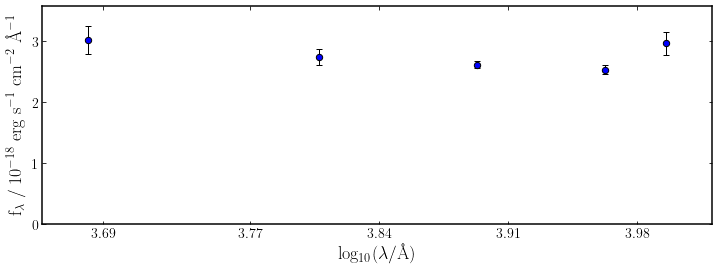

In [31]:
galaxy = pipes.galaxy(
    id_gal, load_data, spectrum_exists=False, filt_list=DECAM_filt_list)
fig = galaxy.plot()

In [35]:
burst = {}
burst["age"] = (0., 15.)                  # Vary age from 0 to 15 Gyr
burst["metallicity"] =  (0., 2.5)          # Vary metallicity from 0 to 2.5 Solar
burst["massformed"] = (0., 13.) 
# Vary log_10(mass formed) from 0 to 13
nebular = {}
nebular["logU"] = -3


fit_instructions = {}
fit_instructions["burst"] = burst   # Add the burst sfh component to the fit7
fit_instructions['nebular'] = nebular
#fit_instructions["redshift"] = (0.,3.)

fit_instructions["redshift"] = (0., 3.)
# fit_instructions["redshift_prior"] = "Gaussian"
# fit_instructions["redshift_prior_mu"] = 0.47
# fit_instructions["redshift_prior_sigma"] = 0.2

In [36]:
# dblplaw = {}                        
# dblplaw["tau"] = (0., 15.)                # Vary the time of peak star-formation between
#                                           # the Big Bang at 0 Gyr and 15 Gyr later. In 
#                                           # practice the code automatically stops this
#                                           # exceeding the age of the universe at the 
#                                           # observed redshift.
            
# dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
# dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
# dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
# dblplaw["beta_prior"] = "log_10"          # parameter betweenthe limits which have been set 
#                                           # above as in Carnall et al. (2017).
# dblplaw["massformed"] = (1., 15.)
# dblplaw["metallicity"] = (0.1, 2.5)
# dblplaw["metallicity_prior"] = "log_10"

# dust = {}
# dust["type"] = "CF00"
# dust["eta"] = 2.
# dust["Av"] = (0., 2.0)
# dust["n"] = (0.3, 2.5)
# dust["n_prior"] = "Gaussian"
# dust["n_prior_mu"] = 0.7
# dust["n_prior_sigma"] = 0.3

# dust = {}                           
# dust["type"] = "Calzetti"
# dust["Av"] = (0., 2.)

# nebular = {}
# nebular["logU"] = -3.

# fit_info = {}                            # The fit instructions dictionary
# fit_info["redshift"] = (0, 5)         # Vary observed redshift from 0 to 10

# #fit_info["redshift_prior"] = "Gaussian"  # From looking at the spectrum in Example 2 it's
# #fit_info["redshift_prior_mu"] = 0.77082   # clear that this  object is at around z = 1. We'll 
# #fit_info["redshift_prior_sigma"] = 0.0005 # include that information with a broad Gaussian
#                                          # prior centred on redshift 1. Parameters of priors
#                                          # are passed starting with "parameter_prior_".


# # fit_info["veldisp"] = (50., 70.)   #km/s
# # fit_info["veldisp_prior"] = "log_10"

# fit_info["dblplaw"] = dblplaw 
# fit_info["dust"] = dust
# #fit_info["nebular"] = nebular

# # calib = {}
# # calib["type"] = "polynomial_bayesian"

# # calib["0"] = (0.5, 1.5) # Zero order is centred on 1, at which point there is no change to the spectrum.
# # calib["0_prior"] = "Gaussian"
# # calib["0_prior_mu"] = 1.0
# # calib["0_prior_sigma"] = 0.25

# # calib["1"] = (-0.5, 0.5) # Subsequent orders are centred on zero.
# # calib["1_prior"] = "Gaussian"
# # calib["1_prior_mu"] = 0.
# # calib["1_prior_sigma"] = 0.25

# # calib["2"] = (-0.5, 0.5)
# # calib["2_prior"] = "Gaussian"
# # calib["2_prior_mu"] = 0.
# # calib["2_prior_sigma"] = 0.25

# # fit_info["calib"] = calib

# # mlpoly = {}
# # mlpoly["type"] = "polynomial_max_like"
# # mlpoly["order"] = 2

# noise = {}
# noise["type"] = "white_scaled"
# noise["scaling"] = (1., 10.)
# noise["scaling_prior"] = "log_10"
# fit_info["noise"] = noise

In [38]:
%%time

os.remove('pipes/posterior/1222.h5')
fit = pipes.fit(galaxy, fit_instructions)

fit.fit(verbose=False)


Bagpipes: fitting object 1222


Completed in 100.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.245      0.330      0.618
burst:massformed              10.961     11.054     11.429
burst:metallicity              0.108      1.036      2.293
redshift                       1.653      1.708      2.141




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


CPU times: user 1min 40s, sys: 0 ns, total: 1min 40s
Wall time: 1min 40s


In [121]:
fig = fit.plot_spectrum_posterior(save=True, show=True)

In [119]:
fig = fit.plot_1d_posterior(save=True,  show=True)       

/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/plotting/plot_1d_posterior.py:55: RuntimeWarning: divide by zero encountered in log10
  samples = np.log10(samples)


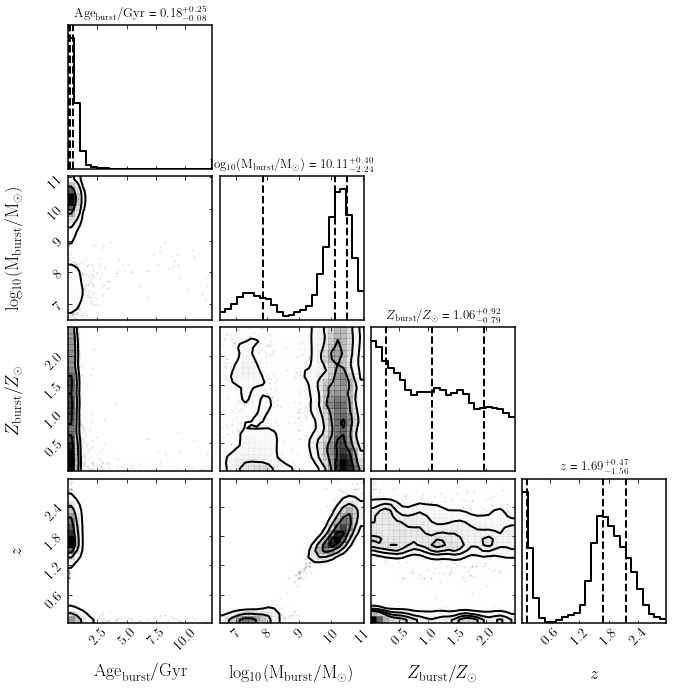

In [120]:
fit.plot_corner(save=True,  show=True)

# Fitting catalog

In [8]:
table = Table.read('NSF1_match_ELG.fits')
#len(table)

In [ ]:
IDs = np.arange(0,1500)
#IDs = result
#IDs = np.arange(0,1000)

fit_cat = pipes.fit_catalogue(IDs, fit_instructions, load_data, spectrum_exists=False,
                              cat_filt_list=DECAM_filt_list, run="NSF_NB_1")


#test_mag_ es de 0 a 100 sin NB
fit_cat.fit(verbose=False)


Bagpipes: fitting object 0


Completed in 170.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.158      0.198      0.247
burst:massformed              10.220     10.343     10.464
burst:metallicity              0.824      1.380      2.069
redshift                       1.396      1.453      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1 out of 1500 objects completed.

Bagpipes: fitting object 1


Completed in 118.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.800      1.211      1.995
burst:massformed              11.015     12.372     12.567
burst:metallicity              0.349      1.051      1.987
redshift                       1.393      2.615      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 2 out of 1500 objects completed.

Bagpipes: fitting object 2


Completed in 134.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.107      1.271      1.472
burst:massformed              12.819     12.926     12.977
burst:metallicity              1.989      2.304      2.425
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 3 out of 1500 objects completed.

Bagpipes: fitting object 3


Completed in 70.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.622      1.010      5.829
burst:massformed              10.243     11.920     12.185
burst:metallicity              0.485      1.259      2.031
redshift                       0.571      2.584      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 4 out of 1500 objects completed.

Bagpipes: fitting object 4


Completed in 146.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.145      0.173      0.211
burst:massformed              10.332     10.433     10.507
burst:metallicity              0.787      1.363      2.086
redshift                       1.451      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 5 out of 1500 objects completed.

Bagpipes: fitting object 5


Completed in 90.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.473      0.574      0.675
burst:massformed              12.066     12.146     12.263
burst:metallicity              1.284      1.915      2.331
redshift                       2.632      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 6 out of 1500 objects completed.

Bagpipes: fitting object 6


Completed in 70.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.376      2.789      7.787
burst:massformed               8.892      9.940     11.263
burst:metallicity              0.390      1.266      2.127
redshift                       0.162      0.471      2.100




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 7 out of 1500 objects completed.

Bagpipes: fitting object 7


Completed in 95.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.078      0.115      0.267
burst:massformed               9.551      9.811     10.477
burst:metallicity              0.397      1.161      2.030
redshift                       1.371      1.449      1.902




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 8 out of 1500 objects completed.

Bagpipes: fitting object 8


Completed in 88.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.606      0.733      0.846
burst:massformed              12.417     12.473     12.531
burst:metallicity              1.242      1.628      2.201
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 9 out of 1500 objects completed.

Bagpipes: fitting object 9


Completed in 84.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.416      3.863      9.110
burst:massformed               8.151      9.229     11.478
burst:metallicity              0.490      1.261      2.044
redshift                       0.054      0.216      2.343




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 10 out of 1500 objects completed.

Bagpipes: fitting object 10


Completed in 94.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.614      0.702      0.873
burst:massformed              12.371     12.439     12.487
burst:metallicity              1.328      1.767      2.273
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 11 out of 1500 objects completed.

Bagpipes: fitting object 11


Completed in 188.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.645      0.700
burst:massformed              12.551     12.567     12.584
burst:metallicity              2.306      2.466      2.490
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 12 out of 1500 objects completed.

Bagpipes: fitting object 12


Completed in 180.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.243      0.311      0.656
burst:massformed              10.693     10.833     12.517
burst:metallicity              1.005      1.911      2.396
redshift                       1.454      1.492      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 13 out of 1500 objects completed.

Bagpipes: fitting object 13


Completed in 118.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.607      0.728      0.939
burst:massformed              12.099     12.185     12.341
burst:metallicity              1.387      2.009      2.410
redshift                       2.628      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 14 out of 1500 objects completed.

Bagpipes: fitting object 14


Completed in 95.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.283      1.270
burst:massformed               9.818     10.125     12.242
burst:metallicity              0.518      1.251      2.077
redshift                       1.386      1.489      2.637




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 15 out of 1500 objects completed.

Bagpipes: fitting object 15


Completed in 96.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.478      0.539      0.732
burst:massformed              11.960     12.040     12.157
burst:metallicity              1.219      1.911      2.252
redshift                       2.630      2.638      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 16 out of 1500 objects completed.

Bagpipes: fitting object 16


Completed in 87.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.471      1.871      2.218
burst:massformed              12.683     12.836     12.944
burst:metallicity              1.557      2.099      2.378
redshift                       2.627      2.636      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 17 out of 1500 objects completed.

Bagpipes: fitting object 17


Completed in 81.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.415      3.097      8.038
burst:massformed               8.103      9.184     11.581
burst:metallicity              0.269      0.917      1.900
redshift                       0.056      0.224      2.590




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 18 out of 1500 objects completed.

Bagpipes: fitting object 18


Completed in 148.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.266      0.736      0.946
burst:massformed              10.462     12.366     12.501
burst:metallicity              1.190      1.941      2.302
redshift                       1.450      2.635      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 19 out of 1500 objects completed.

Bagpipes: fitting object 19


Completed in 134.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.723      0.958
burst:massformed              12.265     12.367     12.498
burst:metallicity              1.089      1.884      2.361
redshift                       2.598      2.636      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 20 out of 1500 objects completed.

Bagpipes: fitting object 20


Completed in 153.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.211      0.257
burst:massformed              10.477     10.561     10.657
burst:metallicity              0.954      1.530      2.187
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 21 out of 1500 objects completed.

Bagpipes: fitting object 21


Completed in 262.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.505      0.544
burst:massformed              12.999     13.000     13.000
burst:metallicity              2.402      2.413      2.423
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 22 out of 1500 objects completed.

Bagpipes: fitting object 22


Completed in 166.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.164      0.202
burst:massformed              10.342     10.424     10.513
burst:metallicity              0.946      1.596      2.195
redshift                       1.453      1.456      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 23 out of 1500 objects completed.

Bagpipes: fitting object 23


Completed in 243.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.122      0.146      0.167
burst:massformed              10.516     10.555     10.582
burst:metallicity              1.056      1.493      2.178
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 24 out of 1500 objects completed.

Bagpipes: fitting object 24


Completed in 165.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.633      0.682
burst:massformed              12.862     12.877     12.892
burst:metallicity              2.324      2.376      2.434
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 25 out of 1500 objects completed.

Bagpipes: fitting object 25


Completed in 164.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.502      0.540
burst:massformed              12.828     12.841     12.850
burst:metallicity              2.273      2.340      2.388
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 26 out of 1500 objects completed.

Bagpipes: fitting object 26


Completed in 103.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.629      0.693      0.842
burst:massformed              12.202     12.265     12.331
burst:metallicity              0.922      1.759      2.159
redshift                       2.613      2.634      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 27 out of 1500 objects completed.

Bagpipes: fitting object 27


Completed in 140.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.366      0.398      0.430
burst:massformed              12.011     12.060     12.093
burst:metallicity              1.455      1.702      1.932
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 28 out of 1500 objects completed.

Bagpipes: fitting object 28


Completed in 137.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.500      0.538
burst:massformed              12.378     12.402     12.424
burst:metallicity              2.161      2.293      2.394
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 29 out of 1500 objects completed.

Bagpipes: fitting object 29


Completed in 139.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.768      0.964      1.275
burst:massformed              12.427     12.510     12.612
burst:metallicity              1.235      1.874      2.281
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 30 out of 1500 objects completed.

Bagpipes: fitting object 30


Completed in 114.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.334      0.779      1.158
burst:massformed              10.503     12.234     12.429
burst:metallicity              0.481      1.298      2.050
redshift                       1.402      2.611      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 31 out of 1500 objects completed.

Bagpipes: fitting object 31


Completed in 128.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.755      0.842      1.016
burst:massformed              12.798     12.819     12.911
burst:metallicity              2.036      2.397      2.458
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 32 out of 1500 objects completed.

Bagpipes: fitting object 32


Completed in 75.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.536      2.363      7.655
burst:massformed               9.401     10.137     11.991
burst:metallicity              0.539      1.356      2.129
redshift                       0.237      0.518      2.630




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 33 out of 1500 objects completed.

Bagpipes: fitting object 33


Completed in 147.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.104      0.140      0.192
burst:massformed               9.955     10.111     10.256
burst:metallicity              0.598      1.340      2.092
redshift                       1.401      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 34 out of 1500 objects completed.

Bagpipes: fitting object 34


Completed in 128.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.762      0.876      1.046
burst:massformed              12.726     12.774     12.862
burst:metallicity              1.864      2.200      2.359
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 35 out of 1500 objects completed.

Bagpipes: fitting object 35


Completed in 166.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.564      0.631      0.684
burst:massformed              12.639     12.685     12.708
burst:metallicity              1.974      2.106      2.280
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 36 out of 1500 objects completed.

Bagpipes: fitting object 36


Completed in 221.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.633      0.682
burst:massformed              12.832     12.848     12.862
burst:metallicity              2.236      2.304      2.366
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 37 out of 1500 objects completed.

Bagpipes: fitting object 37


Completed in 89.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.964      1.361      1.992
burst:massformed              12.367     12.555     12.753
burst:metallicity              0.794      1.434      2.014
redshift                       2.605      2.633      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 38 out of 1500 objects completed.

Bagpipes: fitting object 38


Completed in 139.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.154      0.216      0.345
burst:massformed              10.081     10.235     10.439
burst:metallicity              0.428      1.213      2.068
redshift                       1.383      1.401      1.486




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 39 out of 1500 objects completed.

Bagpipes: fitting object 39


Completed in 121.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.365      0.413      0.482
burst:massformed              11.777     11.841     11.888
burst:metallicity              0.229      1.390      1.881
redshift                       2.635      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 40 out of 1500 objects completed.

Bagpipes: fitting object 40


Completed in 143.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.704      0.783      0.873
burst:massformed              12.481     12.616     12.660
burst:metallicity              1.899      2.105      2.313
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 41 out of 1500 objects completed.

Bagpipes: fitting object 41


Completed in 153.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.645      0.744
burst:massformed              12.250     12.298     12.342
burst:metallicity              1.871      2.317      2.455
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 42 out of 1500 objects completed.

Bagpipes: fitting object 42


Completed in 208.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.804      0.863
burst:massformed              12.844     12.862     12.877
burst:metallicity              2.133      2.187      2.232
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 43 out of 1500 objects completed.

Bagpipes: fitting object 43


Completed in 122.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.125      0.156      0.184
burst:massformed              10.420     10.477     10.543
burst:metallicity              0.785      1.417      2.175
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 44 out of 1500 objects completed.

Bagpipes: fitting object 44


Completed in 223.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.676      0.775      0.852
burst:massformed              12.499     12.640     12.667
burst:metallicity              2.047      2.142      2.453
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 45 out of 1500 objects completed.

Bagpipes: fitting object 45


Completed in 178.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.220      0.924      1.066
burst:massformed              10.541     12.276     12.323
burst:metallicity              0.200      0.259      1.884
redshift                       1.453      2.636      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 46 out of 1500 objects completed.

Bagpipes: fitting object 46


Completed in 176.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.209      0.258
burst:massformed              10.509     10.576     10.652
burst:metallicity              0.869      1.277      1.929
redshift                       1.404      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 47 out of 1500 objects completed.

Bagpipes: fitting object 47


Completed in 149.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.746      0.844      1.027
burst:massformed              12.449     12.512     12.599
burst:metallicity              1.713      2.135      2.324
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 48 out of 1500 objects completed.

Bagpipes: fitting object 48


Completed in 148.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      1.006      1.089
burst:massformed              12.947     12.969     12.989
burst:metallicity              2.263      2.326      2.370
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 49 out of 1500 objects completed.

Bagpipes: fitting object 49


Completed in 111.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.318      1.764      2.133
burst:massformed              12.650     12.818     12.945
burst:metallicity              1.380      1.918      2.245
redshift                       2.632      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 50 out of 1500 objects completed.

Bagpipes: fitting object 50


Completed in 112.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.218      1.642      2.082
burst:massformed              12.698     12.839     12.949
burst:metallicity              1.270      1.800      2.222
redshift                       2.606      2.631      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 51 out of 1500 objects completed.

Bagpipes: fitting object 51


Completed in 160.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.214      0.260
burst:massformed              10.476     10.552     10.628
burst:metallicity              0.897      1.339      2.035
redshift                       1.405      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 52 out of 1500 objects completed.

Bagpipes: fitting object 52


Completed in 110.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.780      1.018      1.542
burst:massformed              12.235     12.379     12.559
burst:metallicity              0.836      1.583      2.182
redshift                       2.617      2.635      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 53 out of 1500 objects completed.

Bagpipes: fitting object 53


Completed in 95.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.469      0.509      0.545
burst:massformed              12.020     12.057     12.076
burst:metallicity              1.875      2.053      2.173
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 54 out of 1500 objects completed.

Bagpipes: fitting object 54


Completed in 149.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.200      0.277      0.853
burst:massformed              10.165     10.310     12.294
burst:metallicity              0.891      1.458      2.122
redshift                       1.396      1.454      2.637




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 55 out of 1500 objects completed.

Bagpipes: fitting object 55


Completed in 136.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.751      0.983
burst:massformed              12.250     12.370     12.470
burst:metallicity              1.196      1.918      2.406
redshift                       2.621      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 56 out of 1500 objects completed.

Bagpipes: fitting object 56


Completed in 117.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.504      0.543
burst:massformed              12.073     12.120     12.160
burst:metallicity              1.892      2.179      2.363
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 57 out of 1500 objects completed.

Bagpipes: fitting object 57


Completed in 177.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.298      0.344      0.425
burst:massformed              10.744     10.797     10.860
burst:metallicity              1.333      1.949      2.310
redshift                       1.393      1.399      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 58 out of 1500 objects completed.

Bagpipes: fitting object 58


Completed in 160.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.216      0.263
burst:massformed              10.303     10.390     10.475
burst:metallicity              0.750      1.403      2.108
redshift                       1.394      1.407      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 59 out of 1500 objects completed.

Bagpipes: fitting object 59


Completed in 107.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.156      0.192      0.257
burst:massformed              10.102     10.217     10.351
burst:metallicity              0.380      1.249      2.074
redshift                       1.389      1.407      1.460




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 60 out of 1500 objects completed.

Bagpipes: fitting object 60


Completed in 125.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.230      1.454      1.669
burst:massformed              12.872     12.958     12.993
burst:metallicity              2.276      2.375      2.472
redshift                       2.637      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 61 out of 1500 objects completed.

Bagpipes: fitting object 61


Completed in 153.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.344      0.617      0.816
burst:massformed              10.670     12.311     12.455
burst:metallicity              1.389      2.070      2.427
redshift                       1.405      2.633      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 62 out of 1500 objects completed.

Bagpipes: fitting object 62


Completed in 151.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.239      0.290      0.346
burst:massformed              10.359     10.439     10.518
burst:metallicity              1.013      1.583      2.161
redshift                       1.391      1.399      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 63 out of 1500 objects completed.

Bagpipes: fitting object 63


Completed in 239.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.226      0.250      0.273
burst:massformed              10.776     10.804     10.829
burst:metallicity              0.950      1.182      1.571
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 64 out of 1500 objects completed.

Bagpipes: fitting object 64


Completed in 166.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.172      0.198      0.218
burst:massformed              10.444     10.478     10.522
burst:metallicity              1.015      1.354      2.026
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 65 out of 1500 objects completed.

Bagpipes: fitting object 65


Completed in 142.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.234      0.275
burst:massformed              10.200     10.292     10.391
burst:metallicity              0.824      1.405      1.994
redshift                       1.392      1.403      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 66 out of 1500 objects completed.

Bagpipes: fitting object 66


Completed in 214.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.130      0.155      0.174
burst:massformed              10.410     10.453     10.518
burst:metallicity              0.963      1.412      2.176
redshift                       1.453      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 67 out of 1500 objects completed.

Bagpipes: fitting object 67


Completed in 130.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.504      0.542
burst:massformed              12.235     12.257     12.280
burst:metallicity              2.082      2.220      2.333
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 68 out of 1500 objects completed.

Bagpipes: fitting object 68


Completed in 141.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.209      0.253
burst:massformed              10.329     10.416     10.505
burst:metallicity              0.991      1.554      2.117
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 69 out of 1500 objects completed.

Bagpipes: fitting object 69


Completed in 129.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.408      0.493      0.614
burst:massformed              11.767     11.784     11.886
burst:metallicity              0.191      0.220      1.620
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 70 out of 1500 objects completed.

Bagpipes: fitting object 70


Completed in 163.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.821      1.000      1.206
burst:massformed              12.470     12.563     12.637
burst:metallicity              1.626      2.019      2.385
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 71 out of 1500 objects completed.

Bagpipes: fitting object 71


Completed in 228.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.199      0.217
burst:massformed              10.887     10.897     10.995
burst:metallicity              1.058      1.189      1.889
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 72 out of 1500 objects completed.

Bagpipes: fitting object 72


Completed in 219.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.218      0.245      0.269
burst:massformed              10.676     10.710     10.723
burst:metallicity              0.989      1.069      1.373
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 73 out of 1500 objects completed.

Bagpipes: fitting object 73


Completed in 134.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.653      0.854      1.136
burst:massformed              12.176     12.316     12.403
burst:metallicity              0.724      1.628      2.089
redshift                       2.606      2.636      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 74 out of 1500 objects completed.

Bagpipes: fitting object 74


Completed in 157.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.590      0.641      0.688
burst:massformed              12.724     12.733     12.740
burst:metallicity              2.464      2.485      2.497
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 75 out of 1500 objects completed.

Bagpipes: fitting object 75


Completed in 152.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.191      0.219      0.265
burst:massformed              10.959     11.021     11.111
burst:metallicity              1.765      2.235      2.453
redshift                       2.081      2.167      2.231




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 76 out of 1500 objects completed.

Bagpipes: fitting object 76


Completed in 139.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.196      0.253      0.332
burst:massformed              10.199     10.338     10.497
burst:metallicity              0.390      1.209      2.074
redshift                       1.396      1.454      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 77 out of 1500 objects completed.

Bagpipes: fitting object 77


Completed in 104.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.236      1.743      2.128
burst:massformed              12.605     12.787     12.924
burst:metallicity              1.427      1.927      2.253
redshift                       2.633      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 78 out of 1500 objects completed.

Bagpipes: fitting object 78


Completed in 173.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.575      0.937      1.044
burst:massformed              12.147     12.185     12.281
burst:metallicity              0.198      0.227      2.222
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 79 out of 1500 objects completed.

Bagpipes: fitting object 79


Completed in 170.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.723      0.779      0.828
burst:massformed              12.979     12.985     12.993
burst:metallicity              2.328      2.340      2.361
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 80 out of 1500 objects completed.

Bagpipes: fitting object 80


Completed in 130.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.769      0.942      1.187
burst:massformed              12.303     12.404     12.519
burst:metallicity              1.448      1.967      2.320
redshift                       2.631      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 81 out of 1500 objects completed.

Bagpipes: fitting object 81


Completed in 133.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.761      0.871      1.048
burst:massformed              12.406     12.467     12.549
burst:metallicity              1.668      2.077      2.291
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 82 out of 1500 objects completed.

Bagpipes: fitting object 82


Completed in 155.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.169      0.204      0.249
burst:massformed              10.086     10.172     10.270
burst:metallicity              0.962      1.389      2.071
redshift                       1.403      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 83 out of 1500 objects completed.

Bagpipes: fitting object 83


Completed in 117.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.632      0.898
burst:massformed              10.317     12.189     12.367
burst:metallicity              0.818      1.716      2.325
redshift                       1.454      2.629      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 84 out of 1500 objects completed.

Bagpipes: fitting object 84


Completed in 249.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.208      0.248
burst:massformed              10.571     10.602     10.673
burst:metallicity              1.023      1.333      1.763
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 85 out of 1500 objects completed.

Bagpipes: fitting object 85


Completed in 106.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.634      0.874      1.352
burst:massformed              12.001     12.271     12.450
burst:metallicity              0.495      1.556      2.200
redshift                       2.572      2.629      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 86 out of 1500 objects completed.

Bagpipes: fitting object 86


Completed in 182.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.171      0.205      0.249
burst:massformed              10.239     10.314     10.397
burst:metallicity              1.004      1.583      2.231
redshift                       1.449      1.454      1.488




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 87 out of 1500 objects completed.

Bagpipes: fitting object 87


Completed in 135.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.258      0.339      0.567
burst:massformed              10.416     10.659     11.235
burst:metallicity              0.123      0.253      1.773
redshift                       1.452      1.494      1.757




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 88 out of 1500 objects completed.

Bagpipes: fitting object 88


Completed in 172.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.406      0.463      0.473
burst:massformed              11.930     11.940     11.980
burst:metallicity              0.201      0.211      1.775
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 89 out of 1500 objects completed.

Bagpipes: fitting object 89


Completed in 153.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.754      0.842      1.037
burst:massformed              12.513     12.553     12.626
burst:metallicity              1.678      2.123      2.268
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 90 out of 1500 objects completed.

Bagpipes: fitting object 90


Completed in 210.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.918      1.008      1.085
burst:massformed              12.426     12.435     12.446
burst:metallicity              0.199      0.204      0.221
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 91 out of 1500 objects completed.

Bagpipes: fitting object 91


Completed in 133.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.493      0.538
burst:massformed              12.377     12.390     12.403
burst:metallicity              2.359      2.425      2.476
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 92 out of 1500 objects completed.

Bagpipes: fitting object 92


Completed in 190.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.163      0.198      0.237
burst:massformed              10.267     10.332     10.417
burst:metallicity              0.988      1.511      2.247
redshift                       1.452      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 93 out of 1500 objects completed.

Bagpipes: fitting object 93


Completed in 245.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.591      0.627      0.680
burst:massformed              12.811     12.824     12.836
burst:metallicity              2.238      2.294      2.348
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 94 out of 1500 objects completed.

Bagpipes: fitting object 94


Completed in 141.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.145      0.184      0.223
burst:massformed               9.975     10.087     10.198
burst:metallicity              0.839      1.419      2.059
redshift                       1.391      1.407      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 95 out of 1500 objects completed.

Bagpipes: fitting object 95


Completed in 83.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.099      0.129      0.175
burst:massformed              10.017     10.141     10.323
burst:metallicity              0.339      1.259      2.099
redshift                       1.379      1.405      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 96 out of 1500 objects completed.

Bagpipes: fitting object 96


Completed in 248.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.176      0.196      0.215
burst:massformed              10.756     10.795     10.804
burst:metallicity              0.996      1.051      1.322
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 97 out of 1500 objects completed.

Bagpipes: fitting object 97


Completed in 107.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.183      0.219
burst:massformed              10.123     10.205     10.281
burst:metallicity              0.517      1.155      1.853
redshift                       1.405      1.454      1.488




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 98 out of 1500 objects completed.

Bagpipes: fitting object 98


Completed in 238.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.203      0.223
burst:massformed              10.889     10.905     10.938
burst:metallicity              1.079      1.433      1.667
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 99 out of 1500 objects completed.

Bagpipes: fitting object 99


Completed in 239.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.201      0.216
burst:massformed              10.652     10.662     10.675
burst:metallicity              1.022      1.128      1.319
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 100 out of 1500 objects completed.

Bagpipes: fitting object 100


Completed in 245.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.136      0.157      0.180
burst:massformed              10.356     10.398     10.460
burst:metallicity              1.041      1.449      2.144
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 101 out of 1500 objects completed.

Bagpipes: fitting object 101


Completed in 117.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.205      1.557      1.909
burst:massformed              12.767     12.886     12.967
burst:metallicity              1.396      1.977      2.270
redshift                       2.629      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 102 out of 1500 objects completed.

Bagpipes: fitting object 102


Completed in 195.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.606      0.701      1.053
burst:massformed              12.253     12.320     12.388
burst:metallicity              0.207      1.841      2.197
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 103 out of 1500 objects completed.

Bagpipes: fitting object 103


Completed in 217.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.204      0.230
burst:massformed              10.437     10.462     10.539
burst:metallicity              1.016      1.218      1.652
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 104 out of 1500 objects completed.

Bagpipes: fitting object 104


Completed in 207.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.975      1.059      1.098
burst:massformed              12.421     12.427     12.439
burst:metallicity              0.202      0.208      0.228
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 105 out of 1500 objects completed.

Bagpipes: fitting object 105


Completed in 268.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.235      0.258      0.280
burst:massformed              10.708     10.721     10.755
burst:metallicity              0.996      1.089      1.282
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 106 out of 1500 objects completed.

Bagpipes: fitting object 106


Completed in 125.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.453      0.498      0.545
burst:massformed              11.789     11.836     11.899
burst:metallicity              0.890      1.404      1.872
redshift                       2.627      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 107 out of 1500 objects completed.

Bagpipes: fitting object 107


Completed in 186.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.609      0.742      0.882
burst:massformed              12.169     12.280     12.366
burst:metallicity              1.712      2.142      2.457
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 108 out of 1500 objects completed.

Bagpipes: fitting object 108


Completed in 151.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.392      0.732      0.842
burst:massformed              12.053     12.196     12.204
burst:metallicity              0.198      0.213      2.095
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 109 out of 1500 objects completed.

Bagpipes: fitting object 109


Completed in 277.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.621      0.677
burst:massformed              12.930     12.932     12.934
burst:metallicity              0.197      0.199      0.201
redshift                       2.310      2.310      2.310




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 110 out of 1500 objects completed.

Bagpipes: fitting object 110


Completed in 237.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.158      0.191      0.214
burst:massformed              10.348     10.396     10.433
burst:metallicity              1.036      1.407      2.100
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 111 out of 1500 objects completed.

Bagpipes: fitting object 111


Completed in 170.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.773      0.931      1.044
burst:massformed              12.771     12.867     12.904
burst:metallicity              2.006      2.107      2.412
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 112 out of 1500 objects completed.

Bagpipes: fitting object 112


Completed in 230.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.252      0.272
burst:massformed              10.622     10.630     10.641
burst:metallicity              0.995      1.048      1.159
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 113 out of 1500 objects completed.

Bagpipes: fitting object 113


Completed in 127.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.479      0.532      0.803
burst:massformed              11.840     11.865     11.904
burst:metallicity              0.205      1.680      1.937
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 114 out of 1500 objects completed.

Bagpipes: fitting object 114


Completed in 202.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.237      0.266      0.328
burst:massformed              10.557     10.646     10.726
burst:metallicity              0.915      1.306      2.070
redshift                       1.453      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 115 out of 1500 objects completed.

Bagpipes: fitting object 115


Completed in 115.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.042      1.372      1.962
burst:massformed              12.485     12.613     12.812
burst:metallicity              1.353      1.876      2.221
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 116 out of 1500 objects completed.

Bagpipes: fitting object 116


Completed in 273.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.365      0.391      0.429
burst:massformed              12.066     12.066     12.067
burst:metallicity              2.499      2.500      2.500
redshift                       1.394      1.394      1.394




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 117 out of 1500 objects completed.

Bagpipes: fitting object 117


Completed in 160.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.220      0.277
burst:massformed              10.205     10.326     10.430
burst:metallicity              0.845      1.369      2.038
redshift                       1.395      1.453      1.489




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 118 out of 1500 objects completed.

Bagpipes: fitting object 118


Completed in 186.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.222      0.262
burst:massformed              10.505     10.581     10.637
burst:metallicity              1.015      1.407      2.003
redshift                       1.400      1.453      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 119 out of 1500 objects completed.

Bagpipes: fitting object 119


Completed in 135.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.160      0.213
burst:massformed              10.045     10.208     10.374
burst:metallicity              0.527      1.314      2.061
redshift                       1.396      1.455      1.496




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 120 out of 1500 objects completed.

Bagpipes: fitting object 120


Completed in 204.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.194      0.234      0.272
burst:massformed              10.274     10.349     10.398
burst:metallicity              0.973      1.323      2.042
redshift                       1.450      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 121 out of 1500 objects completed.

Bagpipes: fitting object 121


Completed in 356.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.369      0.400      0.431
burst:massformed              12.218     12.218     12.219
burst:metallicity              2.497      2.499      2.500
redshift                       1.394      1.394      1.394




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 122 out of 1500 objects completed.

Bagpipes: fitting object 122


Completed in 133.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.481      0.547      0.909
burst:massformed              12.359     12.383     12.545
burst:metallicity              0.262      2.367      2.473
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 123 out of 1500 objects completed.

Bagpipes: fitting object 123


Completed in 109.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.176      0.252      0.934
burst:massformed              10.151     10.332     12.396
burst:metallicity              0.940      1.607      2.188
redshift                       1.406      1.460      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 124 out of 1500 objects completed.

Bagpipes: fitting object 124


Completed in 185.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.224      0.264
burst:massformed              10.283     10.368     10.427
burst:metallicity              0.970      1.396      2.084
redshift                       1.451      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 125 out of 1500 objects completed.

Bagpipes: fitting object 125


Completed in 283.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.252      0.273
burst:massformed              10.694     10.702     10.710
burst:metallicity              0.992      1.029      1.104
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 126 out of 1500 objects completed.

Bagpipes: fitting object 126


Completed in 158.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.213      0.248      0.277
burst:massformed              10.362     10.411     10.525
burst:metallicity              0.969      1.413      2.075
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 127 out of 1500 objects completed.

Bagpipes: fitting object 127


Completed in 197.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.783      0.943      1.058
burst:massformed              12.902     12.992     12.998
burst:metallicity              2.100      2.139      2.492
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 128 out of 1500 objects completed.

Bagpipes: fitting object 128


Completed in 238.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.632      0.681
burst:massformed              12.610     12.627     12.643
burst:metallicity              2.164      2.247      2.317
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 129 out of 1500 objects completed.

Bagpipes: fitting object 129


Completed in 196.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.512      0.541
burst:massformed              12.351     12.366     12.386
burst:metallicity              1.920      2.014      2.115
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 130 out of 1500 objects completed.

Bagpipes: fitting object 130


Completed in 445.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.188      1.262      1.358
burst:massformed              12.226     12.227     12.227
burst:metallicity              0.001      0.003      0.004
redshift                       1.406      1.406      1.406




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 131 out of 1500 objects completed.

Bagpipes: fitting object 131


Completed in 210.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.229      0.249      0.270
burst:massformed              10.521     10.535     10.549
burst:metallicity              0.994      1.078      1.254
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 132 out of 1500 objects completed.

Bagpipes: fitting object 132


Completed in 179.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.666      0.832
burst:massformed              12.170     12.230     12.336
burst:metallicity              1.633      2.025      2.273
redshift                       2.632      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 133 out of 1500 objects completed.

Bagpipes: fitting object 133


Completed in 235.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.919      0.988      1.086
burst:massformed              12.420     12.428     12.438
burst:metallicity              0.197      0.201      0.208
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 134 out of 1500 objects completed.

Bagpipes: fitting object 134


Completed in 168.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.116      0.143      0.174
burst:massformed              10.163     10.255     10.343
burst:metallicity              0.853      1.452      2.092
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 135 out of 1500 objects completed.

Bagpipes: fitting object 135


Completed in 167.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.768      0.880      1.046
burst:massformed              12.651     12.687     12.791
burst:metallicity              2.037      2.319      2.423
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 136 out of 1500 objects completed.

Bagpipes: fitting object 136


Completed in 206.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.202      0.233
burst:massformed              10.377     10.410     10.485
burst:metallicity              1.020      1.286      1.891
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 137 out of 1500 objects completed.

Bagpipes: fitting object 137


Completed in 136.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.408      0.434
burst:massformed              11.866     11.916     11.954
burst:metallicity              1.247      1.560      1.778
redshift                       2.636      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 138 out of 1500 objects completed.

Bagpipes: fitting object 138


Completed in 209.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.175      0.204      0.248
burst:massformed              10.215     10.274     10.346
burst:metallicity              1.011      1.406      2.054
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 139 out of 1500 objects completed.

Bagpipes: fitting object 139


Completed in 162.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.738      0.808      0.865
burst:massformed              12.505     12.529     12.557
burst:metallicity              2.187      2.261      2.327
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 140 out of 1500 objects completed.

Bagpipes: fitting object 140


Completed in 188.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.099      0.119      0.133
burst:massformed              10.170     10.209     10.264
burst:metallicity              0.882      1.439      2.097
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 141 out of 1500 objects completed.

Bagpipes: fitting object 141


Completed in 159.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.710      0.837      1.026
burst:massformed              12.271     12.380     12.480
burst:metallicity              1.577      2.061      2.312
redshift                       2.628      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 142 out of 1500 objects completed.

Bagpipes: fitting object 142


Completed in 187.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.943      1.002      1.091
burst:massformed              12.875     12.880     12.883
burst:metallicity              0.194      0.199      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 143 out of 1500 objects completed.

Bagpipes: fitting object 143


Completed in 135.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.481      0.542      0.938
burst:massformed              11.943     11.996     12.113
burst:metallicity              0.236      2.198      2.417
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 144 out of 1500 objects completed.

Bagpipes: fitting object 144


Completed in 215.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.564      0.618      0.682
burst:massformed              12.396     12.432     12.446
burst:metallicity              2.270      2.437      2.481
redshift                       2.635      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 145 out of 1500 objects completed.

Bagpipes: fitting object 145


Completed in 115.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.483      0.532      0.727
burst:massformed              11.695     11.782     11.856
burst:metallicity              0.216      1.789      2.255
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 146 out of 1500 objects completed.

Bagpipes: fitting object 146


Completed in 151.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.154      0.191      0.231
burst:massformed              10.007     10.104     10.197
burst:metallicity              0.876      1.380      2.089
redshift                       1.399      1.453      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 147 out of 1500 objects completed.

Bagpipes: fitting object 147


Completed in 199.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.138      0.162      0.193
burst:massformed              10.250     10.301     10.376
burst:metallicity              1.017      1.422      2.113
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 148 out of 1500 objects completed.

Bagpipes: fitting object 148


Completed in 247.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.474      0.503      0.546
burst:massformed              12.339     12.342     12.343
burst:metallicity              0.200      0.200      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 149 out of 1500 objects completed.

Bagpipes: fitting object 149


Completed in 80.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.504      4.330      8.321
burst:massformed               9.250      9.803     11.812
burst:metallicity              0.559      1.482      2.136
redshift                       0.181      0.316      2.610




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 150 out of 1500 objects completed.

Bagpipes: fitting object 150


Completed in 233.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.591      0.650      0.704
burst:massformed              12.649     12.681     12.696
burst:metallicity              2.148      2.294      2.357
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 151 out of 1500 objects completed.

Bagpipes: fitting object 151


Completed in 131.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.168      0.205      0.252
burst:massformed              10.083     10.169     10.264
burst:metallicity              0.884      1.386      2.047
redshift                       1.395      1.450      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 152 out of 1500 objects completed.

Bagpipes: fitting object 152


Completed in 233.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.196      0.214
burst:massformed              10.491     10.512     10.530
burst:metallicity              1.009      1.183      1.673
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 153 out of 1500 objects completed.

Bagpipes: fitting object 153


Completed in 161.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.728      0.801      0.862
burst:massformed              12.751     12.766     12.781
burst:metallicity              2.060      2.109      2.152
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 154 out of 1500 objects completed.

Bagpipes: fitting object 154


Completed in 138.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.796      0.989      1.265
burst:massformed              12.342     12.458     12.562
burst:metallicity              1.770      2.140      2.428
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 155 out of 1500 objects completed.

Bagpipes: fitting object 155


Completed in 244.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.145      0.172      0.206
burst:massformed              10.193     10.258     10.312
burst:metallicity              1.019      1.315      1.985
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 156 out of 1500 objects completed.

Bagpipes: fitting object 156


Completed in 136.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.647      0.810
burst:massformed              12.087     12.175     12.217
burst:metallicity              1.329      2.248      2.422
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 157 out of 1500 objects completed.

Bagpipes: fitting object 157


Completed in 206.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.112      0.126      0.139
burst:massformed              10.175     10.226     10.268
burst:metallicity              1.127      1.601      2.130
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 158 out of 1500 objects completed.

Bagpipes: fitting object 158


Completed in 144.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.140      0.167      0.198
burst:massformed              10.061     10.148     10.234
burst:metallicity              0.860      1.333      2.005
redshift                       1.451      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 159 out of 1500 objects completed.

Bagpipes: fitting object 159


Completed in 306.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.201      0.217
burst:massformed              10.641     10.653     10.670
burst:metallicity              1.037      1.198      1.413
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 160 out of 1500 objects completed.

Bagpipes: fitting object 160


Completed in 187.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.509      0.548
burst:massformed              12.596     12.624     12.647
burst:metallicity              2.148      2.297      2.401
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 161 out of 1500 objects completed.

Bagpipes: fitting object 161


Completed in 192.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.499      0.545
burst:massformed              12.154     12.165     12.171
burst:metallicity              0.189      0.197      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 162 out of 1500 objects completed.

Bagpipes: fitting object 162


Completed in 239.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.231      0.265
burst:massformed              10.493     10.568     10.588
burst:metallicity              0.995      1.151      1.700
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 163 out of 1500 objects completed.

Bagpipes: fitting object 163


Completed in 189.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.740      0.802      0.852
burst:massformed              12.584     12.587     12.591
burst:metallicity              0.200      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 164 out of 1500 objects completed.

Bagpipes: fitting object 164


Completed in 255.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.197      0.215
burst:massformed              10.707     10.715     10.722
burst:metallicity              0.997      1.038      1.161
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 165 out of 1500 objects completed.

Bagpipes: fitting object 165


Completed in 151.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.976      1.142      1.320
burst:massformed              12.802     12.888     12.940
burst:metallicity              2.031      2.172      2.317
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 166 out of 1500 objects completed.

Bagpipes: fitting object 166


Completed in 142.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.139      0.169
burst:massformed              10.052     10.145     10.240
burst:metallicity              0.757      1.393      2.134
redshift                       1.452      1.456      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 167 out of 1500 objects completed.

Bagpipes: fitting object 167


Completed in 139.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.368      0.399      0.433
burst:massformed              11.826     11.854     11.881
burst:metallicity              1.872      2.033      2.137
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 168 out of 1500 objects completed.

Bagpipes: fitting object 168


Completed in 122.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.927      1.193      1.708
burst:massformed              12.466     12.596     12.757
burst:metallicity              0.953      1.689      2.151
redshift                       2.629      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 169 out of 1500 objects completed.

Bagpipes: fitting object 169


Completed in 172.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.508      0.558
burst:massformed              12.467     12.490     12.513
burst:metallicity              1.866      2.011      2.129
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 170 out of 1500 objects completed.

Bagpipes: fitting object 170


Completed in 155.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.928      1.013      1.088
burst:massformed              12.377     12.385     12.394
burst:metallicity              0.194      0.200      0.211
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 171 out of 1500 objects completed.

Bagpipes: fitting object 171


Completed in 224.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.803      0.864
burst:massformed              12.512     12.536     12.560
burst:metallicity              2.080      2.156      2.219
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 172 out of 1500 objects completed.

Bagpipes: fitting object 172


Completed in 245.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.925      1.009      1.082
burst:massformed              12.999     13.000     13.000
burst:metallicity              2.407      2.423      2.437
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 173 out of 1500 objects completed.

Bagpipes: fitting object 173


Completed in 196.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.165      0.203
burst:massformed              10.101     10.169     10.237
burst:metallicity              0.983      1.426      2.137
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 174 out of 1500 objects completed.

Bagpipes: fitting object 174


Completed in 155.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.147      0.174      0.208
burst:massformed              10.637     10.720     10.798
burst:metallicity              1.075      1.504      2.094
redshift                       1.454      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 175 out of 1500 objects completed.

Bagpipes: fitting object 175


Completed in 152.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.499      0.730      0.823
burst:massformed              12.153     12.168     12.221
burst:metallicity              0.201      0.230      2.019
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 176 out of 1500 objects completed.

Bagpipes: fitting object 176


Completed in 201.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.921      1.004      1.079
burst:massformed              12.991     12.996     12.999
burst:metallicity              2.494      2.498      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 177 out of 1500 objects completed.

Bagpipes: fitting object 177


Completed in 146.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.747      0.835      0.977
burst:massformed              12.547     12.573     12.648
burst:metallicity              1.936      2.313      2.378
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 178 out of 1500 objects completed.

Bagpipes: fitting object 178


Completed in 158.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.246      0.332      0.834
burst:massformed              10.334     10.448     12.341
burst:metallicity              1.039      1.726      2.145
redshift                       1.394      1.403      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 179 out of 1500 objects completed.

Bagpipes: fitting object 179


Completed in 447.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.294      0.317      0.343
burst:massformed              12.086     12.086     12.086
burst:metallicity              1.000      1.000      1.000
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 180 out of 1500 objects completed.

Bagpipes: fitting object 180


Completed in 157.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.133      0.161      0.197
burst:massformed              10.135     10.209     10.305
burst:metallicity              1.005      1.594      2.235
redshift                       1.453      1.457      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 181 out of 1500 objects completed.

Bagpipes: fitting object 181


Completed in 197.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.125      0.150      0.170
burst:massformed              10.323     10.368     10.400
burst:metallicity              1.065      1.455      2.156
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 182 out of 1500 objects completed.

Bagpipes: fitting object 182


Completed in 195.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.219      0.263
burst:massformed              10.372     10.442     10.509
burst:metallicity              0.929      1.481      2.181
redshift                       1.453      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 183 out of 1500 objects completed.

Bagpipes: fitting object 183


Completed in 121.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.844      1.074      1.397
burst:massformed              12.325     12.449     12.591
burst:metallicity              1.292      1.871      2.281
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 184 out of 1500 objects completed.

Bagpipes: fitting object 184


Completed in 200.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.133      0.155      0.174
burst:massformed              10.376     10.417     10.489
burst:metallicity              1.054      1.480      2.202
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 185 out of 1500 objects completed.

Bagpipes: fitting object 185


Completed in 244.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.253      0.271
burst:massformed              11.081     11.085     11.088
burst:metallicity              0.997      1.009      1.033
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 186 out of 1500 objects completed.

Bagpipes: fitting object 186


Completed in 170.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.589      0.654      0.740
burst:massformed              12.213     12.236     12.309
burst:metallicity              2.104      2.428      2.484
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 187 out of 1500 objects completed.

Bagpipes: fitting object 187


Completed in 322.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.201      0.216
burst:massformed              11.148     11.151     11.155
burst:metallicity              1.000      1.032      1.091
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 188 out of 1500 objects completed.

Bagpipes: fitting object 188


Completed in 179.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.214      0.259
burst:massformed              10.183     10.255     10.323
burst:metallicity              0.970      1.364      2.082
redshift                       1.404      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 189 out of 1500 objects completed.

Bagpipes: fitting object 189


Completed in 121.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.197      0.266      0.599
burst:massformed              10.273     10.449     11.985
burst:metallicity              1.166      2.090      2.388
redshift                       1.455      1.493      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 190 out of 1500 objects completed.

Bagpipes: fitting object 190


Completed in 114.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.484      0.582      1.021
burst:massformed              12.009     12.080     12.133
burst:metallicity              0.205      1.979      2.361
redshift                       2.633      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 191 out of 1500 objects completed.

Bagpipes: fitting object 191


Completed in 216.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.134      0.162
burst:massformed              10.261     10.299     10.343
burst:metallicity              1.108      1.721      2.196
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 192 out of 1500 objects completed.

Bagpipes: fitting object 192


Completed in 167.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.750      0.826      1.007
burst:massformed              12.664     12.685     12.782
burst:metallicity              2.055      2.406      2.462
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 193 out of 1500 objects completed.

Bagpipes: fitting object 193


Completed in 119.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.362      0.422      0.524
burst:massformed              11.372     11.520     11.595
burst:metallicity              0.211      1.236      1.901
redshift                       2.084      2.282      2.320




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 194 out of 1500 objects completed.

Bagpipes: fitting object 194


Completed in 157.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.469      0.515      0.723
burst:massformed              12.266     12.315     12.337
burst:metallicity              0.221      1.985      2.120
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 195 out of 1500 objects completed.

Bagpipes: fitting object 195


Completed in 160.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.472      0.526      0.967
burst:massformed              12.218     12.267     12.343
burst:metallicity              0.221      2.042      2.322
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 196 out of 1500 objects completed.

Bagpipes: fitting object 196


Completed in 190.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.503      0.544
burst:massformed              12.395     12.413     12.430
burst:metallicity              1.858      1.968      2.065
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 197 out of 1500 objects completed.

Bagpipes: fitting object 197


Completed in 115.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.901      1.236      1.846
burst:massformed              12.393     12.553     12.745
burst:metallicity              0.744      1.450      2.071
redshift                       2.614      2.635      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 198 out of 1500 objects completed.

Bagpipes: fitting object 198


Completed in 141.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.763      0.906      1.084
burst:massformed              12.376     12.452     12.551
burst:metallicity              1.735      2.089      2.377
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 199 out of 1500 objects completed.

Bagpipes: fitting object 199


Completed in 306.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.806      0.833      0.867
burst:massformed              12.017     12.018     12.018
burst:metallicity              0.001      0.003      0.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 200 out of 1500 objects completed.

Bagpipes: fitting object 200


Completed in 126.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.882      1.083
burst:massformed              12.488     12.555     12.647
burst:metallicity              1.348      1.902      2.226
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 201 out of 1500 objects completed.

Bagpipes: fitting object 201


Completed in 116.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.870      1.047      1.349
burst:massformed              12.398     12.502     12.605
burst:metallicity              1.412      1.977      2.315
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 202 out of 1500 objects completed.

Bagpipes: fitting object 202


Completed in 154.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.913      1.044      1.264
burst:massformed              12.820     12.883     12.953
burst:metallicity              1.857      2.161      2.323
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 203 out of 1500 objects completed.

Bagpipes: fitting object 203


Completed in 179.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.261      0.317      0.435
burst:massformed              10.426     10.492     10.640
burst:metallicity              1.104      1.758      2.340
redshift                       1.395      1.401      1.406




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 204 out of 1500 objects completed.

Bagpipes: fitting object 204


Completed in 182.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.119      0.146      0.174
burst:massformed              10.234     10.329     10.415
burst:metallicity              0.852      1.407      2.124
redshift                       1.451      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 205 out of 1500 objects completed.

Bagpipes: fitting object 205


Completed in 123.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.545      1.039
burst:massformed              12.284     12.363     12.417
burst:metallicity              0.198      1.513      2.323
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 206 out of 1500 objects completed.

Bagpipes: fitting object 206


Completed in 132.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.772      0.934      1.137
burst:massformed              12.478     12.555     12.664
burst:metallicity              1.652      2.048      2.336
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 207 out of 1500 objects completed.

Bagpipes: fitting object 207


Completed in 164.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.239      0.283      0.337
burst:massformed              10.366     10.432     10.514
burst:metallicity              0.954      1.286      1.882
redshift                       1.396      1.452      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 208 out of 1500 objects completed.

Bagpipes: fitting object 208


Completed in 216.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.168      0.196      0.219
burst:massformed              10.414     10.447     10.489
burst:metallicity              1.015      1.343      2.041
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 209 out of 1500 objects completed.

Bagpipes: fitting object 209


Completed in 265.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.254      0.273
burst:massformed              10.749     10.758     10.768
burst:metallicity              0.992      1.058      1.167
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 210 out of 1500 objects completed.

Bagpipes: fitting object 210


Completed in 98.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.102      0.371      1.983
burst:massformed               9.513     10.161     12.533
burst:metallicity              0.468      1.252      2.022
redshift                       1.321      1.495      2.633




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 211 out of 1500 objects completed.

Bagpipes: fitting object 211


Completed in 167.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.589      0.679      0.844
burst:massformed              12.139     12.184     12.302
burst:metallicity              1.667      2.213      2.441
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 212 out of 1500 objects completed.

Bagpipes: fitting object 212


Completed in 90.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.769      6.459
burst:massformed               9.850     11.926     12.098
burst:metallicity              0.599      1.241      1.823
redshift                       0.297      2.586      2.637




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 213 out of 1500 objects completed.

Bagpipes: fitting object 213


Completed in 239.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.281      0.616      0.680
burst:massformed              10.499     12.237     12.259
burst:metallicity              1.999      2.399      2.474
redshift                       1.456      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 214 out of 1500 objects completed.

Bagpipes: fitting object 214


Completed in 101.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.702      1.767      7.698
burst:massformed               9.045     10.275     12.120
burst:metallicity              0.353      1.293      2.102
redshift                       0.198      0.689      2.631




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 215 out of 1500 objects completed.

Bagpipes: fitting object 215


Completed in 97.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.004      1.370      1.974
burst:massformed              12.355     12.530     12.745
burst:metallicity              1.011      1.638      2.125
redshift                       2.627      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 216 out of 1500 objects completed.

Bagpipes: fitting object 216


Completed in 147.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.497      0.541
burst:massformed              12.349     12.374     12.396
burst:metallicity              1.891      2.044      2.158
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 217 out of 1500 objects completed.

Bagpipes: fitting object 217


Completed in 158.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.475      0.524      0.686
burst:massformed              11.689     11.710     11.845
burst:metallicity              0.191      0.211      0.238
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 218 out of 1500 objects completed.

Bagpipes: fitting object 218


Completed in 139.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.702      0.824      0.987
burst:massformed              12.131     12.265     12.328
burst:metallicity              1.430      2.009      2.265
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 219 out of 1500 objects completed.

Bagpipes: fitting object 219


Completed in 301.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.251      0.271
burst:massformed              10.979     10.983     10.988
burst:metallicity              0.988      1.013      1.057
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 220 out of 1500 objects completed.

Bagpipes: fitting object 220


Completed in 132.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.137      0.162      0.195
burst:massformed              10.291     10.362     10.463
burst:metallicity              0.936      1.455      2.147
redshift                       1.452      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 221 out of 1500 objects completed.

Bagpipes: fitting object 221


Completed in 161.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.483      0.528
burst:massformed              11.821     11.831     11.843
burst:metallicity              0.196      0.203      0.215
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 222 out of 1500 objects completed.

Bagpipes: fitting object 222


Completed in 151.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.741      0.786      0.844
burst:massformed              12.331     12.334     12.338
burst:metallicity              0.199      0.201      0.204
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 223 out of 1500 objects completed.

Bagpipes: fitting object 223


Completed in 129.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.420      0.479      0.520
burst:massformed              11.929     11.943     11.991
burst:metallicity              0.203      0.225      1.734
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 224 out of 1500 objects completed.

Bagpipes: fitting object 224


Completed in 200.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.155      0.187      0.212
burst:massformed              10.478     10.527     10.556
burst:metallicity              0.975      1.287      2.022
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 225 out of 1500 objects completed.

Bagpipes: fitting object 225


Completed in 130.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.917      0.989      1.076
burst:massformed              12.075     12.099     12.121
burst:metallicity              0.182      0.208      0.248
redshift                       2.630      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 226 out of 1500 objects completed.

Bagpipes: fitting object 226


Completed in 165.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.234      0.302      0.423
burst:massformed              10.302     10.412     10.598
burst:metallicity              0.783      1.316      1.996
redshift                       1.389      1.405      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 227 out of 1500 objects completed.

Bagpipes: fitting object 227


Completed in 158.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.580      0.625      0.667
burst:massformed              12.299     12.324     12.349
burst:metallicity              1.843      1.976      2.072
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 228 out of 1500 objects completed.

Bagpipes: fitting object 228


Completed in 133.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.140      0.163      0.200
burst:massformed              10.153     10.222     10.308
burst:metallicity              0.878      1.327      2.136
redshift                       1.452      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 229 out of 1500 objects completed.

Bagpipes: fitting object 229


Completed in 155.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.224      1.525      1.739
burst:massformed              12.846     12.899     12.948
burst:metallicity              1.104      1.390      1.886
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 230 out of 1500 objects completed.

Bagpipes: fitting object 230


Completed in 742.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      5.852      6.347      6.832
burst:massformed              11.289     11.290     11.290
burst:metallicity              2.327      2.333      2.338
redshift                       0.671      0.671      0.672




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 231 out of 1500 objects completed.

Bagpipes: fitting object 231


Completed in 151.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.148      0.177      0.214
burst:massformed              10.115     10.199     10.281
burst:metallicity              0.925      1.385      2.062
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 232 out of 1500 objects completed.

Bagpipes: fitting object 232


Completed in 291.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.208      0.242      0.268
burst:massformed              10.455     10.504     10.523
burst:metallicity              0.991      1.116      1.627
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 233 out of 1500 objects completed.

Bagpipes: fitting object 233


Completed in 184.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.632      0.681
burst:massformed              12.561     12.574     12.585
burst:metallicity              2.408      2.458      2.488
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 234 out of 1500 objects completed.

Bagpipes: fitting object 234


Completed in 187.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.206      0.222
burst:massformed              10.612     10.708     10.738
burst:metallicity              0.843      1.720      2.255
redshift                       1.454      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 235 out of 1500 objects completed.

Bagpipes: fitting object 235


Completed in 114.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.217      0.489
burst:massformed              10.277     10.405     11.477
burst:metallicity              0.446      1.181      1.925
redshift                       1.453      1.492      2.325




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 236 out of 1500 objects completed.

Bagpipes: fitting object 236


Completed in 129.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.004      1.332      1.815
burst:massformed              12.423     12.540     12.708
burst:metallicity              1.252      1.736      2.167
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 237 out of 1500 objects completed.

Bagpipes: fitting object 237


Completed in 375.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.795      0.859
burst:massformed              12.778     12.790     12.802
burst:metallicity              2.213      2.249      2.281
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 238 out of 1500 objects completed.

Bagpipes: fitting object 238


Completed in 127.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.260      1.572      1.798
burst:massformed              12.799     12.922     12.975
burst:metallicity              1.774      2.125      2.272
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 239 out of 1500 objects completed.

Bagpipes: fitting object 239


Completed in 251.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.217      0.247      0.274
burst:massformed              10.597     10.622     10.656
burst:metallicity              1.003      1.277      2.170
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 240 out of 1500 objects completed.

Bagpipes: fitting object 240


Completed in 130.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.983      1.269      1.720
burst:massformed              12.539     12.646     12.786
burst:metallicity              1.326      1.873      2.188
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 241 out of 1500 objects completed.

Bagpipes: fitting object 241


Completed in 177.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.638      0.708
burst:massformed              12.347     12.366     12.427
burst:metallicity              2.147      2.445      2.483
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 242 out of 1500 objects completed.

Bagpipes: fitting object 242


Completed in 177.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.661      0.810      0.979
burst:massformed              12.211     12.348     12.419
burst:metallicity              1.628      2.082      2.443
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 243 out of 1500 objects completed.

Bagpipes: fitting object 243


Completed in 159.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.164      0.193      0.215
burst:massformed              10.298     10.344     10.449
burst:metallicity              1.014      1.617      2.167
redshift                       1.453      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 244 out of 1500 objects completed.

Bagpipes: fitting object 244


Completed in 253.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.404      0.428
burst:massformed              12.516     12.523     12.532
burst:metallicity              1.880      1.920      1.970
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 245 out of 1500 objects completed.

Bagpipes: fitting object 245


Completed in 128.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.457      0.504      0.543
burst:massformed              12.290     12.333     12.366
burst:metallicity              1.603      1.871      2.074
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 246 out of 1500 objects completed.

Bagpipes: fitting object 246


Completed in 149.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.754      0.851      1.056
burst:massformed              12.366     12.411     12.482
burst:metallicity              1.567      2.063      2.214
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 247 out of 1500 objects completed.

Bagpipes: fitting object 247


Completed in 306.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.093      0.106      0.125
burst:massformed              10.598     10.613     10.664
burst:metallicity              1.038      1.742      1.981
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 248 out of 1500 objects completed.

Bagpipes: fitting object 248


Completed in 157.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.172      1.306      1.521
burst:massformed              12.883     12.906     12.990
burst:metallicity              2.416      2.483      2.496
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 249 out of 1500 objects completed.

Bagpipes: fitting object 249


Completed in 69.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.917      1.327      2.101
burst:massformed              12.144     12.373     12.547
burst:metallicity              0.393      0.998      1.748
redshift                       2.590      2.632      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 250 out of 1500 objects completed.

Bagpipes: fitting object 250


Completed in 200.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.260      0.844      1.057
burst:massformed              10.491     12.583     12.703
burst:metallicity              1.549      2.087      2.364
redshift                       1.455      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 251 out of 1500 objects completed.

Bagpipes: fitting object 251


Completed in 220.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.129      0.156      0.180
burst:massformed              10.540     10.588     10.678
burst:metallicity              1.089      1.575      2.249
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 252 out of 1500 objects completed.

Bagpipes: fitting object 252


Completed in 138.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.065      1.321      1.615
burst:massformed              12.799     12.903     12.972
burst:metallicity              1.734      2.093      2.342
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 253 out of 1500 objects completed.

Bagpipes: fitting object 253


Completed in 127.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.849      1.224      1.741
burst:massformed              12.235     12.441     12.620
burst:metallicity              0.909      1.557      2.157
redshift                       2.623      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 254 out of 1500 objects completed.

Bagpipes: fitting object 254


Completed in 186.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.163      1.269      1.363
burst:massformed              12.968     12.983     12.994
burst:metallicity              2.451      2.478      2.494
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 255 out of 1500 objects completed.

Bagpipes: fitting object 255


Completed in 229.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.655      0.781
burst:massformed              12.632     12.642     12.787
burst:metallicity              2.113      2.478      2.494
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 256 out of 1500 objects completed.

Bagpipes: fitting object 256


Completed in 76.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.211      0.878      7.547
burst:massformed               8.458      9.896     11.447
burst:metallicity              0.451      1.308      2.106
redshift                       0.114      1.385      2.568




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 257 out of 1500 objects completed.

Bagpipes: fitting object 257


Completed in 83.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.256      1.696      2.118
burst:massformed              12.568     12.724     12.872
burst:metallicity              0.977      1.477      1.967
redshift                       2.600      2.630      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 258 out of 1500 objects completed.

Bagpipes: fitting object 258


Completed in 98.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.169      0.204      0.225
burst:massformed              10.263     10.361     10.446
burst:metallicity              0.948      1.057      1.462
redshift                       1.453      1.461      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 259 out of 1500 objects completed.

Bagpipes: fitting object 259


Completed in 227.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.804      0.867
burst:massformed              12.555     12.577     12.600
burst:metallicity              2.217      2.276      2.333
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 260 out of 1500 objects completed.

Bagpipes: fitting object 260


Completed in 254.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.241      0.269
burst:massformed              10.551     10.628     10.639
burst:metallicity              0.995      1.052      1.348
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 261 out of 1500 objects completed.

Bagpipes: fitting object 261


Completed in 151.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.645      0.703
burst:massformed              12.095     12.145     12.184
burst:metallicity              1.888      2.250      2.418
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 262 out of 1500 objects completed.

Bagpipes: fitting object 262


Completed in 280.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.745      0.786      0.835
burst:massformed              11.397     11.401     11.403
burst:metallicity              0.001      0.003      0.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 263 out of 1500 objects completed.

Bagpipes: fitting object 263


Completed in 171.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.935      1.002      1.095
burst:massformed              12.589     12.594     12.596
burst:metallicity              0.198      0.201      0.206
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 264 out of 1500 objects completed.

Bagpipes: fitting object 264


Completed in 171.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.169      0.202      0.244
burst:massformed              10.471     10.529     10.610
burst:metallicity              1.013      1.414      2.086
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 265 out of 1500 objects completed.

Bagpipes: fitting object 265


Completed in 83.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.566      0.866      5.722
burst:massformed               9.490     11.796     12.105
burst:metallicity              0.442      1.411      2.089
redshift                       0.284      2.600      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 266 out of 1500 objects completed.

Bagpipes: fitting object 266


Completed in 293.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.509      0.539
burst:massformed              12.539     12.542     12.545
burst:metallicity              0.199      0.202      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 267 out of 1500 objects completed.

Bagpipes: fitting object 267


Completed in 193.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.129      0.155      0.170
burst:massformed              10.567     10.701     10.716
burst:metallicity              2.166      2.307      2.412
redshift                       1.454      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 268 out of 1500 objects completed.

Bagpipes: fitting object 268


Completed in 177.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.940      1.016      1.083
burst:massformed              12.416     12.422     12.429
burst:metallicity              0.200      0.204      0.211
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 269 out of 1500 objects completed.

Bagpipes: fitting object 269


Completed in 126.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.214      1.718      2.125
burst:massformed              12.642     12.797     12.927
burst:metallicity              1.565      1.964      2.239
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 270 out of 1500 objects completed.

Bagpipes: fitting object 270


Completed in 68.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.267      4.391      8.127
burst:massformed               9.446      9.883     10.346
burst:metallicity              0.318      1.111      2.004
redshift                       0.229      0.387      0.651




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 271 out of 1500 objects completed.

Bagpipes: fitting object 271


Completed in 139.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.930      1.005      1.079
burst:massformed              12.311     12.321     12.330
burst:metallicity              0.194      0.204      0.218
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 272 out of 1500 objects completed.

Bagpipes: fitting object 272


Completed in 189.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.657      0.792
burst:massformed              12.552     12.573     12.696
burst:metallicity              2.015      2.445      2.489
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 273 out of 1500 objects completed.

Bagpipes: fitting object 273


Completed in 174.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.217      0.265
burst:massformed              10.312     10.400     10.471
burst:metallicity              0.909      1.726      2.323
redshift                       1.454      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 274 out of 1500 objects completed.

Bagpipes: fitting object 274


Completed in 135.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.502      0.544
burst:massformed              12.206     12.235     12.259
burst:metallicity              1.832      2.003      2.123
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 275 out of 1500 objects completed.

Bagpipes: fitting object 275


Completed in 189.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.590      0.640      0.694
burst:massformed              12.233     12.266     12.293
burst:metallicity              2.188      2.376      2.467
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 276 out of 1500 objects completed.

Bagpipes: fitting object 276


Completed in 125.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.363      0.376      0.697
burst:massformed              11.951     12.023     12.148
burst:metallicity              0.246      1.470      1.838
redshift                       2.636      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 277 out of 1500 objects completed.

Bagpipes: fitting object 277


Completed in 103.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.469      0.505      0.543
burst:massformed              12.037     12.097     12.151
burst:metallicity              1.390      1.791      2.077
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 278 out of 1500 objects completed.

Bagpipes: fitting object 278


Completed in 212.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.629      0.685
burst:massformed              12.378     12.403     12.421
burst:metallicity              2.316      2.422      2.477
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 279 out of 1500 objects completed.

Bagpipes: fitting object 279


Completed in 136.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.246      0.517      1.337
burst:massformed              10.234     10.569     12.642
burst:metallicity              0.861      1.577      2.129
redshift                       1.391      1.456      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 280 out of 1500 objects completed.

Bagpipes: fitting object 280


Completed in 149.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.900      1.002      1.102
burst:massformed              12.650     12.691     12.727
burst:metallicity              2.019      2.124      2.220
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 281 out of 1500 objects completed.

Bagpipes: fitting object 281


Completed in 158.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.749      0.849      1.028
burst:massformed              12.599     12.647     12.723
burst:metallicity              1.768      2.201      2.311
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 282 out of 1500 objects completed.

Bagpipes: fitting object 282


Completed in 300.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.741      0.796      0.861
burst:massformed              12.969     12.984     12.993
burst:metallicity              2.286      2.319      2.346
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 283 out of 1500 objects completed.

Bagpipes: fitting object 283


Completed in 108.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.906      0.985      1.061
burst:massformed              12.158     12.194     12.221
burst:metallicity              0.186      0.211      0.279
redshift                       2.633      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 284 out of 1500 objects completed.

Bagpipes: fitting object 284


Completed in 108.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.623      0.785      1.049
burst:massformed              12.247     12.321     12.414
burst:metallicity              0.243      1.356      1.994
redshift                       2.625      2.637      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 285 out of 1500 objects completed.

Bagpipes: fitting object 285


Completed in 298.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.251      0.272
burst:massformed              10.684     10.690     10.697
burst:metallicity              0.994      1.018      1.070
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 286 out of 1500 objects completed.

Bagpipes: fitting object 286


Completed in 126.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.131      0.167      0.206
burst:massformed              10.116     10.230     10.330
burst:metallicity              0.645      1.280      2.019
redshift                       1.452      1.458      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 287 out of 1500 objects completed.

Bagpipes: fitting object 287


Completed in 83.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.247      0.375      4.966
burst:massformed               8.471     10.916     11.236
burst:metallicity              0.413      1.111      1.890
redshift                       0.094      1.899      2.202




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 288 out of 1500 objects completed.

Bagpipes: fitting object 288


Completed in 141.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.471      0.519      0.556
burst:massformed              12.449     12.475     12.510
burst:metallicity              1.898      2.274      2.393
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 289 out of 1500 objects completed.

Bagpipes: fitting object 289


Completed in 183.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.207      0.251
burst:massformed              10.390     10.456     10.542
burst:metallicity              0.974      1.428      2.133
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 290 out of 1500 objects completed.

Bagpipes: fitting object 290


Completed in 199.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.209      0.257
burst:massformed              10.237     10.304     10.371
burst:metallicity              1.010      1.389      2.117
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 291 out of 1500 objects completed.

Bagpipes: fitting object 291


Completed in 101.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.727      1.116      1.698
burst:massformed              11.202     12.423     12.604
burst:metallicity              0.661      1.445      2.110
redshift                       1.457      2.633      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 292 out of 1500 objects completed.

Bagpipes: fitting object 292


Completed in 243.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.168      0.194      0.215
burst:massformed              10.529     10.565     10.589
burst:metallicity              1.023      1.260      1.820
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 293 out of 1500 objects completed.

Bagpipes: fitting object 293


Completed in 122.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.734      0.853      1.057
burst:massformed              12.271     12.348     12.429
burst:metallicity              1.323      1.934      2.211
redshift                       2.633      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 294 out of 1500 objects completed.

Bagpipes: fitting object 294


Completed in 127.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.810      1.015      1.318
burst:massformed              12.566     12.658     12.739
burst:metallicity              1.327      1.928      2.347
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 295 out of 1500 objects completed.

Bagpipes: fitting object 295


Completed in 170.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.136      0.158      0.177
burst:massformed              10.507     10.556     10.617
burst:metallicity              1.161      1.684      2.342
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 296 out of 1500 objects completed.

Bagpipes: fitting object 296


Completed in 195.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.632      0.684
burst:massformed              12.732     12.744     12.758
burst:metallicity              2.068      2.134      2.192
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 297 out of 1500 objects completed.

Bagpipes: fitting object 297


Completed in 165.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.620      0.738      0.867
burst:massformed              12.337     12.450     12.528
burst:metallicity              1.854      2.132      2.454
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 298 out of 1500 objects completed.

Bagpipes: fitting object 298


Completed in 157.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.167      0.201      0.244
burst:massformed              10.406     10.461     10.558
burst:metallicity              1.017      1.476      2.127
redshift                       1.453      1.454      1.466




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 299 out of 1500 objects completed.

Bagpipes: fitting object 299


Completed in 103.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.472      0.512      0.552
burst:massformed              12.289     12.327     12.359
burst:metallicity              2.089      2.333      2.470
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 300 out of 1500 objects completed.

Bagpipes: fitting object 300


Completed in 115.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.479      0.612      0.687
burst:massformed              12.031     12.240     12.299
burst:metallicity              1.805      2.240      2.425
redshift                       2.632      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 301 out of 1500 objects completed.

Bagpipes: fitting object 301


Completed in 88.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.382      0.412      0.444
burst:massformed              11.734     11.849     11.953
burst:metallicity              0.981      1.603      2.132
redshift                       2.622      2.640      2.646




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 302 out of 1500 objects completed.

Bagpipes: fitting object 302


Completed in 193.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.637      0.682
burst:massformed              12.517     12.540     12.563
burst:metallicity              2.248      2.346      2.431
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 303 out of 1500 objects completed.

Bagpipes: fitting object 303


Completed in 168.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.506      0.543
burst:massformed              12.517     12.538     12.561
burst:metallicity              2.167      2.278      2.390
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 304 out of 1500 objects completed.

Bagpipes: fitting object 304


Completed in 431.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.253      0.272
burst:massformed              11.913     11.914     11.914
burst:metallicity              1.000      1.000      1.001
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 305 out of 1500 objects completed.

Bagpipes: fitting object 305


Completed in 267.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.629      0.683
burst:massformed              12.624     12.635     12.642
burst:metallicity              2.432      2.470      2.492
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 306 out of 1500 objects completed.

Bagpipes: fitting object 306


Completed in 128.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.777      0.944      1.078
burst:massformed              12.535     12.599     12.676
burst:metallicity              1.453      1.783      2.192
redshift                       2.632      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 307 out of 1500 objects completed.

Bagpipes: fitting object 307


Completed in 137.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.093      0.117      0.141
burst:massformed              10.062     10.180     10.282
burst:metallicity              0.410      1.248      2.143
redshift                       1.394      1.453      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 308 out of 1500 objects completed.

Bagpipes: fitting object 308


Completed in 84.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.639      1.030      1.852
burst:massformed              10.446     12.251     12.498
burst:metallicity              0.562      1.395      2.127
redshift                       1.446      2.626      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 309 out of 1500 objects completed.

Bagpipes: fitting object 309


Completed in 177.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.599      0.672      0.818
burst:massformed              12.220     12.257     12.360
burst:metallicity              1.822      2.327      2.463
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 310 out of 1500 objects completed.

Bagpipes: fitting object 310


Completed in 129.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.209      0.613      0.700
burst:massformed              10.268     12.151     12.198
burst:metallicity              1.417      2.245      2.452
redshift                       1.455      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 311 out of 1500 objects completed.

Bagpipes: fitting object 311


Completed in 92.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.378      0.433      0.539
burst:massformed              11.814     11.900     12.026
burst:metallicity              1.240      1.826      2.175
redshift                       2.633      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 312 out of 1500 objects completed.

Bagpipes: fitting object 312


Completed in 205.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.165      0.203      0.249
burst:massformed              10.317     10.403     10.503
burst:metallicity              0.914      1.396      2.147
redshift                       1.450      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 313 out of 1500 objects completed.

Bagpipes: fitting object 313


Completed in 357.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.199      0.216
burst:massformed              11.090     11.094     11.097
burst:metallicity              1.001      1.013      1.038
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 314 out of 1500 objects completed.

Bagpipes: fitting object 314


Completed in 164.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.739      0.819      0.958
burst:massformed              12.584     12.612     12.666
burst:metallicity              1.749      2.174      2.252
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 315 out of 1500 objects completed.

Bagpipes: fitting object 315


Completed in 180.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.689      0.784      0.857
burst:massformed              12.587     12.721     12.750
burst:metallicity              2.000      2.094      2.377
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 316 out of 1500 objects completed.

Bagpipes: fitting object 316


Completed in 211.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.203      0.240
burst:massformed              10.517     10.550     10.626
burst:metallicity              1.012      1.260      1.805
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 317 out of 1500 objects completed.

Bagpipes: fitting object 317


Completed in 172.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.225      0.269
burst:massformed              10.368     10.449     10.509
burst:metallicity              0.936      1.336      2.093
redshift                       1.450      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 318 out of 1500 objects completed.

Bagpipes: fitting object 318


Completed in 179.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.738      0.791      0.855
burst:massformed              12.988     12.994     12.998
burst:metallicity              2.487      2.495      2.498
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 319 out of 1500 objects completed.

Bagpipes: fitting object 319


Completed in 157.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.804      0.993      1.255
burst:massformed              12.618     12.748     12.843
burst:metallicity              1.864      2.187      2.462
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 320 out of 1500 objects completed.

Bagpipes: fitting object 320


Completed in 141.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.782      0.925      1.060
burst:massformed              12.756     12.855     12.893
burst:metallicity              2.040      2.154      2.448
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 321 out of 1500 objects completed.

Bagpipes: fitting object 321


Completed in 162.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.633      0.686
burst:massformed              12.360     12.382     12.399
burst:metallicity              2.325      2.422      2.476
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 322 out of 1500 objects completed.

Bagpipes: fitting object 322


Completed in 173.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.102      0.121      0.135
burst:massformed              10.411     10.463     10.492
burst:metallicity              1.252      1.703      2.289
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 323 out of 1500 objects completed.

Bagpipes: fitting object 323


Completed in 150.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.669      0.827
burst:massformed              12.182     12.230     12.315
burst:metallicity              1.687      2.235      2.434
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 324 out of 1500 objects completed.

Bagpipes: fitting object 324


Completed in 158.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.764      0.862      1.057
burst:massformed              12.440     12.483     12.582
burst:metallicity              1.915      2.293      2.414
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 325 out of 1500 objects completed.

Bagpipes: fitting object 325


Completed in 164.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.124      0.156      0.192
burst:massformed              10.164     10.244     10.338
burst:metallicity              0.940      1.460      2.091
redshift                       1.452      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 326 out of 1500 objects completed.

Bagpipes: fitting object 326


Completed in 152.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.096      0.131      0.175
burst:massformed               9.739      9.897     10.053
burst:metallicity              0.459      1.303      2.074
redshift                       1.397      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 327 out of 1500 objects completed.

Bagpipes: fitting object 327


Completed in 213.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.799      0.865
burst:massformed              12.549     12.573     12.598
burst:metallicity              2.151      2.230      2.294
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 328 out of 1500 objects completed.

Bagpipes: fitting object 328


Completed in 140.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.095      0.120      0.150
burst:massformed               9.878     10.005     10.125
burst:metallicity              0.478      1.297      2.086
redshift                       1.400      1.454      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 329 out of 1500 objects completed.

Bagpipes: fitting object 329


Completed in 265.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.641      0.690
burst:massformed              12.952     12.955     12.958
burst:metallicity              0.416      0.436      0.454
redshift                       2.087      2.087      2.087




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 330 out of 1500 objects completed.

Bagpipes: fitting object 330


Completed in 197.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.186      0.218
burst:massformed              10.257     10.325     10.404
burst:metallicity              0.993      1.516      2.156
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 331 out of 1500 objects completed.

Bagpipes: fitting object 331


Completed in 228.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.195      0.238      0.267
burst:massformed              10.699     10.770     10.784
burst:metallicity              0.990      1.097      1.621
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 332 out of 1500 objects completed.

Bagpipes: fitting object 332


Completed in 129.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.091      0.117      0.169
burst:massformed               9.788      9.925     10.136
burst:metallicity              0.400      1.140      2.014
redshift                       1.384      1.407      1.496




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 333 out of 1500 objects completed.

Bagpipes: fitting object 333


Completed in 225.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.633      0.687
burst:massformed              12.792     12.801     12.808
burst:metallicity              2.445      2.476      2.494
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 334 out of 1500 objects completed.

Bagpipes: fitting object 334


Completed in 178.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.378      0.409      0.439
burst:massformed              12.114     12.138     12.160
burst:metallicity              1.747      1.890      2.012
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 335 out of 1500 objects completed.

Bagpipes: fitting object 335


Completed in 173.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.514      0.560
burst:massformed              12.333     12.345     12.363
burst:metallicity              2.314      2.435      2.487
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 336 out of 1500 objects completed.

Bagpipes: fitting object 336


Completed in 272.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.094      0.104      0.125
burst:massformed              11.020     11.026     11.060
burst:metallicity              1.188      2.291      2.383
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 337 out of 1500 objects completed.

Bagpipes: fitting object 337


Completed in 111.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.715      0.881      1.115
burst:massformed              12.291     12.436     12.554
burst:metallicity              1.184      1.908      2.316
redshift                       2.630      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 338 out of 1500 objects completed.

Bagpipes: fitting object 338


Completed in 156.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.187      0.218
burst:massformed              10.294     10.373     10.469
burst:metallicity              1.013      1.553      2.177
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 339 out of 1500 objects completed.

Bagpipes: fitting object 339


Completed in 110.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.693      2.054      2.328
burst:massformed              12.756     12.885     12.969
burst:metallicity              2.198      2.406      2.482
redshift                       2.633      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 340 out of 1500 objects completed.

Bagpipes: fitting object 340


Completed in 138.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.114      0.134      0.169
burst:massformed               9.972     10.089     10.216
burst:metallicity              0.584      1.405      2.092
redshift                       1.406      1.456      1.496




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 341 out of 1500 objects completed.

Bagpipes: fitting object 341


Completed in 183.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.671      0.822
burst:massformed              12.559     12.582     12.709
burst:metallicity              2.008      2.423      2.488
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 342 out of 1500 objects completed.

Bagpipes: fitting object 342


Completed in 98.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.861      1.298      2.022
burst:massformed              12.089     12.392     12.608
burst:metallicity              0.549      1.231      2.004
redshift                       2.577      2.631      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 343 out of 1500 objects completed.

Bagpipes: fitting object 343


Completed in 126.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.528      0.620
burst:massformed              11.936     11.949     12.092
burst:metallicity              0.195      0.207      0.223
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 344 out of 1500 objects completed.

Bagpipes: fitting object 344


Completed in 156.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.212      0.261
burst:massformed              10.203     10.294     10.382
burst:metallicity              0.849      1.378      2.068
redshift                       1.395      1.452      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 345 out of 1500 objects completed.

Bagpipes: fitting object 345


Completed in 154.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.148      0.174      0.208
burst:massformed              10.380     10.428     10.474
burst:metallicity              0.990      1.507      2.118
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 346 out of 1500 objects completed.

Bagpipes: fitting object 346


Completed in 186.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.230      0.266
burst:massformed              10.293     10.370     10.426
burst:metallicity              0.997      1.335      2.052
redshift                       1.453      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 347 out of 1500 objects completed.

Bagpipes: fitting object 347


Completed in 174.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.120      0.145      0.169
burst:massformed              10.214     10.284     10.341
burst:metallicity              0.718      1.330      2.070
redshift                       1.451      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 348 out of 1500 objects completed.

Bagpipes: fitting object 348


Completed in 105.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.142      1.633      2.099
burst:massformed              12.507     12.694     12.845
burst:metallicity              1.206      1.777      2.194
redshift                       2.629      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 349 out of 1500 objects completed.

Bagpipes: fitting object 349


Completed in 111.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.488      1.787      2.108
burst:massformed              12.847     12.929     12.987
burst:metallicity              2.097      2.267      2.429
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 350 out of 1500 objects completed.

Bagpipes: fitting object 350


Completed in 132.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.236      0.313      0.518
burst:massformed              10.250     10.403     10.641
burst:metallicity              0.336      1.194      2.086
redshift                       1.389      1.407      1.497




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 351 out of 1500 objects completed.

Bagpipes: fitting object 351


Completed in 150.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.747      0.819      0.869
burst:massformed              12.228     12.233     12.244
burst:metallicity              0.199      0.206      0.222
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 352 out of 1500 objects completed.

Bagpipes: fitting object 352


Completed in 129.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.806      2.062      2.312
burst:massformed              12.843     12.905     12.975
burst:metallicity              2.269      2.440      2.488
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 353 out of 1500 objects completed.

Bagpipes: fitting object 353


Completed in 164.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.220      0.268
burst:massformed              10.228     10.306     10.375
burst:metallicity              1.017      1.540      2.184
redshift                       1.452      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 354 out of 1500 objects completed.

Bagpipes: fitting object 354


Completed in 142.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.752      0.845      1.017
burst:massformed              12.359     12.403     12.470
burst:metallicity              1.681      2.141      2.269
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 355 out of 1500 objects completed.

Bagpipes: fitting object 355


Completed in 143.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.141      0.162      0.194
burst:massformed              10.241     10.308     10.373
burst:metallicity              0.930      1.459      2.163
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 356 out of 1500 objects completed.

Bagpipes: fitting object 356


Completed in 161.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.157      0.192      0.215
burst:massformed              10.287     10.347     10.430
burst:metallicity              0.962      1.402      2.050
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 357 out of 1500 objects completed.

Bagpipes: fitting object 357


Completed in 252.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.250      0.271
burst:massformed              10.728     10.744     10.764
burst:metallicity              0.983      1.139      1.456
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 358 out of 1500 objects completed.

Bagpipes: fitting object 358


Completed in 156.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.773      0.899      1.086
burst:massformed              12.355     12.424     12.506
burst:metallicity              1.664      2.009      2.304
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 359 out of 1500 objects completed.

Bagpipes: fitting object 359


Completed in 153.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.786      0.848
burst:massformed              12.201     12.213     12.220
burst:metallicity              0.197      0.204      0.216
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 360 out of 1500 objects completed.

Bagpipes: fitting object 360


Completed in 163.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.382      0.417      0.447
burst:massformed              11.811     11.825     11.867
burst:metallicity              0.191      0.217      0.255
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 361 out of 1500 objects completed.

Bagpipes: fitting object 361


Completed in 167.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.642      0.700
burst:massformed              12.392     12.417     12.444
burst:metallicity              2.228      2.422      2.480
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 362 out of 1500 objects completed.

Bagpipes: fitting object 362


Completed in 191.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.278      0.321      0.384
burst:massformed              10.497     10.565     10.639
burst:metallicity              1.053      1.611      2.170
redshift                       1.393      1.399      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 363 out of 1500 objects completed.

Bagpipes: fitting object 363


Completed in 150.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.664      0.814
burst:massformed              12.226     12.266     12.356
burst:metallicity              1.799      2.318      2.464
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 364 out of 1500 objects completed.

Bagpipes: fitting object 364


Completed in 163.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.626      0.769      0.949
burst:massformed              12.118     12.238     12.329
burst:metallicity              1.515      2.052      2.427
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 365 out of 1500 objects completed.

Bagpipes: fitting object 365


Completed in 170.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.521      0.943
burst:massformed              12.202     12.259     12.333
burst:metallicity              0.217      2.169      2.369
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 366 out of 1500 objects completed.

Bagpipes: fitting object 366


Completed in 85.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.304      0.408      3.782
burst:massformed               8.166     11.205     11.440
burst:metallicity              0.433      1.144      1.888
redshift                       0.088      2.617      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 367 out of 1500 objects completed.

Bagpipes: fitting object 367


Completed in 144.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.178      1.327      1.598
burst:massformed              12.882     12.920     12.985
burst:metallicity              2.086      2.306      2.400
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 368 out of 1500 objects completed.

Bagpipes: fitting object 368


Completed in 235.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.136      0.158      0.177
burst:massformed              10.591     10.643     10.713
burst:metallicity              1.261      1.725      2.392
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 369 out of 1500 objects completed.

Bagpipes: fitting object 369


Completed in 139.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.229      0.279
burst:massformed              10.187     10.315     10.449
burst:metallicity              0.684      1.471      2.237
redshift                       1.406      1.456      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 370 out of 1500 objects completed.

Bagpipes: fitting object 370


Completed in 174.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.120      0.139      0.164
burst:massformed              10.341     10.382     10.421
burst:metallicity              1.050      1.616      2.146
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 371 out of 1500 objects completed.

Bagpipes: fitting object 371


Completed in 176.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.210      0.259
burst:massformed              10.332     10.432     10.520
burst:metallicity              0.748      1.377      2.108
redshift                       1.399      1.453      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 372 out of 1500 objects completed.

Bagpipes: fitting object 372


Completed in 133.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.160      1.267      1.367
burst:massformed              12.938     12.962     12.984
burst:metallicity              2.343      2.411      2.465
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 373 out of 1500 objects completed.

Bagpipes: fitting object 373


Completed in 122.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.206      1.661      2.149
burst:massformed              12.461     12.653     12.817
burst:metallicity              1.288      1.780      2.171
redshift                       2.632      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 374 out of 1500 objects completed.

Bagpipes: fitting object 374


Completed in 219.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.224      0.248      0.271
burst:massformed              10.604     10.625     10.637
burst:metallicity              0.988      1.053      1.278
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 375 out of 1500 objects completed.

Bagpipes: fitting object 375


Completed in 108.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.598      0.684      0.789
burst:massformed              12.222     12.272     12.393
burst:metallicity              1.176      1.572      1.806
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 376 out of 1500 objects completed.

Bagpipes: fitting object 376


Completed in 167.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.092      0.106      0.129
burst:massformed               9.998     10.088     10.157
burst:metallicity              0.671      1.475      2.168
redshift                       1.452      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 377 out of 1500 objects completed.

Bagpipes: fitting object 377


Completed in 119.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.955      1.198      1.691
burst:massformed              12.389     12.502     12.663
burst:metallicity              1.340      1.910      2.227
redshift                       2.633      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 378 out of 1500 objects completed.

Bagpipes: fitting object 378


Completed in 139.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.189      0.211      0.242
burst:massformed              10.340     10.368     10.474
burst:metallicity              0.593      0.821      0.949
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 379 out of 1500 objects completed.

Bagpipes: fitting object 379


Completed in 279.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.117      0.126      0.136
burst:massformed              11.321     11.325     11.327
burst:metallicity              2.327      2.365      2.397
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 380 out of 1500 objects completed.

Bagpipes: fitting object 380


Completed in 209.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.078      0.092      0.106
burst:massformed              10.175     10.208     10.253
burst:metallicity              0.875      1.547      2.237
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 381 out of 1500 objects completed.

Bagpipes: fitting object 381


Completed in 183.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.399      0.737      0.829
burst:massformed              12.278     12.419     12.424
burst:metallicity              0.200      0.207      2.117
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 382 out of 1500 objects completed.

Bagpipes: fitting object 382


Completed in 152.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.567      0.666      0.770
burst:massformed              12.043     12.105     12.210
burst:metallicity              0.186      0.201      0.221
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 383 out of 1500 objects completed.

Bagpipes: fitting object 383


Completed in 139.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.364      0.391      0.423
burst:massformed              12.007     12.024     12.052
burst:metallicity              1.898      2.022      2.148
redshift                       2.637      2.640      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 384 out of 1500 objects completed.

Bagpipes: fitting object 384


Completed in 396.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.363      0.390      0.422
burst:massformed              12.175     12.176     12.176
burst:metallicity              2.499      2.500      2.500
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 385 out of 1500 objects completed.

Bagpipes: fitting object 385


Completed in 172.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.116      0.132      0.162
burst:massformed              10.176     10.260     10.326
burst:metallicity              1.027      1.697      2.245
redshift                       1.454      1.491      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 386 out of 1500 objects completed.

Bagpipes: fitting object 386


Completed in 118.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.896      1.106      1.387
burst:massformed              12.487     12.597     12.708
burst:metallicity              1.603      2.046      2.318
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 387 out of 1500 objects completed.

Bagpipes: fitting object 387


Completed in 102.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.756      5.082      9.450
burst:massformed               8.303      9.609     11.768
burst:metallicity              0.223      1.138      2.066
redshift                       0.056      0.281      2.634




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 388 out of 1500 objects completed.

Bagpipes: fitting object 388


Completed in 162.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.605      0.707      0.844
burst:massformed              12.286     12.353     12.457
burst:metallicity              1.984      2.228      2.475
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 389 out of 1500 objects completed.

Bagpipes: fitting object 389


Completed in 142.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.475      0.505      0.544
burst:massformed              12.252     12.277     12.294
burst:metallicity              1.641      1.770      1.918
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 390 out of 1500 objects completed.

Bagpipes: fitting object 390


Completed in 181.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.198      0.244      0.303
burst:massformed              10.321     10.397     10.515
burst:metallicity              0.971      1.556      2.252
redshift                       1.453      1.456      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 391 out of 1500 objects completed.

Bagpipes: fitting object 391


Completed in 100.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.324      0.391      0.433
burst:massformed              11.357     11.521     11.609
burst:metallicity              1.171      1.642      2.000
redshift                       2.631      2.639      2.645




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 392 out of 1500 objects completed.

Bagpipes: fitting object 392


Completed in 171.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.217      0.261
burst:massformed              10.214     10.293     10.363
burst:metallicity              0.930      1.331      2.028
redshift                       1.451      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 393 out of 1500 objects completed.

Bagpipes: fitting object 393


Completed in 246.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.206      0.239
burst:massformed              10.595     10.617     10.697
burst:metallicity              1.026      1.219      1.594
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 394 out of 1500 objects completed.

Bagpipes: fitting object 394


Completed in 114.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.368      0.407      0.508
burst:massformed              11.646     11.702     11.748
burst:metallicity              0.293      1.487      1.863
redshift                       2.620      2.638      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 395 out of 1500 objects completed.

Bagpipes: fitting object 395


Completed in 205.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.293      0.315      0.342
burst:massformed              10.916     10.923     10.930
burst:metallicity              0.970      1.006      1.049
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 396 out of 1500 objects completed.

Bagpipes: fitting object 396


Completed in 199.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.748      0.795      0.854
burst:massformed              12.681     12.685     12.687
burst:metallicity              0.200      0.200      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 397 out of 1500 objects completed.

Bagpipes: fitting object 397


Completed in 137.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.718      0.834      1.044
burst:massformed              12.231     12.348     12.437
burst:metallicity              1.490      2.017      2.281
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 398 out of 1500 objects completed.

Bagpipes: fitting object 398


Completed in 122.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.117      0.136      0.167
burst:massformed              10.021     10.119     10.206
burst:metallicity              0.824      1.390      2.103
redshift                       1.453      1.457      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 399 out of 1500 objects completed.

Bagpipes: fitting object 399


Completed in 167.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.230      0.280      0.347
burst:massformed              10.210     10.319     10.428
burst:metallicity              0.843      1.377      2.108
redshift                       1.392      1.403      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 400 out of 1500 objects completed.

Bagpipes: fitting object 400


Completed in 238.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.363      0.403      0.429
burst:massformed              12.458     12.465     12.474
burst:metallicity              1.384      1.444      1.493
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 401 out of 1500 objects completed.

Bagpipes: fitting object 401


Completed in 142.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.508      0.546
burst:massformed              11.978     11.988     11.997
burst:metallicity              0.190      0.204      0.219
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 402 out of 1500 objects completed.

Bagpipes: fitting object 402


Completed in 202.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.234      0.254      0.272
burst:massformed              10.777     10.783     10.790
burst:metallicity              1.000      1.028      1.093
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 403 out of 1500 objects completed.

Bagpipes: fitting object 403


Completed in 146.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.794      0.954      1.073
burst:massformed              12.712     12.820     12.851
burst:metallicity              2.058      2.148      2.444
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 404 out of 1500 objects completed.

Bagpipes: fitting object 404


Completed in 122.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.597      0.678      0.833
burst:massformed              12.076     12.140     12.215
burst:metallicity              1.409      2.091      2.392
redshift                       2.630      2.638      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 405 out of 1500 objects completed.

Bagpipes: fitting object 405


Completed in 370.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.204      0.214
burst:massformed              11.753     11.754     11.754
burst:metallicity              0.999      1.001      1.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 406 out of 1500 objects completed.

Bagpipes: fitting object 406


Completed in 125.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.271      0.625      0.746
burst:massformed              10.475     12.109     12.180
burst:metallicity              1.383      2.061      2.381
redshift                       1.495      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 407 out of 1500 objects completed.

Bagpipes: fitting object 407


Completed in 281.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.914      0.983      1.059
burst:massformed              12.999     13.000     13.000
burst:metallicity              0.183      0.185      0.186
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 408 out of 1500 objects completed.

Bagpipes: fitting object 408


Completed in 232.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.214      0.261
burst:massformed              10.253     10.320     10.383
burst:metallicity              0.993      1.351      2.005
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 409 out of 1500 objects completed.

Bagpipes: fitting object 409


Completed in 188.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.237      0.270
burst:massformed              10.335     10.401     10.441
burst:metallicity              0.973      1.296      2.084
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 410 out of 1500 objects completed.

Bagpipes: fitting object 410


Completed in 72.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.778      3.914      6.960
burst:massformed               9.810     10.347     11.293
burst:metallicity              0.492      1.384      2.117
redshift                       0.301      0.602      1.830




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 411 out of 1500 objects completed.

Bagpipes: fitting object 411


Completed in 185.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.159      0.177
burst:massformed              10.332     10.380     10.469
burst:metallicity              1.098      1.572      2.176
redshift                       1.454      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 412 out of 1500 objects completed.

Bagpipes: fitting object 412


Completed in 126.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.161      1.472      1.861
burst:massformed              12.732     12.848     12.952
burst:metallicity              1.446      1.955      2.210
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 413 out of 1500 objects completed.

Bagpipes: fitting object 413


Completed in 165.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.630      0.674
burst:massformed              12.958     12.961     12.964
burst:metallicity              2.498      2.499      2.500
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 414 out of 1500 objects completed.

Bagpipes: fitting object 414


Completed in 212.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.244      0.275
burst:massformed              10.403     10.453     10.495
burst:metallicity              1.002      1.289      2.032
redshift                       1.405      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 415 out of 1500 objects completed.

Bagpipes: fitting object 415


Completed in 153.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.208      0.250
burst:massformed              10.419     10.462     10.535
burst:metallicity              0.998      1.324      1.915
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 416 out of 1500 objects completed.

Bagpipes: fitting object 416


Completed in 234.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.904      0.983      1.082
burst:massformed              12.255     12.266     12.279
burst:metallicity              0.199      0.209      0.233
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 417 out of 1500 objects completed.

Bagpipes: fitting object 417


Completed in 102.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.442      0.494      0.541
burst:massformed              11.787     11.911     11.968
burst:metallicity              1.806      2.156      2.381
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 418 out of 1500 objects completed.

Bagpipes: fitting object 418


Completed in 112.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.369      0.407      0.438
burst:massformed              11.675     11.748     11.797
burst:metallicity              1.367      1.706      1.995
redshift                       2.633      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 419 out of 1500 objects completed.

Bagpipes: fitting object 419


Completed in 168.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.616      0.739      0.846
burst:massformed              12.340     12.459     12.499
burst:metallicity              2.000      2.121      2.480
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 420 out of 1500 objects completed.

Bagpipes: fitting object 420


Completed in 296.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.226      0.248      0.271
burst:massformed              10.534     10.551     10.568
burst:metallicity              0.990      1.096      1.397
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 421 out of 1500 objects completed.

Bagpipes: fitting object 421


Completed in 179.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.640      0.693
burst:massformed              12.264     12.295     12.313
burst:metallicity              2.294      2.419      2.477
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 422 out of 1500 objects completed.

Bagpipes: fitting object 422


Completed in 194.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.226      0.249      0.272
burst:massformed              10.430     10.457     10.480
burst:metallicity              0.970      1.118      1.478
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 423 out of 1500 objects completed.

Bagpipes: fitting object 423


Completed in 148.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.657      0.829
burst:massformed              12.092     12.166     12.221
burst:metallicity              1.318      2.050      2.337
redshift                       2.632      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 424 out of 1500 objects completed.

Bagpipes: fitting object 424


Completed in 177.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.130      0.160      0.197
burst:massformed              10.085     10.164     10.264
burst:metallicity              1.042      1.636      2.244
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 425 out of 1500 objects completed.

Bagpipes: fitting object 425


Completed in 122.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.361      0.398      0.429
burst:massformed              11.753     11.810     11.851
burst:metallicity              1.262      1.649      1.888
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 426 out of 1500 objects completed.

Bagpipes: fitting object 426


Completed in 136.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.299      0.380      0.823
burst:massformed              10.677     10.746     12.623
burst:metallicity              1.651      2.143      2.282
redshift                       1.397      1.404      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 427 out of 1500 objects completed.

Bagpipes: fitting object 427


Completed in 151.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.302      0.372      0.437
burst:massformed              10.445     10.523     10.622
burst:metallicity              1.024      1.721      2.255
redshift                       1.388      1.397      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 428 out of 1500 objects completed.

Bagpipes: fitting object 428


Completed in 123.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.802      1.019      1.313
burst:massformed              12.390     12.485     12.575
burst:metallicity              1.349      1.933      2.360
redshift                       2.632      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 429 out of 1500 objects completed.

Bagpipes: fitting object 429


Completed in 147.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.925      1.106      1.394
burst:massformed              12.490     12.564     12.683
burst:metallicity              1.598      2.021      2.233
redshift                       2.635      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 430 out of 1500 objects completed.

Bagpipes: fitting object 430


Completed in 127.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.338      0.781      0.900
burst:massformed              10.525     12.399     12.468
burst:metallicity              1.514      2.043      2.228
redshift                       1.399      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 431 out of 1500 objects completed.

Bagpipes: fitting object 431


Completed in 212.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.217      0.259
burst:massformed              10.471     10.518     10.571
burst:metallicity              1.004      1.222      1.763
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 432 out of 1500 objects completed.

Bagpipes: fitting object 432


Completed in 141.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.616      0.708      0.866
burst:massformed              12.175     12.227     12.338
burst:metallicity              1.638      2.131      2.457
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 433 out of 1500 objects completed.

Bagpipes: fitting object 433


Completed in 200.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.209      0.244      0.270
burst:massformed              10.505     10.546     10.564
burst:metallicity              0.967      1.111      1.684
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 434 out of 1500 objects completed.

Bagpipes: fitting object 434


Completed in 284.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.631      0.682
burst:massformed              12.560     12.568     12.575
burst:metallicity              2.457      2.483      2.496
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 435 out of 1500 objects completed.

Bagpipes: fitting object 435


Completed in 210.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.919      1.000      1.085
burst:massformed              12.768     12.770     12.773
burst:metallicity              0.199      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 436 out of 1500 objects completed.

Bagpipes: fitting object 436


Completed in 163.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.511      0.543
burst:massformed              12.349     12.371     12.388
burst:metallicity              2.252      2.358      2.433
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 437 out of 1500 objects completed.

Bagpipes: fitting object 437


Completed in 164.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.820      0.962
burst:massformed              12.413     12.455     12.519
burst:metallicity              1.703      2.131      2.259
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 438 out of 1500 objects completed.

Bagpipes: fitting object 438


Completed in 211.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.352      0.634      0.705
burst:massformed              10.670     12.261     12.297
burst:metallicity              0.730      2.303      2.440
redshift                       1.493      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 439 out of 1500 objects completed.

Bagpipes: fitting object 439


Completed in 153.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      1.010      1.083
burst:massformed              12.918     12.936     12.954
burst:metallicity              2.281      2.324      2.366
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 440 out of 1500 objects completed.

Bagpipes: fitting object 440


Completed in 107.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.923      1.208      1.644
burst:massformed              12.389     12.498     12.635
burst:metallicity              1.286      1.809      2.234
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 441 out of 1500 objects completed.

Bagpipes: fitting object 441


Completed in 137.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.143      0.169      0.205
burst:massformed              10.103     10.173     10.238
burst:metallicity              0.993      1.336      2.020
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 442 out of 1500 objects completed.

Bagpipes: fitting object 442


Completed in 227.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.506      0.545
burst:massformed              12.139     12.144     12.148
burst:metallicity              0.197      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 443 out of 1500 objects completed.

Bagpipes: fitting object 443


Completed in 108.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.470      0.896
burst:massformed               9.761     11.023     11.926
burst:metallicity              0.914      1.600      2.120
redshift                       1.015      1.760      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 444 out of 1500 objects completed.

Bagpipes: fitting object 444


Completed in 133.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.822      1.014      1.304
burst:massformed              12.259     12.381     12.485
burst:metallicity              1.601      2.054      2.370
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 445 out of 1500 objects completed.

Bagpipes: fitting object 445


Completed in 222.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.633      0.684
burst:massformed              12.503     12.526     12.546
burst:metallicity              2.203      2.305      2.395
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 446 out of 1500 objects completed.

Bagpipes: fitting object 446


Completed in 246.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.638      0.682
burst:massformed              12.397     12.418     12.436
burst:metallicity              2.316      2.410      2.473
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 447 out of 1500 objects completed.

Bagpipes: fitting object 447


Completed in 88.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.865      1.072      1.468
burst:massformed              12.265     12.403     12.554
burst:metallicity              1.561      2.008      2.313
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 448 out of 1500 objects completed.

Bagpipes: fitting object 448


Completed in 201.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.404      0.433
burst:massformed              12.248     12.264     12.276
burst:metallicity              1.799      1.893      1.961
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 449 out of 1500 objects completed.

Bagpipes: fitting object 449


Completed in 127.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.242      1.718      2.124
burst:massformed              12.628     12.787     12.915
burst:metallicity              1.486      1.897      2.191
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 450 out of 1500 objects completed.

Bagpipes: fitting object 450


Completed in 148.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.927      0.996      1.084
burst:massformed              12.228     12.241     12.255
burst:metallicity              0.197      0.211      0.238
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 451 out of 1500 objects completed.

Bagpipes: fitting object 451


Completed in 127.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.189      1.398      1.668
burst:massformed              12.854     12.913     12.982
burst:metallicity              2.101      2.295      2.440
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 452 out of 1500 objects completed.

Bagpipes: fitting object 452


Completed in 159.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.197      1.366      1.613
burst:massformed              12.880     12.904     12.997
burst:metallicity              2.409      2.480      2.496
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 453 out of 1500 objects completed.

Bagpipes: fitting object 453


Completed in 148.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.589      0.647      0.699
burst:massformed              12.339     12.356     12.374
burst:metallicity              2.363      2.462      2.492
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 454 out of 1500 objects completed.

Bagpipes: fitting object 454


Completed in 208.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.649      0.954
burst:massformed              12.104     12.231     12.280
burst:metallicity              0.222      2.198      2.392
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 455 out of 1500 objects completed.

Bagpipes: fitting object 455


Completed in 266.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.905      0.916      0.928
burst:massformed              12.663     12.663     12.664
burst:metallicity              0.019      0.019      0.019
redshift                       1.937      1.937      1.937




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 456 out of 1500 objects completed.

Bagpipes: fitting object 456


Completed in 163.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.365      0.402      0.436
burst:massformed              12.102     12.125     12.143
burst:metallicity              2.030      2.133      2.219
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 457 out of 1500 objects completed.

Bagpipes: fitting object 457


Completed in 254.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.643      0.686
burst:massformed              12.631     12.640     12.648
burst:metallicity              2.440      2.470      2.492
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 458 out of 1500 objects completed.

Bagpipes: fitting object 458


Completed in 252.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.189      0.220      0.259
burst:massformed              10.524     10.575     10.624
burst:metallicity              0.999      1.170      1.638
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 459 out of 1500 objects completed.

Bagpipes: fitting object 459


Completed in 322.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.199      0.215
burst:massformed              10.635     10.646     10.660
burst:metallicity              1.047      1.189      1.419
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 460 out of 1500 objects completed.

Bagpipes: fitting object 460


Completed in 258.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.230      0.249      0.271
burst:massformed              10.751     10.761     10.771
burst:metallicity              0.996      1.072      1.219
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 461 out of 1500 objects completed.

Bagpipes: fitting object 461


Completed in 206.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.456      0.506      0.543
burst:massformed              12.392     12.395     12.397
burst:metallicity              0.199      0.200      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 462 out of 1500 objects completed.

Bagpipes: fitting object 462


Completed in 220.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.171      0.196      0.218
burst:massformed              10.283     10.318     10.354
burst:metallicity              1.022      1.302      1.888
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 463 out of 1500 objects completed.

Bagpipes: fitting object 463


Completed in 231.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.636      0.779      0.848
burst:massformed              12.383     12.486     12.489
burst:metallicity              0.199      0.201      0.204
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 464 out of 1500 objects completed.

Bagpipes: fitting object 464


Completed in 429.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.629      0.672
burst:massformed              12.060     12.060     12.061
burst:metallicity              0.001      0.003      0.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 465 out of 1500 objects completed.

Bagpipes: fitting object 465


Completed in 142.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.638      0.684
burst:massformed              12.391     12.404     12.415
burst:metallicity              2.410      2.463      2.491
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 466 out of 1500 objects completed.

Bagpipes: fitting object 466


Completed in 233.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.932      0.993      1.076
burst:massformed              12.622     12.626     12.629
burst:metallicity              0.200      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 467 out of 1500 objects completed.

Bagpipes: fitting object 467


Completed in 174.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.224      0.251      0.273
burst:massformed              10.784     10.872     10.901
burst:metallicity              1.572      1.994      2.315
redshift                       1.491      1.491      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 468 out of 1500 objects completed.

Bagpipes: fitting object 468


Completed in 170.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.105      0.126      0.146
burst:massformed              10.067     10.134     10.222
burst:metallicity              0.801      1.452      2.142
redshift                       1.452      1.454      1.489




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 469 out of 1500 objects completed.

Bagpipes: fitting object 469


Completed in 112.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.406      0.648      0.798
burst:massformed              11.698     11.798     11.911
burst:metallicity              0.190      0.230      1.791
redshift                       2.622      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 470 out of 1500 objects completed.

Bagpipes: fitting object 470


Completed in 120.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.532      0.986      1.090
burst:massformed              12.148     12.237     12.248
burst:metallicity              0.199      0.206      1.940
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 471 out of 1500 objects completed.

Bagpipes: fitting object 471


Completed in 217.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.223      0.250      0.275
burst:massformed              10.418     10.465     10.496
burst:metallicity              0.985      1.183      1.778
redshift                       1.404      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 472 out of 1500 objects completed.

Bagpipes: fitting object 472


Completed in 149.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.896      1.050      1.301
burst:massformed              12.535     12.626     12.722
burst:metallicity              1.718      2.062      2.270
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 473 out of 1500 objects completed.

Bagpipes: fitting object 473


Completed in 129.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.404      0.478      0.775
burst:massformed              12.228     12.321     12.384
burst:metallicity              0.218      1.997      2.413
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 474 out of 1500 objects completed.

Bagpipes: fitting object 474


Completed in 196.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.481      0.920      1.040
burst:massformed              12.283     12.340     12.354
burst:metallicity              0.200      0.224      2.387
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 475 out of 1500 objects completed.

Bagpipes: fitting object 475


Completed in 195.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.744      0.801      0.860
burst:massformed              12.673     12.675     12.677
burst:metallicity              0.199      0.201      0.204
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 476 out of 1500 objects completed.

Bagpipes: fitting object 476


Completed in 194.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.502      0.538
burst:massformed              12.522     12.535     12.550
burst:metallicity              1.921      2.002      2.091
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 477 out of 1500 objects completed.

Bagpipes: fitting object 477


Completed in 369.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.253      0.274
burst:massformed              11.723     11.724     11.724
burst:metallicity              1.000      1.001      1.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 478 out of 1500 objects completed.

Bagpipes: fitting object 478


Completed in 271.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.577      0.619      0.680
burst:massformed              12.296     12.297     12.297
burst:metallicity              0.001      0.003      0.004
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 479 out of 1500 objects completed.

Bagpipes: fitting object 479


Completed in 214.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.637      0.683
burst:massformed              12.371     12.387     12.400
burst:metallicity              2.384      2.451      2.488
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 480 out of 1500 objects completed.

Bagpipes: fitting object 480


Completed in 263.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.222      0.247      0.274
burst:massformed              10.624     10.648     10.685
burst:metallicity              1.014      1.290      2.238
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 481 out of 1500 objects completed.

Bagpipes: fitting object 481


Completed in 199.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.216      0.258
burst:massformed              10.366     10.414     10.474
burst:metallicity              1.005      1.227      1.756
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 482 out of 1500 objects completed.

Bagpipes: fitting object 482


Completed in 163.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.398      0.433
burst:massformed              11.992     12.018     12.040
burst:metallicity              1.584      1.765      1.876
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 483 out of 1500 objects completed.

Bagpipes: fitting object 483


Completed in 277.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.252      0.271
burst:massformed              11.166     11.168     11.170
burst:metallicity              0.997      1.004      1.019
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 484 out of 1500 objects completed.

Bagpipes: fitting object 484


Completed in 201.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.210      0.258      0.336
burst:massformed              10.471     10.560     10.705
burst:metallicity              0.197      0.731      2.006
redshift                       1.453      1.490      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 485 out of 1500 objects completed.

Bagpipes: fitting object 485


Completed in 214.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.211      0.260
burst:massformed              10.261     10.341     10.411
burst:metallicity              0.573      1.473      2.219
redshift                       1.406      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 486 out of 1500 objects completed.

Bagpipes: fitting object 486


Completed in 174.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.912      0.993      1.085
burst:massformed              12.268     12.283     12.293
burst:metallicity              0.194      0.204      0.219
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 487 out of 1500 objects completed.

Bagpipes: fitting object 487


Completed in 138.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.779      0.946      1.176
burst:massformed              12.333     12.402     12.503
burst:metallicity              1.413      1.956      2.315
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 488 out of 1500 objects completed.

Bagpipes: fitting object 488


Completed in 210.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.579      0.631      0.682
burst:massformed              12.481     12.500     12.519
burst:metallicity              2.248      2.324      2.402
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 489 out of 1500 objects completed.

Bagpipes: fitting object 489


Completed in 121.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.352      1.644      2.047
burst:massformed              12.784     12.909     12.974
burst:metallicity              1.947      2.231      2.407
redshift                       2.633      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 490 out of 1500 objects completed.

Bagpipes: fitting object 490


Completed in 215.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.214      0.245      0.270
burst:massformed              10.437     10.474     10.498
burst:metallicity              0.996      1.183      1.935
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 491 out of 1500 objects completed.

Bagpipes: fitting object 491


Completed in 64.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.650      3.719      8.735
burst:massformed               8.311      9.365      9.978
burst:metallicity              0.269      0.917      1.804
redshift                       0.097      0.296      0.738




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 492 out of 1500 objects completed.

Bagpipes: fitting object 492


Completed in 211.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.633      0.684
burst:massformed              12.244     12.279     12.302
burst:metallicity              2.214      2.353      2.450
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 493 out of 1500 objects completed.

Bagpipes: fitting object 493


Completed in 125.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.461      1.910      2.182
burst:massformed              12.745     12.904     12.970
burst:metallicity              1.697      2.038      2.219
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 494 out of 1500 objects completed.

Bagpipes: fitting object 494


Completed in 162.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.988      1.191      1.365
burst:massformed              12.787     12.878     12.916
burst:metallicity              1.981      2.105      2.317
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 495 out of 1500 objects completed.

Bagpipes: fitting object 495


Completed in 232.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.401      0.422
burst:massformed              12.268     12.277     12.289
burst:metallicity              2.038      2.074      2.135
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 496 out of 1500 objects completed.

Bagpipes: fitting object 496


Completed in 202.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.735      0.794      0.860
burst:massformed              12.831     12.845     12.855
burst:metallicity              2.310      2.345      2.371
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 497 out of 1500 objects completed.

Bagpipes: fitting object 497


Completed in 263.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.794      0.860
burst:massformed              12.999     12.999     13.000
burst:metallicity              2.387      2.396      2.406
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 498 out of 1500 objects completed.

Bagpipes: fitting object 498


Completed in 192.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.201      0.247      0.318
burst:massformed              10.369     10.423     10.533
burst:metallicity              1.002      1.356      2.115
redshift                       1.453      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 499 out of 1500 objects completed.

Bagpipes: fitting object 499


Completed in 162.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.635      0.683
burst:massformed              12.327     12.359     12.387
burst:metallicity              2.107      2.249      2.360
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 500 out of 1500 objects completed.

Bagpipes: fitting object 500


Completed in 185.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.963      1.138      1.327
burst:massformed              12.900     12.979     12.996
burst:metallicity              2.134      2.194      2.430
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 501 out of 1500 objects completed.

Bagpipes: fitting object 501


Completed in 155.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.765      0.877      1.030
burst:massformed              12.613     12.658     12.749
burst:metallicity              1.954      2.272      2.398
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 502 out of 1500 objects completed.

Bagpipes: fitting object 502


Completed in 152.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.765      0.882      1.040
burst:massformed              12.521     12.570     12.657
burst:metallicity              1.990      2.266      2.416
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 503 out of 1500 objects completed.

Bagpipes: fitting object 503


Completed in 195.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.567      0.676
burst:massformed              10.397     12.080     12.254
burst:metallicity              1.011      2.121      2.392
redshift                       1.454      2.632      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 504 out of 1500 objects completed.

Bagpipes: fitting object 504


Completed in 133.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.919      0.993      1.067
burst:massformed              12.223     12.244     12.267
burst:metallicity              0.181      0.209      0.248
redshift                       2.631      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 505 out of 1500 objects completed.

Bagpipes: fitting object 505


Completed in 179.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.143      1.256      1.365
burst:massformed              12.967     12.986     12.996
burst:metallicity              2.283      2.329      2.374
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 506 out of 1500 objects completed.

Bagpipes: fitting object 506


Completed in 109.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.592      0.649      0.771
burst:massformed              12.058     12.121     12.168
burst:metallicity              1.359      1.993      2.199
redshift                       2.633      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 507 out of 1500 objects completed.

Bagpipes: fitting object 507


Completed in 217.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.124      0.153      0.177
burst:massformed              10.087     10.154     10.224
burst:metallicity              0.961      1.462      2.153
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 508 out of 1500 objects completed.

Bagpipes: fitting object 508


Completed in 63.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.554      3.509      8.060
burst:massformed               9.263      9.871     11.851
burst:metallicity              0.590      1.400      2.145
redshift                       0.227      0.430      2.628




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 509 out of 1500 objects completed.

Bagpipes: fitting object 509


Completed in 179.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.641      0.695
burst:massformed              12.252     12.269     12.288
burst:metallicity              2.369      2.450      2.487
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 510 out of 1500 objects completed.

Bagpipes: fitting object 510


Completed in 157.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.517      0.915
burst:massformed              12.061     12.100     12.207
burst:metallicity              0.217      1.919      2.112
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 511 out of 1500 objects completed.

Bagpipes: fitting object 511


Completed in 267.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.459      0.500      0.541
burst:massformed              13.000     13.000     13.000
burst:metallicity              1.221      1.228      1.234
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 512 out of 1500 objects completed.

Bagpipes: fitting object 512


Completed in 274.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.252      0.303      0.339
burst:massformed              10.755     10.859     10.867
burst:metallicity              0.989      1.021      1.184
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 513 out of 1500 objects completed.

Bagpipes: fitting object 513


Completed in 135.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.450      1.586      1.730
burst:massformed              12.905     12.939     12.967
burst:metallicity              2.350      2.433      2.479
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 514 out of 1500 objects completed.

Bagpipes: fitting object 514


Completed in 183.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.996      1.180      1.332
burst:massformed              12.899     12.989     12.998
burst:metallicity              2.237      2.282      2.483
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 515 out of 1500 objects completed.

Bagpipes: fitting object 515


Completed in 221.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.942      1.006      1.081
burst:massformed              12.472     12.477     12.480
burst:metallicity              0.197      0.201      0.206
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 516 out of 1500 objects completed.

Bagpipes: fitting object 516


Completed in 277.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.254      0.272
burst:massformed              10.760     10.767     10.775
burst:metallicity              1.002      1.051      1.139
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 517 out of 1500 objects completed.

Bagpipes: fitting object 517


Completed in 169.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.717      0.814      0.969
burst:massformed              12.275     12.348     12.404
burst:metallicity              1.662      2.093      2.278
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 518 out of 1500 objects completed.

Bagpipes: fitting object 518


Completed in 130.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.957      1.237      1.750
burst:massformed              12.610     12.700     12.827
burst:metallicity              0.936      1.741      2.150
redshift                       2.626      2.636      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 519 out of 1500 objects completed.

Bagpipes: fitting object 519


Completed in 132.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.248      0.318      0.422
burst:massformed              10.248     10.356     10.485
burst:metallicity              0.891      1.521      2.134
redshift                       1.388      1.400      1.453




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 520 out of 1500 objects completed.

Bagpipes: fitting object 520


Completed in 4132.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.927      1.009      1.083
burst:massformed              12.929     12.930     12.932
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 521 out of 1500 objects completed.

Bagpipes: fitting object 521


Completed in 161.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      1.013      1.104
burst:massformed              12.905     12.916     12.929
burst:metallicity              2.467      2.489      2.497
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 522 out of 1500 objects completed.

Bagpipes: fitting object 522


Completed in 111.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.850      1.083      1.488
burst:massformed              12.356     12.456     12.562
burst:metallicity              0.825      1.686      2.201
redshift                       2.627      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 523 out of 1500 objects completed.

Bagpipes: fitting object 523


Completed in 364.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.200      0.216
burst:massformed              10.861     10.866     10.873
burst:metallicity              1.019      1.075      1.172
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 524 out of 1500 objects completed.

Bagpipes: fitting object 524


Completed in 117.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.975      1.223      1.714
burst:massformed              12.545     12.638     12.781
burst:metallicity              1.385      1.916      2.209
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 525 out of 1500 objects completed.

Bagpipes: fitting object 525


Completed in 199.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.793      0.860
burst:massformed              12.999     12.999     13.000
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 526 out of 1500 objects completed.

Bagpipes: fitting object 526


Completed in 233.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.249      0.272
burst:massformed              10.628     10.644     10.660
burst:metallicity              0.985      1.081      1.362
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 527 out of 1500 objects completed.

Bagpipes: fitting object 527


Completed in 109.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.837      1.091      1.635
burst:massformed              12.421     12.540     12.677
burst:metallicity              0.857      1.737      2.196
redshift                       2.627      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 528 out of 1500 objects completed.

Bagpipes: fitting object 528


Completed in 126.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.755      0.843      1.044
burst:massformed              12.395     12.434     12.514
burst:metallicity              1.759      2.222      2.346
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 529 out of 1500 objects completed.

Bagpipes: fitting object 529


Completed in 227.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.624      0.681
burst:massformed              12.803     12.804     12.805
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 530 out of 1500 objects completed.

Bagpipes: fitting object 530


Completed in 212.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.206      0.244
burst:massformed              10.535     10.571     10.646
burst:metallicity              1.012      1.259      1.807
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 531 out of 1500 objects completed.

Bagpipes: fitting object 531


Completed in 160.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.141      0.166      0.201
burst:massformed              10.101     10.168     10.239
burst:metallicity              1.020      1.409      2.129
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 532 out of 1500 objects completed.

Bagpipes: fitting object 532


Completed in 200.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.197      0.237      0.268
burst:massformed              10.449     10.496     10.523
burst:metallicity              0.966      1.226      2.023
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 533 out of 1500 objects completed.

Bagpipes: fitting object 533


Completed in 216.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.115      0.122      0.129
burst:massformed              10.891     10.894     10.899
burst:metallicity              1.746      1.767      1.836
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 534 out of 1500 objects completed.

Bagpipes: fitting object 534


Completed in 145.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.750      0.830      0.990
burst:massformed              12.654     12.675     12.762
burst:metallicity              1.926      2.300      2.361
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 535 out of 1500 objects completed.

Bagpipes: fitting object 535


Completed in 106.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.104      0.138      0.187
burst:massformed              10.009     10.144     10.327
burst:metallicity              0.302      1.074      1.878
redshift                       1.376      1.400      1.464




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 536 out of 1500 objects completed.

Bagpipes: fitting object 536


Completed in 168.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.734      0.792      0.853
burst:massformed              12.757     12.774     12.790
burst:metallicity              2.164      2.208      2.251
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 537 out of 1500 objects completed.

Bagpipes: fitting object 537


Completed in 86.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.450      0.492      0.538
burst:massformed              11.865     11.919     11.979
burst:metallicity              1.289      1.614      2.069
redshift                       2.636      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 538 out of 1500 objects completed.

Bagpipes: fitting object 538


Completed in 216.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.200      0.241      0.272
burst:massformed              10.345     10.402     10.458
burst:metallicity              0.945      1.325      2.007
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 539 out of 1500 objects completed.

Bagpipes: fitting object 539


Completed in 206.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.230      0.265
burst:massformed              10.612     10.688     10.702
burst:metallicity              0.995      1.094      1.574
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 540 out of 1500 objects completed.

Bagpipes: fitting object 540


Completed in 159.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.191      0.236      0.290
burst:massformed              10.138     10.245     10.346
burst:metallicity              0.750      1.312      1.992
redshift                       1.393      1.406      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 541 out of 1500 objects completed.

Bagpipes: fitting object 541


Completed in 192.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.217      0.247      0.272
burst:massformed              10.408     10.444     10.475
burst:metallicity              0.980      1.207      1.906
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 542 out of 1500 objects completed.

Bagpipes: fitting object 542


Completed in 224.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.591      0.617      0.659
burst:massformed              12.828     12.831     12.835
burst:metallicity              2.491      2.495      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 543 out of 1500 objects completed.

Bagpipes: fitting object 543


Completed in 169.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.196      0.214
burst:massformed              10.456     10.481     10.501
burst:metallicity              0.975      1.171      1.629
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 544 out of 1500 objects completed.

Bagpipes: fitting object 544


Completed in 127.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.752      0.851      1.052
burst:massformed              12.592     12.648     12.745
burst:metallicity              1.728      2.176      2.340
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 545 out of 1500 objects completed.

Bagpipes: fitting object 545


Completed in 206.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.210      0.252
burst:massformed              10.307     10.342     10.421
burst:metallicity              1.004      1.173      1.599
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 546 out of 1500 objects completed.

Bagpipes: fitting object 546


Completed in 115.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.521      1.816      2.101
burst:massformed              12.862     12.962     12.994
burst:metallicity              2.357      2.441      2.485
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 547 out of 1500 objects completed.

Bagpipes: fitting object 547


Completed in 107.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.164      1.558      2.005
burst:massformed              12.751     12.852     12.936
burst:metallicity              0.755      1.168      1.857
redshift                       2.597      2.630      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 548 out of 1500 objects completed.

Bagpipes: fitting object 548


Completed in 182.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.215      0.261
burst:massformed              10.166     10.239     10.299
burst:metallicity              0.967      1.298      1.977
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 549 out of 1500 objects completed.

Bagpipes: fitting object 549


Completed in 106.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.161      0.193      0.220
burst:massformed              10.247     10.316     10.428
burst:metallicity              1.271      1.850      2.286
redshift                       1.452      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 550 out of 1500 objects completed.

Bagpipes: fitting object 550


Completed in 264.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.631      0.679
burst:massformed              12.970     12.973     12.975
burst:metallicity              2.495      2.498      2.500
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 551 out of 1500 objects completed.

Bagpipes: fitting object 551


Completed in 201.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.182      0.210
burst:massformed              10.273     10.337     10.368
burst:metallicity              1.018      1.328      1.969
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 552 out of 1500 objects completed.

Bagpipes: fitting object 552


Completed in 162.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.799      0.865
burst:massformed              12.523     12.545     12.571
burst:metallicity              1.993      2.072      2.151
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 553 out of 1500 objects completed.

Bagpipes: fitting object 553


Completed in 176.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.158      0.193      0.223
burst:massformed              10.037     10.122     10.198
burst:metallicity              0.965      1.364      2.056
redshift                       1.404      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 554 out of 1500 objects completed.

Bagpipes: fitting object 554


Completed in 215.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.127      0.152      0.174
burst:massformed              10.256     10.302     10.344
burst:metallicity              1.055      1.468      2.170
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 555 out of 1500 objects completed.

Bagpipes: fitting object 555


Completed in 115.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.777      0.892      1.072
burst:massformed              12.282     12.348     12.435
burst:metallicity              1.640      2.035      2.300
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 556 out of 1500 objects completed.

Bagpipes: fitting object 556


Completed in 137.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.516      0.971      1.062
burst:massformed              12.162     12.248     12.262
burst:metallicity              0.190      0.208      2.106
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 557 out of 1500 objects completed.

Bagpipes: fitting object 557


Completed in 222.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.626      0.686
burst:massformed              12.928     12.932     12.934
burst:metallicity              2.498      2.499      2.500
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 558 out of 1500 objects completed.

Bagpipes: fitting object 558


Completed in 195.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.113      0.128      0.140
burst:massformed              10.278     10.329     10.384
burst:metallicity              1.149      1.647      2.150
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 559 out of 1500 objects completed.

Bagpipes: fitting object 559


Completed in 113.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.089      1.425      2.014
burst:massformed              12.550     12.671     12.856
burst:metallicity              1.532      1.949      2.222
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 560 out of 1500 objects completed.

Bagpipes: fitting object 560


Completed in 236.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.630      0.682
burst:massformed              12.582     12.589     12.595
burst:metallicity              2.482      2.493      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 561 out of 1500 objects completed.

Bagpipes: fitting object 561


Completed in 145.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.133      0.166      0.205
burst:massformed              10.218     10.314     10.416
burst:metallicity              0.818      1.376      2.014
redshift                       1.448      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 562 out of 1500 objects completed.

Bagpipes: fitting object 562


Completed in 156.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.226      0.258      0.308
burst:massformed              10.327     10.388     10.449
burst:metallicity              1.034      1.474      2.069
redshift                       1.394      1.401      1.406




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 563 out of 1500 objects completed.

Bagpipes: fitting object 563


Completed in 172.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.101      0.121      0.136
burst:massformed              10.086     10.137     10.177
burst:metallicity              0.935      1.398      2.139
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 564 out of 1500 objects completed.

Bagpipes: fitting object 564


Completed in 190.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.216      0.263
burst:massformed              10.172     10.247     10.322
burst:metallicity              0.942      1.389      2.053
redshift                       1.402      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 565 out of 1500 objects completed.

Bagpipes: fitting object 565


Completed in 150.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.664      0.802
burst:massformed              12.419     12.431     12.606
burst:metallicity              2.187      2.477      2.495
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 566 out of 1500 objects completed.

Bagpipes: fitting object 566


Completed in 225.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.625      0.660
burst:massformed              12.972     12.974     12.976
burst:metallicity              2.496      2.498      2.500
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 567 out of 1500 objects completed.

Bagpipes: fitting object 567


Completed in 186.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.737      0.803      0.868
burst:massformed              12.384     12.388     12.392
burst:metallicity              0.200      0.202      0.206
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 568 out of 1500 objects completed.

Bagpipes: fitting object 568


Completed in 110.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.505      0.739      0.854
burst:massformed              11.944     11.975     12.020
burst:metallicity              0.202      0.234      1.786
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 569 out of 1500 objects completed.

Bagpipes: fitting object 569


Completed in 147.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.504      0.549
burst:massformed              12.176     12.207     12.229
burst:metallicity              2.208      2.348      2.448
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 570 out of 1500 objects completed.

Bagpipes: fitting object 570


Completed in 108.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.679      0.797      0.960
burst:massformed              12.379     12.539     12.618
burst:metallicity              1.880      2.199      2.409
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 571 out of 1500 objects completed.

Bagpipes: fitting object 571


Completed in 230.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.234      0.251      0.271
burst:massformed              11.225     11.227     11.229
burst:metallicity              0.996      1.004      1.019
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 572 out of 1500 objects completed.

Bagpipes: fitting object 572


Completed in 138.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.027      1.296      1.769
burst:massformed              12.475     12.585     12.735
burst:metallicity              1.262      1.821      2.155
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 573 out of 1500 objects completed.

Bagpipes: fitting object 573


Completed in 158.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.640      0.697
burst:massformed              12.199     12.246     12.280
burst:metallicity              1.958      2.275      2.412
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 574 out of 1500 objects completed.

Bagpipes: fitting object 574


Completed in 124.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.816      1.077      1.902
burst:massformed              12.431     12.511     12.644
burst:metallicity              0.279      1.332      2.097
redshift                       2.618      2.636      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 575 out of 1500 objects completed.

Bagpipes: fitting object 575


Completed in 166.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.954      1.063      1.271
burst:massformed              12.732     12.762     12.861
burst:metallicity              1.966      2.186      2.269
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 576 out of 1500 objects completed.

Bagpipes: fitting object 576


Completed in 169.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.137      0.161      0.195
burst:massformed              10.222     10.265     10.341
burst:metallicity              1.031      1.371      2.084
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 577 out of 1500 objects completed.

Bagpipes: fitting object 577


Completed in 116.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.132      1.371      1.663
burst:massformed              12.770     12.853     12.963
burst:metallicity              1.874      2.084      2.263
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 578 out of 1500 objects completed.

Bagpipes: fitting object 578


Completed in 140.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.954      1.089      1.367
burst:massformed              12.666     12.703     12.814
burst:metallicity              1.918      2.211      2.301
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 579 out of 1500 objects completed.

Bagpipes: fitting object 579


Completed in 139.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.611      0.713      0.838
burst:massformed              12.199     12.335     12.410
burst:metallicity              2.119      2.327      2.481
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 580 out of 1500 objects completed.

Bagpipes: fitting object 580


Completed in 214.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.199      0.219
burst:massformed              10.508     10.533     10.564
burst:metallicity              1.044      1.313      1.865
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 581 out of 1500 objects completed.

Bagpipes: fitting object 581


Completed in 143.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.419      0.462
burst:massformed              11.755     11.794     11.821
burst:metallicity              0.204      1.312      1.607
redshift                       2.637      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 582 out of 1500 objects completed.

Bagpipes: fitting object 582


Completed in 135.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.741      0.813      0.882
burst:massformed              12.576     12.595     12.623
burst:metallicity              2.183      2.271      2.322
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 583 out of 1500 objects completed.

Bagpipes: fitting object 583


Completed in 191.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.942      1.021      1.088
burst:massformed              12.542     12.545     12.549
burst:metallicity              0.200      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 584 out of 1500 objects completed.

Bagpipes: fitting object 584


Completed in 156.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.149      0.170      0.205
burst:massformed              10.527     10.542     10.642
burst:metallicity              0.923      1.001      1.065
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 585 out of 1500 objects completed.

Bagpipes: fitting object 585


Completed in 181.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.501      0.537
burst:massformed              12.063     12.075     12.081
burst:metallicity              0.190      0.199      0.204
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 586 out of 1500 objects completed.

Bagpipes: fitting object 586


Completed in 145.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.918      0.987      1.067
burst:massformed              12.347     12.354     12.363
burst:metallicity              0.198      0.205      0.215
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 587 out of 1500 objects completed.

Bagpipes: fitting object 587


Completed in 103.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.411      0.445
burst:massformed              11.611     11.660     11.709
burst:metallicity              0.686      1.724      2.009
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 588 out of 1500 objects completed.

Bagpipes: fitting object 588


Completed in 150.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.151      1.264      1.365
burst:massformed              12.965     12.983     12.995
burst:metallicity              2.221      2.268      2.309
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 589 out of 1500 objects completed.

Bagpipes: fitting object 589


Completed in 181.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.828      0.971      1.060
burst:massformed              12.653     12.762     12.787
burst:metallicity              2.089      2.158      2.448
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 590 out of 1500 objects completed.

Bagpipes: fitting object 590


Completed in 252.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.145      0.159      0.170
burst:massformed              10.718     10.728     10.738
burst:metallicity              1.058      1.195      1.379
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 591 out of 1500 objects completed.

Bagpipes: fitting object 591


Completed in 191.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.636      0.687
burst:massformed              12.381     12.391     12.399
burst:metallicity              2.450      2.480      2.495
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 592 out of 1500 objects completed.

Bagpipes: fitting object 592


Completed in 117.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.961      1.274      1.877
burst:massformed              12.508     12.640     12.794
burst:metallicity              0.874      1.575      2.141
redshift                       2.625      2.636      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 593 out of 1500 objects completed.

Bagpipes: fitting object 593


Completed in 169.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.796      0.859
burst:massformed              12.857     12.868     12.879
burst:metallicity              2.127      2.162      2.193
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 594 out of 1500 objects completed.

Bagpipes: fitting object 594


Completed in 219.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.458      0.495      0.537
burst:massformed              12.614     12.616     12.617
burst:metallicity              0.200      0.201      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 595 out of 1500 objects completed.

Bagpipes: fitting object 595


Completed in 200.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.636      0.687
burst:massformed              12.825     12.828     12.831
burst:metallicity              2.488      2.495      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 596 out of 1500 objects completed.

Bagpipes: fitting object 596


Completed in 197.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.633      0.688
burst:massformed              12.328     12.353     12.372
burst:metallicity              2.283      2.391      2.466
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 597 out of 1500 objects completed.

Bagpipes: fitting object 597


Completed in 165.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.499      0.544
burst:massformed              12.318     12.332     12.349
burst:metallicity              1.691      1.787      1.903
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 598 out of 1500 objects completed.

Bagpipes: fitting object 598


Completed in 142.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.167      0.200      0.238
burst:massformed              10.209     10.278     10.384
burst:metallicity              0.905      1.609      2.224
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 599 out of 1500 objects completed.

Bagpipes: fitting object 599


Completed in 180.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.922      1.001      1.082
burst:massformed              12.920     12.934     12.949
burst:metallicity              2.413      2.440      2.468
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 600 out of 1500 objects completed.

Bagpipes: fitting object 600


Completed in 166.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.126      0.152      0.173
burst:massformed              10.288     10.330     10.371
burst:metallicity              1.069      1.484      2.213
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 601 out of 1500 objects completed.

Bagpipes: fitting object 601


Completed in 110.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.817      1.002      1.251
burst:massformed              12.325     12.444     12.540
burst:metallicity              1.779      2.115      2.407
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 602 out of 1500 objects completed.

Bagpipes: fitting object 602


Completed in 182.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.258      0.306      0.340
burst:massformed              10.681     10.743     10.771
burst:metallicity              1.020      1.551      2.185
redshift                       1.400      1.404      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 603 out of 1500 objects completed.

Bagpipes: fitting object 603


Completed in 190.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.737      0.794      0.870
burst:massformed              12.907     12.918     12.927
burst:metallicity              2.355      2.377      2.401
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 604 out of 1500 objects completed.

Bagpipes: fitting object 604


Completed in 90.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.102      0.131      0.176
burst:massformed               9.967     10.104     10.254
burst:metallicity              0.438      1.248      2.057
redshift                       1.441      1.461      1.510




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 605 out of 1500 objects completed.

Bagpipes: fitting object 605


Completed in 374.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.930      1.003      1.080
burst:massformed              12.341     12.349     12.356
burst:metallicity              0.195      0.202      0.211
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 606 out of 1500 objects completed.

Bagpipes: fitting object 606


Completed in 136.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.785      0.946      1.102
burst:massformed              12.279     12.369     12.449
burst:metallicity              1.732      2.046      2.359
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 607 out of 1500 objects completed.

Bagpipes: fitting object 607


Completed in 168.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.779      0.942      1.084
burst:massformed              12.461     12.559     12.606
burst:metallicity              1.962      2.094      2.409
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 608 out of 1500 objects completed.

Bagpipes: fitting object 608


Completed in 179.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.203      0.230
burst:massformed              10.506     10.590     10.617
burst:metallicity              1.397      2.070      2.374
redshift                       1.455      1.491      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 609 out of 1500 objects completed.

Bagpipes: fitting object 609


Completed in 208.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.928      1.006      1.086
burst:massformed              12.995     12.998     12.999
burst:metallicity              2.491      2.496      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 610 out of 1500 objects completed.

Bagpipes: fitting object 610


Completed in 118.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.207      0.270      0.358
burst:massformed              10.236     10.353     10.500
burst:metallicity              0.522      1.328      2.104
redshift                       1.384      1.398      1.449




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 611 out of 1500 objects completed.

Bagpipes: fitting object 611


Completed in 90.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.136      0.184      0.248
burst:massformed              10.024     10.188     10.362
burst:metallicity              0.566      1.345      2.062
redshift                       1.397      1.456      1.499




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 612 out of 1500 objects completed.

Bagpipes: fitting object 612


Completed in 136.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.634      0.683
burst:massformed              12.633     12.651     12.667
burst:metallicity              2.315      2.391      2.454
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 613 out of 1500 objects completed.

Bagpipes: fitting object 613


Completed in 189.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.636      0.687
burst:massformed              12.664     12.670     12.675
burst:metallicity              2.484      2.494      2.498
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 614 out of 1500 objects completed.

Bagpipes: fitting object 614


Completed in 187.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.364      0.400      0.431
burst:massformed              12.337     12.346     12.357
burst:metallicity              1.878      1.927      1.987
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 615 out of 1500 objects completed.

Bagpipes: fitting object 615


Completed in 161.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.761      1.014      1.323
burst:massformed              12.377     12.511     12.632
burst:metallicity              1.197      1.868      2.291
redshift                       2.629      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 616 out of 1500 objects completed.

Bagpipes: fitting object 616


Completed in 250.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.367      0.402      0.433
burst:massformed              12.152     12.156     12.159
burst:metallicity              0.199      0.200      0.204
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 617 out of 1500 objects completed.

Bagpipes: fitting object 617


Completed in 145.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.404      1.770      2.108
burst:massformed              12.776     12.915     12.981
burst:metallicity              1.836      2.076      2.303
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 618 out of 1500 objects completed.

Bagpipes: fitting object 618


Completed in 209.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.510      0.543
burst:massformed              11.864     11.878     11.886
burst:metallicity              0.189      0.202      0.211
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 619 out of 1500 objects completed.

Bagpipes: fitting object 619


Completed in 145.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.955      1.150      1.377
burst:massformed              12.674     12.730     12.810
burst:metallicity              1.657      1.962      2.211
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 620 out of 1500 objects completed.

Bagpipes: fitting object 620


Completed in 137.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.411      1.760      2.130
burst:massformed              12.772     12.907     12.980
burst:metallicity              1.993      2.226      2.404
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 621 out of 1500 objects completed.

Bagpipes: fitting object 621


Completed in 390.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.250      0.271
burst:massformed              11.461     11.463     11.464
burst:metallicity              1.000      1.004      1.014
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 622 out of 1500 objects completed.

Bagpipes: fitting object 622


Completed in 209.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.220      0.259      0.317
burst:massformed              10.232     10.324     10.435
burst:metallicity              0.811      1.309      1.997
redshift                       1.400      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 623 out of 1500 objects completed.

Bagpipes: fitting object 623


Completed in 229.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.365      0.394      0.418
burst:massformed              12.440     12.448     12.454
burst:metallicity              2.038      2.076      2.118
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 624 out of 1500 objects completed.

Bagpipes: fitting object 624


Completed in 251.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.634      0.688
burst:massformed              12.457     12.471     12.482
burst:metallicity              2.418      2.469      2.493
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 625 out of 1500 objects completed.

Bagpipes: fitting object 625


Completed in 276.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.501      0.550
burst:massformed              12.489     12.490     12.493
burst:metallicity              0.200      0.201      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 626 out of 1500 objects completed.

Bagpipes: fitting object 626


Completed in 185.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.198      0.216
burst:massformed              10.576     10.593     10.613
burst:metallicity              1.028      1.215      1.559
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 627 out of 1500 objects completed.

Bagpipes: fitting object 627


Completed in 134.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.453      1.743      2.077
burst:massformed              12.833     12.915     12.986
burst:metallicity              2.108      2.266      2.424
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 628 out of 1500 objects completed.

Bagpipes: fitting object 628


Completed in 244.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.748      0.791      0.857
burst:massformed              12.529     12.533     12.536
burst:metallicity              0.199      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 629 out of 1500 objects completed.

Bagpipes: fitting object 629


Completed in 217.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.156      0.190      0.217
burst:massformed              10.088     10.175     10.236
burst:metallicity              0.955      1.336      2.037
redshift                       1.404      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 630 out of 1500 objects completed.

Bagpipes: fitting object 630


Completed in 319.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.199      0.215
burst:massformed              10.807     10.811     10.817
burst:metallicity              0.998      1.025      1.089
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 631 out of 1500 objects completed.

Bagpipes: fitting object 631


Completed in 228.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.122      0.147      0.184
burst:massformed              10.462     10.541     10.621
burst:metallicity              1.265      1.733      2.045
redshift                       1.454      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 632 out of 1500 objects completed.

Bagpipes: fitting object 632


Completed in 223.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.212      0.253
burst:massformed              10.359     10.406     10.477
burst:metallicity              1.004      1.272      1.844
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 633 out of 1500 objects completed.

Bagpipes: fitting object 633


Completed in 206.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.573      0.627      0.682
burst:massformed              12.378     12.396     12.409
burst:metallicity              2.394      2.462      2.490
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 634 out of 1500 objects completed.

Bagpipes: fitting object 634


Completed in 173.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.228      0.299      0.883
burst:massformed              10.177     10.298     12.374
burst:metallicity              1.008      1.662      2.204
redshift                       1.392      1.403      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 635 out of 1500 objects completed.

Bagpipes: fitting object 635


Completed in 150.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.161      0.198
burst:massformed              10.189     10.270     10.337
burst:metallicity              0.929      1.574      2.210
redshift                       1.453      1.457      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 636 out of 1500 objects completed.

Bagpipes: fitting object 636


Completed in 283.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.929      1.009      1.082
burst:massformed              12.951     12.961     12.971
burst:metallicity              2.486      2.495      2.499
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 637 out of 1500 objects completed.

Bagpipes: fitting object 637


Completed in 248.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.435      1.602      1.748
burst:massformed              12.890     12.947     12.980
burst:metallicity              2.221      2.372      2.457
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 638 out of 1500 objects completed.

Bagpipes: fitting object 638


Completed in 235.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.758      0.897      1.088
burst:massformed              12.389     12.462     12.558
burst:metallicity              1.793      2.119      2.383
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 639 out of 1500 objects completed.

Bagpipes: fitting object 639


Completed in 574.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.199      0.215
burst:massformed              11.692     11.693     11.694
burst:metallicity              2.470      2.484      2.493
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 640 out of 1500 objects completed.

Bagpipes: fitting object 640


Completed in 515.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.929      0.999      1.082
burst:massformed              12.319     12.320     12.320
burst:metallicity              0.001      0.002      0.003
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 641 out of 1500 objects completed.

Bagpipes: fitting object 641


Completed in 280.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.505      0.541
burst:massformed              12.408     12.427     12.448
burst:metallicity              2.110      2.216      2.322
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 642 out of 1500 objects completed.

Bagpipes: fitting object 642


Completed in 211.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.408      0.433
burst:massformed              11.788     11.821     11.851
burst:metallicity              1.143      1.400      1.653
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 643 out of 1500 objects completed.

Bagpipes: fitting object 643


Completed in 329.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.636      0.687
burst:massformed              12.493     12.504     12.513
burst:metallicity              2.448      2.482      2.496
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 644 out of 1500 objects completed.

Bagpipes: fitting object 644


Completed in 369.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.512      0.547
burst:massformed              12.081     12.086     12.091
burst:metallicity              0.197      0.200      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 645 out of 1500 objects completed.

Bagpipes: fitting object 645


Completed in 228.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.613      0.738      0.877
burst:massformed              12.095     12.179     12.279
burst:metallicity              1.629      2.056      2.446
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 646 out of 1500 objects completed.

Bagpipes: fitting object 646


Completed in 205.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.273      1.560      1.768
burst:massformed              12.798     12.923     12.977
burst:metallicity              1.954      2.247      2.377
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 647 out of 1500 objects completed.

Bagpipes: fitting object 647


Completed in 214.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.597      0.672      0.835
burst:massformed              12.100     12.155     12.248
burst:metallicity              1.641      2.198      2.422
redshift                       2.631      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 648 out of 1500 objects completed.

Bagpipes: fitting object 648


Completed in 319.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.723      0.784      0.855
burst:massformed              12.476     12.481     12.485
burst:metallicity              0.199      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 649 out of 1500 objects completed.

Bagpipes: fitting object 649


Completed in 338.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.392      0.428
burst:massformed              12.202     12.214     12.227
burst:metallicity              2.018      2.095      2.159
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 650 out of 1500 objects completed.

Bagpipes: fitting object 650


Completed in 295.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.234      0.320      1.042
burst:massformed              10.140     10.276     12.422
burst:metallicity              1.009      1.699      2.238
redshift                       1.392      1.404      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 651 out of 1500 objects completed.

Bagpipes: fitting object 651


Completed in 149.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.356      0.403      0.443
burst:massformed              11.437     11.560     11.648
burst:metallicity              1.275      1.893      2.220
redshift                       2.633      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 652 out of 1500 objects completed.

Bagpipes: fitting object 652


Completed in 374.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.633      0.684
burst:massformed              12.718     12.724     12.729
burst:metallicity              2.473      2.489      2.497
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 653 out of 1500 objects completed.

Bagpipes: fitting object 653


Completed in 359.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.198      0.239      0.268
burst:massformed              10.475     10.533     10.555
burst:metallicity              0.993      1.170      1.812
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 654 out of 1500 objects completed.

Bagpipes: fitting object 654


Completed in 254.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.210      0.245      0.276
burst:massformed              10.682     10.766     10.805
burst:metallicity              1.610      2.015      2.360
redshift                       1.491      1.492      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 655 out of 1500 objects completed.

Bagpipes: fitting object 655


Completed in 175.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.354      0.392      0.440
burst:massformed              11.401     11.487     11.587
burst:metallicity              0.200      0.512      1.242
redshift                       2.607      2.637      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 656 out of 1500 objects completed.

Bagpipes: fitting object 656


Completed in 213.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.924      0.999      1.077
burst:massformed              12.999     13.000     13.000
burst:metallicity              2.364      2.376      2.389
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 657 out of 1500 objects completed.

Bagpipes: fitting object 657


Completed in 140.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.290      0.319      0.349
burst:massformed              10.741     10.774     10.802
burst:metallicity              1.680      2.093      2.364
redshift                       1.394      1.398      1.403




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 658 out of 1500 objects completed.

Bagpipes: fitting object 658


Completed in 230.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.372      0.392      0.425
burst:massformed              11.867     11.872     11.875
burst:metallicity              1.791      1.832      1.878
redshift                       1.752      1.753      1.753




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 659 out of 1500 objects completed.

Bagpipes: fitting object 659


Completed in 206.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.100      0.120      0.134
burst:massformed              10.277     10.312     10.341
burst:metallicity              1.005      1.426      2.270
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 660 out of 1500 objects completed.

Bagpipes: fitting object 660


Completed in 201.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.877      0.977      1.070
burst:massformed              12.288     12.306     12.313
burst:metallicity              0.198      0.205      0.263
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 661 out of 1500 objects completed.

Bagpipes: fitting object 661


Completed in 179.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.178      0.209
burst:massformed              10.344     10.409     10.446
burst:metallicity              1.038      1.437      2.124
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 662 out of 1500 objects completed.

Bagpipes: fitting object 662


Completed in 133.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.446      0.488      0.540
burst:massformed              12.128     12.137     12.154
burst:metallicity              0.203      0.221      0.261
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 663 out of 1500 objects completed.

Bagpipes: fitting object 663


Completed in 122.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.974      1.175      1.390
burst:massformed              12.685     12.780     12.843
burst:metallicity              1.965      2.150      2.331
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 664 out of 1500 objects completed.

Bagpipes: fitting object 664


Completed in 135.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.757      0.853      1.017
burst:massformed              12.555     12.590     12.687
burst:metallicity              1.961      2.298      2.386
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 665 out of 1500 objects completed.

Bagpipes: fitting object 665


Completed in 137.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.161      0.183      0.211
burst:massformed              10.491     10.512     10.554
burst:metallicity              1.113      1.842      2.360
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 666 out of 1500 objects completed.

Bagpipes: fitting object 666


Completed in 158.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.167      0.205
burst:massformed              10.166     10.239     10.305
burst:metallicity              1.019      1.447      2.173
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 667 out of 1500 objects completed.

Bagpipes: fitting object 667


Completed in 142.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.831      1.009      1.289
burst:massformed              12.321     12.445     12.547
burst:metallicity              1.732      2.090      2.391
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 668 out of 1500 objects completed.

Bagpipes: fitting object 668


Completed in 128.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.113      0.133      0.163
burst:massformed               9.936     10.022     10.097
burst:metallicity              0.936      1.512      2.152
redshift                       1.452      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 669 out of 1500 objects completed.

Bagpipes: fitting object 669


Completed in 123.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.503      0.543
burst:massformed              12.085     12.127     12.157
burst:metallicity              1.700      1.944      2.125
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 670 out of 1500 objects completed.

Bagpipes: fitting object 670


Completed in 134.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.158      1.262      1.370
burst:massformed              12.912     12.945     12.973
burst:metallicity              2.256      2.343      2.410
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 671 out of 1500 objects completed.

Bagpipes: fitting object 671


Completed in 215.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.171      0.210      0.275
burst:massformed              10.682     10.786     10.847
burst:metallicity              0.938      1.787      2.441
redshift                       1.454      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 672 out of 1500 objects completed.

Bagpipes: fitting object 672


Completed in 196.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.211      0.259
burst:massformed              10.142     10.217     10.297
burst:metallicity              0.962      1.309      1.964
redshift                       1.400      1.453      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 673 out of 1500 objects completed.

Bagpipes: fitting object 673


Completed in 166.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.125      0.148      0.168
burst:massformed              10.335     10.379     10.399
burst:metallicity              1.031      1.328      2.096
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 674 out of 1500 objects completed.

Bagpipes: fitting object 674


Completed in 118.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.456      0.502      0.544
burst:massformed              11.829     11.888     11.947
burst:metallicity              1.188      1.682      2.069
redshift                       2.635      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 675 out of 1500 objects completed.

Bagpipes: fitting object 675


Completed in 139.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.526      0.761      0.846
burst:massformed              11.995     12.011     12.031
burst:metallicity              0.198      0.212      1.749
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 676 out of 1500 objects completed.

Bagpipes: fitting object 676


Completed in 242.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.099      0.119      0.134
burst:massformed              10.314     10.352     10.376
burst:metallicity              1.070      1.412      2.221
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 677 out of 1500 objects completed.

Bagpipes: fitting object 677


Completed in 138.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.165      0.199      0.220
burst:massformed              10.205     10.335     10.385
burst:metallicity              0.495      0.713      0.924
redshift                       1.455      1.492      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 678 out of 1500 objects completed.

Bagpipes: fitting object 678


Completed in 177.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.225      0.269
burst:massformed              10.139     10.237     10.327
burst:metallicity              0.965      1.562      2.141
redshift                       1.406      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 679 out of 1500 objects completed.

Bagpipes: fitting object 679


Completed in 300.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.119      0.135      0.162
burst:massformed              10.779     10.791     10.831
burst:metallicity              1.017      1.918      2.080
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 680 out of 1500 objects completed.

Bagpipes: fitting object 680


Completed in 246.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.507      0.742      0.866
burst:massformed              12.327     12.343     12.428
burst:metallicity              0.200      0.210      2.088
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 681 out of 1500 objects completed.

Bagpipes: fitting object 681


Completed in 153.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.712      0.801      0.887
burst:massformed              12.217     12.310     12.374
burst:metallicity              1.839      2.113      2.292
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 682 out of 1500 objects completed.

Bagpipes: fitting object 682


Completed in 146.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.248      0.393
burst:massformed              10.123     10.281     10.504
burst:metallicity              0.297      1.173      2.024
redshift                       1.382      1.403      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 683 out of 1500 objects completed.

Bagpipes: fitting object 683


Completed in 165.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.909      1.083      1.380
burst:massformed              12.408     12.499     12.623
burst:metallicity              1.576      2.018      2.253
redshift                       2.632      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 684 out of 1500 objects completed.

Bagpipes: fitting object 684


Completed in 286.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.924      1.007      1.070
burst:massformed              12.910     12.912     12.914
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 685 out of 1500 objects completed.

Bagpipes: fitting object 685


Completed in 164.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.589      0.650      0.700
burst:massformed              12.121     12.177     12.217
burst:metallicity              1.897      2.225      2.399
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 686 out of 1500 objects completed.

Bagpipes: fitting object 686


Completed in 154.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.155      0.184      0.212
burst:massformed              10.377     10.409     10.465
burst:metallicity              0.717      1.516      2.189
redshift                       1.453      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 687 out of 1500 objects completed.

Bagpipes: fitting object 687


Completed in 153.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.898      1.003      1.148
burst:massformed              12.781     12.820     12.883
burst:metallicity              1.950      2.178      2.274
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 688 out of 1500 objects completed.

Bagpipes: fitting object 688


Completed in 128.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.485      0.514      0.548
burst:massformed              12.217     12.237     12.258
burst:metallicity              1.924      2.048      2.155
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 689 out of 1500 objects completed.

Bagpipes: fitting object 689


Completed in 146.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.170      1.469      1.689
burst:massformed              12.816     12.929     12.976
burst:metallicity              1.994      2.129      2.298
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 690 out of 1500 objects completed.

Bagpipes: fitting object 690


Completed in 220.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.590      0.643      0.685
burst:massformed              12.970     12.971     12.972
burst:metallicity              0.199      0.200      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 691 out of 1500 objects completed.

Bagpipes: fitting object 691


Completed in 140.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.922      0.987      1.059
burst:massformed              12.876     12.879     12.880
burst:metallicity              0.199      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 692 out of 1500 objects completed.

Bagpipes: fitting object 692


Completed in 180.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.920      1.001      1.094
burst:massformed              12.814     12.817     12.819
burst:metallicity              0.200      0.201      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 693 out of 1500 objects completed.

Bagpipes: fitting object 693


Completed in 182.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.204      0.243      0.276
burst:massformed              10.556     10.641     10.737
burst:metallicity              0.616      1.889      2.312
redshift                       1.454      1.491      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 694 out of 1500 objects completed.

Bagpipes: fitting object 694


Completed in 184.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.201      0.216
burst:massformed              10.687     10.693     10.702
burst:metallicity              1.005      1.073      1.193
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 695 out of 1500 objects completed.

Bagpipes: fitting object 695


Completed in 131.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.184      0.212
burst:massformed              10.130     10.213     10.269
burst:metallicity              0.888      1.310      1.938
redshift                       1.451      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 696 out of 1500 objects completed.

Bagpipes: fitting object 696


Completed in 201.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.201      0.220
burst:massformed              10.485     10.508     10.546
burst:metallicity              1.034      1.279      1.773
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 697 out of 1500 objects completed.

Bagpipes: fitting object 697


Completed in 142.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.366      0.396      0.429
burst:massformed              12.066     12.080     12.102
burst:metallicity              2.022      2.107      2.203
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 698 out of 1500 objects completed.

Bagpipes: fitting object 698


Completed in 136.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.214      0.270
burst:massformed              10.159     10.266     10.380
burst:metallicity              0.824      1.408      2.120
redshift                       1.401      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 699 out of 1500 objects completed.

Bagpipes: fitting object 699


Completed in 225.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.740      0.798      0.864
burst:massformed              12.966     12.966     12.967
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 700 out of 1500 objects completed.

Bagpipes: fitting object 700


Completed in 101.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.038      1.433      2.024
burst:massformed              12.474     12.615     12.807
burst:metallicity              1.323      1.833      2.215
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 701 out of 1500 objects completed.

Bagpipes: fitting object 701


Completed in 195.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.390      0.430
burst:massformed              12.054     12.058     12.066
burst:metallicity              0.206      0.214      0.226
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 702 out of 1500 objects completed.

Bagpipes: fitting object 702


Completed in 122.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.950      1.106      1.367
burst:massformed              12.669     12.722     12.822
burst:metallicity              1.840      2.138      2.277
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 703 out of 1500 objects completed.

Bagpipes: fitting object 703


Completed in 196.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.277      1.040
burst:massformed              10.701     10.803     12.330
burst:metallicity              0.199      0.332      2.308
redshift                       1.491      1.494      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 704 out of 1500 objects completed.

Bagpipes: fitting object 704


Completed in 176.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.634      0.688
burst:massformed              12.389     12.414     12.433
burst:metallicity              2.293      2.408      2.469
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 705 out of 1500 objects completed.

Bagpipes: fitting object 705


Completed in 156.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.168      1.272      1.361
burst:massformed              12.989     12.996     12.999
burst:metallicity              2.340      2.367      2.394
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 706 out of 1500 objects completed.

Bagpipes: fitting object 706


Completed in 160.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.729      0.777      0.851
burst:massformed              12.467     12.471     12.474
burst:metallicity              0.200      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 707 out of 1500 objects completed.

Bagpipes: fitting object 707


Completed in 146.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.476      0.514      0.546
burst:massformed              12.205     12.226     12.264
burst:metallicity              1.839      2.032      2.196
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 708 out of 1500 objects completed.

Bagpipes: fitting object 708


Completed in 211.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.229      0.253      0.274
burst:massformed              10.496     10.514     10.534
burst:metallicity              0.987      1.095      1.353
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 709 out of 1500 objects completed.

Bagpipes: fitting object 709


Completed in 227.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.924      0.993      1.078
burst:massformed              12.536     12.542     12.546
burst:metallicity              0.199      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 710 out of 1500 objects completed.

Bagpipes: fitting object 710


Completed in 143.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.113      0.125      0.138
burst:massformed              10.332     10.373     10.442
burst:metallicity              1.537      1.979      2.363
redshift                       1.454      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 711 out of 1500 objects completed.

Bagpipes: fitting object 711


Completed in 124.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.355      0.395      0.432
burst:massformed              11.336     11.458     11.526
burst:metallicity              0.514      0.979      1.648
redshift                       2.132      2.307      2.330




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 712 out of 1500 objects completed.

Bagpipes: fitting object 712


Completed in 136.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.759      0.851      1.018
burst:massformed              12.560     12.597     12.685
burst:metallicity              1.937      2.316      2.399
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 713 out of 1500 objects completed.

Bagpipes: fitting object 713


Completed in 130.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.632      0.685
burst:massformed              12.404     12.435     12.459
burst:metallicity              2.209      2.335      2.434
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 714 out of 1500 objects completed.

Bagpipes: fitting object 714


Completed in 149.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.459      0.510      0.553
burst:massformed              12.173     12.196     12.226
burst:metallicity              1.056      1.211      1.453
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 715 out of 1500 objects completed.

Bagpipes: fitting object 715


Completed in 148.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.456      0.507      0.991
burst:massformed              12.265     12.295     12.365
burst:metallicity              0.205      2.197      2.325
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 716 out of 1500 objects completed.

Bagpipes: fitting object 716


Completed in 113.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.748      0.849      1.033
burst:massformed              12.284     12.336     12.401
burst:metallicity              1.479      2.022      2.198
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 717 out of 1500 objects completed.

Bagpipes: fitting object 717


Completed in 179.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.940      1.020      1.086
burst:massformed              12.977     12.979     12.980
burst:metallicity              0.199      0.200      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 718 out of 1500 objects completed.

Bagpipes: fitting object 718


Completed in 163.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.758      0.876      1.061
burst:massformed              12.275     12.338     12.428
burst:metallicity              1.700      2.090      2.316
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 719 out of 1500 objects completed.

Bagpipes: fitting object 719


Completed in 252.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.503      0.539
burst:massformed              12.999     13.000     13.000
burst:metallicity              2.453      2.458      2.464
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 720 out of 1500 objects completed.

Bagpipes: fitting object 720


Completed in 161.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.734      0.802      0.859
burst:massformed              12.636     12.653     12.672
burst:metallicity              2.161      2.212      2.258
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 721 out of 1500 objects completed.

Bagpipes: fitting object 721


Completed in 148.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.145      0.171      0.207
burst:massformed              10.097     10.190     10.278
burst:metallicity              0.821      1.458      2.141
redshift                       1.451      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 722 out of 1500 objects completed.

Bagpipes: fitting object 722


Completed in 224.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.628      0.682
burst:massformed              12.624     12.641     12.657
burst:metallicity              2.217      2.286      2.353
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 723 out of 1500 objects completed.

Bagpipes: fitting object 723


Completed in 172.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.735      0.797      0.854
burst:massformed              12.684     12.703     12.718
burst:metallicity              2.170      2.220      2.266
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 724 out of 1500 objects completed.

Bagpipes: fitting object 724


Completed in 181.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.468      0.510      0.544
burst:massformed              12.463     12.479     12.492
burst:metallicity              1.851      1.945      2.022
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 725 out of 1500 objects completed.

Bagpipes: fitting object 725


Completed in 157.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.908      0.945      0.979
burst:massformed              12.424     12.436     12.450
burst:metallicity              0.198      0.212      0.235
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 726 out of 1500 objects completed.

Bagpipes: fitting object 726


Completed in 216.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.214      0.261
burst:massformed              10.235     10.312     10.375
burst:metallicity              0.959      1.350      1.996
redshift                       1.451      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 727 out of 1500 objects completed.

Bagpipes: fitting object 727


Completed in 173.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.245      0.278
burst:massformed              10.324     10.384     10.465
burst:metallicity              0.952      1.383      2.112
redshift                       1.406      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 728 out of 1500 objects completed.

Bagpipes: fitting object 728


Completed in 158.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.255      0.312      0.361
burst:massformed              10.656     10.728     10.804
burst:metallicity              1.031      1.612      2.171
redshift                       1.396      1.403      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 729 out of 1500 objects completed.

Bagpipes: fitting object 729


Completed in 192.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.801      0.870
burst:massformed              12.505     12.530     12.558
burst:metallicity              1.981      2.066      2.140
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 730 out of 1500 objects completed.

Bagpipes: fitting object 730


Completed in 178.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.206      0.252
burst:massformed              10.399     10.477     10.572
burst:metallicity              0.965      1.668      2.274
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 731 out of 1500 objects completed.

Bagpipes: fitting object 731


Completed in 178.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.640      0.693
burst:massformed              12.200     12.244     12.278
burst:metallicity              2.074      2.288      2.426
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 732 out of 1500 objects completed.

Bagpipes: fitting object 732


Completed in 125.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.517      1.767      2.075
burst:massformed              12.862     12.919     12.993
burst:metallicity              2.401      2.461      2.491
redshift                       2.635      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 733 out of 1500 objects completed.

Bagpipes: fitting object 733


Completed in 205.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.454      0.490      0.541
burst:massformed              12.560     12.580     12.596
burst:metallicity              2.118      2.242      2.319
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 734 out of 1500 objects completed.

Bagpipes: fitting object 734


Completed in 142.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.921      1.006      1.070
burst:massformed              12.347     12.359     12.367
burst:metallicity              0.194      0.203      0.212
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 735 out of 1500 objects completed.

Bagpipes: fitting object 735


Completed in 148.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.151      1.252      1.355
burst:massformed              12.923     12.952     12.975
burst:metallicity              2.230      2.295      2.359
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 736 out of 1500 objects completed.

Bagpipes: fitting object 736


Completed in 180.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.186      0.218      0.265
burst:massformed              10.396     10.459     10.523
burst:metallicity              0.834      1.443      2.174
redshift                       1.453      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 737 out of 1500 objects completed.

Bagpipes: fitting object 737


Completed in 170.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.123      0.150      0.177
burst:massformed              10.263     10.334     10.423
burst:metallicity              1.005      1.573      2.208
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 738 out of 1500 objects completed.

Bagpipes: fitting object 738


Completed in 184.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.591      0.655      0.751
burst:massformed              12.362     12.377     12.508
burst:metallicity              2.155      2.467      2.492
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 739 out of 1500 objects completed.

Bagpipes: fitting object 739


Completed in 159.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.923      1.004      1.083
burst:massformed              12.985     12.993     12.998
burst:metallicity              2.488      2.495      2.499
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 740 out of 1500 objects completed.

Bagpipes: fitting object 740


Completed in 121.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.600      0.663      1.007
burst:massformed              12.171     12.251     12.290
burst:metallicity              0.207      1.845      2.111
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 741 out of 1500 objects completed.

Bagpipes: fitting object 741


Completed in 150.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.665      0.781      0.882
burst:massformed              12.229     12.367     12.423
burst:metallicity              1.858      2.105      2.432
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 742 out of 1500 objects completed.

Bagpipes: fitting object 742


Completed in 119.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.610      0.744      0.994
burst:massformed              12.048     12.154     12.266
burst:metallicity              0.858      1.744      2.300
redshift                       2.605      2.635      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 743 out of 1500 objects completed.

Bagpipes: fitting object 743


Completed in 115.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.237      0.297
burst:massformed              10.133     10.227     10.336
burst:metallicity              0.853      1.367      2.031
redshift                       1.389      1.400      1.453




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 744 out of 1500 objects completed.

Bagpipes: fitting object 744


Completed in 148.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.637      0.691
burst:massformed              12.358     12.404     12.439
burst:metallicity              1.989      2.242      2.378
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 745 out of 1500 objects completed.

Bagpipes: fitting object 745


Completed in 211.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.808      0.868
burst:massformed              12.545     12.576     12.603
burst:metallicity              2.076      2.167      2.245
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 746 out of 1500 objects completed.

Bagpipes: fitting object 746


Completed in 173.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.210      0.268      0.839
burst:massformed              10.468     10.551     12.583
burst:metallicity              1.054      1.653      2.230
redshift                       1.454      1.455      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 747 out of 1500 objects completed.

Bagpipes: fitting object 747


Completed in 99.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.367      1.582      1.772
burst:massformed              12.809     12.924     12.970
burst:metallicity              2.151      2.394      2.475
redshift                       2.631      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 748 out of 1500 objects completed.

Bagpipes: fitting object 748


Completed in 139.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.742      0.810      0.879
burst:massformed              12.724     12.743     12.768
burst:metallicity              2.169      2.247      2.302
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 749 out of 1500 objects completed.

Bagpipes: fitting object 749


Completed in 130.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.493      0.587      0.670
burst:massformed              12.048     12.223     12.277
burst:metallicity              2.182      2.353      2.461
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 750 out of 1500 objects completed.

Bagpipes: fitting object 750


Completed in 109.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.180      1.610      2.036
burst:massformed              12.700     12.851     12.956
burst:metallicity              1.429      1.863      2.218
redshift                       2.632      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 751 out of 1500 objects completed.

Bagpipes: fitting object 751


Completed in 105.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.380      1.598      1.954
burst:massformed              12.793     12.913     12.973
burst:metallicity              2.134      2.391      2.475
redshift                       2.632      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 752 out of 1500 objects completed.

Bagpipes: fitting object 752


Completed in 100.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.750      0.844      1.150
burst:massformed              12.229     12.287     12.337
burst:metallicity              0.871      1.848      2.065
redshift                       2.632      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 753 out of 1500 objects completed.

Bagpipes: fitting object 753


Completed in 141.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.651      0.790      0.887
burst:massformed              12.453     12.564     12.609
burst:metallicity              1.691      1.980      2.423
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 754 out of 1500 objects completed.

Bagpipes: fitting object 754


Completed in 126.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.718      0.825      1.011
burst:massformed              12.207     12.289     12.356
burst:metallicity              1.439      1.999      2.273
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 755 out of 1500 objects completed.

Bagpipes: fitting object 755


Completed in 143.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.655      0.796
burst:massformed              12.077     12.151     12.201
burst:metallicity              1.600      2.235      2.431
redshift                       2.634      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 756 out of 1500 objects completed.

Bagpipes: fitting object 756


Completed in 156.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.756      0.863      1.053
burst:massformed              12.319     12.378     12.445
burst:metallicity              1.237      1.837      2.108
redshift                       2.631      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 757 out of 1500 objects completed.

Bagpipes: fitting object 757


Completed in 231.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.634      0.683
burst:massformed              12.768     12.774     12.779
burst:metallicity              2.467      2.486      2.496
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 758 out of 1500 objects completed.

Bagpipes: fitting object 758


Completed in 153.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.770      0.952      1.077
burst:massformed              12.701     12.801     12.838
burst:metallicity              2.042      2.151      2.457
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 759 out of 1500 objects completed.

Bagpipes: fitting object 759


Completed in 194.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.137      0.163      0.198
burst:massformed              10.159     10.233     10.311
burst:metallicity              0.904      1.407      2.082
redshift                       1.407      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 760 out of 1500 objects completed.

Bagpipes: fitting object 760


Completed in 181.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.102      0.125      0.148
burst:massformed              10.002     10.081     10.167
burst:metallicity              0.878      1.470      2.118
redshift                       1.452      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 761 out of 1500 objects completed.

Bagpipes: fitting object 761


Completed in 241.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.133      0.159
burst:massformed              11.014     11.019     11.068
burst:metallicity              1.007      1.873      1.956
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 762 out of 1500 objects completed.

Bagpipes: fitting object 762


Completed in 123.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.776      0.911      1.112
burst:massformed              12.490     12.566     12.633
burst:metallicity              1.857      2.099      2.426
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 763 out of 1500 objects completed.

Bagpipes: fitting object 763


Completed in 169.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.183      0.214
burst:massformed              10.242     10.317     10.400
burst:metallicity              1.042      1.604      2.188
redshift                       1.453      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 764 out of 1500 objects completed.

Bagpipes: fitting object 764


Completed in 159.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.633      0.681
burst:massformed              12.494     12.515     12.527
burst:metallicity              2.347      2.434      2.481
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 765 out of 1500 objects completed.

Bagpipes: fitting object 765


Completed in 155.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.173      1.277      1.376
burst:massformed              12.896     12.915     12.934
burst:metallicity              2.448      2.479      2.495
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 766 out of 1500 objects completed.

Bagpipes: fitting object 766


Completed in 140.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.647      0.760
burst:massformed              12.165     12.207     12.248
burst:metallicity              1.625      2.243      2.391
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 767 out of 1500 objects completed.

Bagpipes: fitting object 767


Completed in 154.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.165      1.263      1.363
burst:massformed              12.989     12.996     12.999
burst:metallicity              2.462      2.483      2.495
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 768 out of 1500 objects completed.

Bagpipes: fitting object 768


Completed in 152.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.368      0.394      0.423
burst:massformed              12.445     12.454     12.466
burst:metallicity              2.155      2.226      2.275
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 769 out of 1500 objects completed.

Bagpipes: fitting object 769


Completed in 127.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.646      0.721
burst:massformed              12.156     12.206     12.249
burst:metallicity              1.737      2.241      2.405
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 770 out of 1500 objects completed.

Bagpipes: fitting object 770


Completed in 276.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.199      0.216
burst:massformed              11.540     11.541     11.542
burst:metallicity              1.003      1.014      1.039
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 771 out of 1500 objects completed.

Bagpipes: fitting object 771


Completed in 271.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.189      0.209      0.251
burst:massformed              10.716     10.730     10.819
burst:metallicity              1.003      1.076      1.282
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 772 out of 1500 objects completed.

Bagpipes: fitting object 772


Completed in 131.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.075      0.095      0.116
burst:massformed               9.843      9.954     10.059
burst:metallicity              0.102      0.809      1.951
redshift                       1.372      1.393      1.452




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 773 out of 1500 objects completed.

Bagpipes: fitting object 773


Completed in 182.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.169      1.265      1.363
burst:massformed              12.949     12.960     12.970
burst:metallicity              2.474      2.490      2.497
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 774 out of 1500 objects completed.

Bagpipes: fitting object 774


Completed in 217.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.184      0.211
burst:massformed              10.377     10.435     10.462
burst:metallicity              1.022      1.324      2.027
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 775 out of 1500 objects completed.

Bagpipes: fitting object 775


Completed in 190.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.739      0.808      0.855
burst:massformed              12.998     12.999     13.000
burst:metallicity              2.014      2.027      2.040
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 776 out of 1500 objects completed.

Bagpipes: fitting object 776


Completed in 129.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.747      0.825      0.968
burst:massformed              12.553     12.579     12.655
burst:metallicity              1.955      2.313      2.377
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 777 out of 1500 objects completed.

Bagpipes: fitting object 777


Completed in 172.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.683      0.773      0.853
burst:massformed              12.527     12.680     12.702
burst:metallicity              2.100      2.168      2.473
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 778 out of 1500 objects completed.

Bagpipes: fitting object 778


Completed in 224.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.476      0.515      0.533
burst:massformed              12.979     12.981     12.984
burst:metallicity              2.477      2.488      2.496
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 779 out of 1500 objects completed.

Bagpipes: fitting object 779


Completed in 156.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.204      0.256      0.325
burst:massformed              10.219     10.301     10.410
burst:metallicity              0.997      1.520      2.104
redshift                       1.397      1.452      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 780 out of 1500 objects completed.

Bagpipes: fitting object 780


Completed in 156.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.163      0.200      0.241
burst:massformed              10.223     10.285     10.371
burst:metallicity              0.974      1.410      2.059
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 781 out of 1500 objects completed.

Bagpipes: fitting object 781


Completed in 145.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.165      1.268      1.376
burst:massformed              12.903     12.922     12.943
burst:metallicity              2.429      2.472      2.493
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 782 out of 1500 objects completed.

Bagpipes: fitting object 782


Completed in 139.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.164      0.201      0.258
burst:massformed              10.408     10.487     10.530
burst:metallicity              0.318      1.889      2.327
redshift                       1.489      1.492      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 783 out of 1500 objects completed.

Bagpipes: fitting object 783


Completed in 134.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.746      0.826      0.963
burst:massformed              12.510     12.553     12.607
burst:metallicity              1.812      2.196      2.299
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 784 out of 1500 objects completed.

Bagpipes: fitting object 784


Completed in 166.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.477      0.537      0.792
burst:massformed              12.592     12.639     12.664
burst:metallicity              0.201      1.901      2.051
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 785 out of 1500 objects completed.

Bagpipes: fitting object 785


Completed in 246.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.504      0.544
burst:massformed              12.869     12.875     12.881
burst:metallicity              1.509      1.545      1.589
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 786 out of 1500 objects completed.

Bagpipes: fitting object 786


Completed in 161.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.474      0.521      0.590
burst:massformed              12.225     12.243     12.357
burst:metallicity              2.191      2.425      2.483
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 787 out of 1500 objects completed.

Bagpipes: fitting object 787


Completed in 100.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.933      1.219      1.681
burst:massformed              12.387     12.500     12.649
burst:metallicity              1.206      1.787      2.222
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 788 out of 1500 objects completed.

Bagpipes: fitting object 788


Completed in 170.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.943      1.064      1.271
burst:massformed              12.881     12.906     12.985
burst:metallicity              1.981      2.262      2.317
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 789 out of 1500 objects completed.

Bagpipes: fitting object 789


Completed in 126.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.369      0.435      0.513
burst:massformed              11.595     11.642     11.674
burst:metallicity              0.200      1.067      1.727
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 790 out of 1500 objects completed.

Bagpipes: fitting object 790


Completed in 193.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.637      0.685
burst:massformed              12.586     12.601     12.617
burst:metallicity              2.293      2.356      2.423
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 791 out of 1500 objects completed.

Bagpipes: fitting object 791


Completed in 209.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.494      0.536
burst:massformed              12.144     12.150     12.154
burst:metallicity              0.196      0.200      0.205
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 792 out of 1500 objects completed.

Bagpipes: fitting object 792


Completed in 136.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.692      0.768      0.833
burst:massformed              12.175     12.267     12.274
burst:metallicity              0.196      0.203      0.210
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 793 out of 1500 objects completed.

Bagpipes: fitting object 793


Completed in 196.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.906      0.986      1.051
burst:massformed              12.488     12.495     12.500
burst:metallicity              0.199      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 794 out of 1500 objects completed.

Bagpipes: fitting object 794


Completed in 123.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.406      0.448
burst:massformed              11.625     11.683     11.733
burst:metallicity              0.837      1.570      1.893
redshift                       2.632      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 795 out of 1500 objects completed.

Bagpipes: fitting object 795


Completed in 224.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.191      0.220      0.260
burst:massformed              10.554     10.589     10.657
burst:metallicity              0.999      1.091      1.441
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 796 out of 1500 objects completed.

Bagpipes: fitting object 796


Completed in 142.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.913      1.085      1.363
burst:massformed              12.515     12.594     12.684
burst:metallicity              1.670      2.046      2.259
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 797 out of 1500 objects completed.

Bagpipes: fitting object 797


Completed in 126.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.485      0.545      1.039
burst:massformed              12.247     12.293     12.366
burst:metallicity              0.209      1.976      2.304
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 798 out of 1500 objects completed.

Bagpipes: fitting object 798


Completed in 216.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.579      0.631      0.684
burst:massformed              12.626     12.634     12.640
burst:metallicity              2.453      2.479      2.494
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 799 out of 1500 objects completed.

Bagpipes: fitting object 799


Completed in 176.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.404      0.432
burst:massformed              12.404     12.414     12.422
burst:metallicity              1.950      2.008      2.056
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 800 out of 1500 objects completed.

Bagpipes: fitting object 800


Completed in 198.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.632      0.685
burst:massformed              12.385     12.401     12.413
burst:metallicity              2.398      2.454      2.488
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 801 out of 1500 objects completed.

Bagpipes: fitting object 801


Completed in 97.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.477      0.522      8.409
burst:massformed               8.983     11.869     11.951
burst:metallicity              0.968      1.401      1.931
redshift                       0.126      2.635      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 802 out of 1500 objects completed.

Bagpipes: fitting object 802


Completed in 200.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.755      0.801      0.855
burst:massformed              12.572     12.575     12.577
burst:metallicity              0.200      0.201      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 803 out of 1500 objects completed.

Bagpipes: fitting object 803


Completed in 115.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.122      1.549      2.047
burst:massformed              12.470     12.606     12.767
burst:metallicity              1.179      1.666      2.119
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 804 out of 1500 objects completed.

Bagpipes: fitting object 804


Completed in 112.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.819      1.040      1.343
burst:massformed              12.261     12.358     12.453
burst:metallicity              1.039      1.713      2.259
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 805 out of 1500 objects completed.

Bagpipes: fitting object 805


Completed in 156.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.225      0.264
burst:massformed              10.409     10.497     10.557
burst:metallicity              0.867      1.435      2.142
redshift                       1.449      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 806 out of 1500 objects completed.

Bagpipes: fitting object 806


Completed in 140.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.775      0.919      1.062
burst:massformed              12.727     12.821     12.860
burst:metallicity              2.024      2.130      2.443
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 807 out of 1500 objects completed.

Bagpipes: fitting object 807


Completed in 100.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.380      0.438      0.540
burst:massformed              11.595     11.649     11.848
burst:metallicity              0.277      1.800      2.014
redshift                       2.637      2.640      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 808 out of 1500 objects completed.

Bagpipes: fitting object 808


Completed in 203.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.235      0.263      0.315
burst:massformed              10.414     10.439     10.533
burst:metallicity              0.973      1.100      1.390
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 809 out of 1500 objects completed.

Bagpipes: fitting object 809


Completed in 167.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.930      1.023      1.091
burst:massformed              12.189     12.201     12.211
burst:metallicity              0.191      0.202      0.217
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 810 out of 1500 objects completed.

Bagpipes: fitting object 810


Completed in 127.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.465      1.593      1.732
burst:massformed              12.887     12.911     12.936
burst:metallicity              2.456      2.484      2.496
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 811 out of 1500 objects completed.

Bagpipes: fitting object 811


Completed in 167.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.800      0.860
burst:massformed              12.672     12.692     12.714
burst:metallicity              2.206      2.265      2.319
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 812 out of 1500 objects completed.

Bagpipes: fitting object 812


Completed in 154.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.458      0.498      0.542
burst:massformed              11.732     11.776     11.797
burst:metallicity              0.169      0.197      0.230
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 813 out of 1500 objects completed.

Bagpipes: fitting object 813


Completed in 160.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.473      0.508      0.542
burst:massformed              11.994     12.000     12.008
burst:metallicity              0.197      0.203      0.214
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 814 out of 1500 objects completed.

Bagpipes: fitting object 814


Completed in 151.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.732      0.799      0.870
burst:massformed              12.519     12.542     12.566
burst:metallicity              2.134      2.208      2.266
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 815 out of 1500 objects completed.

Bagpipes: fitting object 815


Completed in 129.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.698      0.876
burst:massformed              12.142     12.202     12.324
burst:metallicity              1.458      2.055      2.423
redshift                       2.626      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 816 out of 1500 objects completed.

Bagpipes: fitting object 816


Completed in 110.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.414      0.471
burst:massformed              11.662     11.728     11.857
burst:metallicity              1.326      1.755      2.006
redshift                       2.636      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 817 out of 1500 objects completed.

Bagpipes: fitting object 817


Completed in 255.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.224      0.246      0.269
burst:massformed              10.548     10.569     10.588
burst:metallicity              0.982      1.129      1.532
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 818 out of 1500 objects completed.

Bagpipes: fitting object 818


Completed in 166.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.641      0.682
burst:massformed              12.622     12.631     12.637
burst:metallicity              2.448      2.478      2.493
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 819 out of 1500 objects completed.

Bagpipes: fitting object 819


Completed in 225.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.147      0.160      0.171
burst:massformed              11.172     11.175     11.178
burst:metallicity              2.396      2.440      2.479
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 820 out of 1500 objects completed.

Bagpipes: fitting object 820


Completed in 113.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.212      0.261
burst:massformed              10.204     10.316     10.404
burst:metallicity              0.692      1.294      2.147
redshift                       1.451      1.456      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 821 out of 1500 objects completed.

Bagpipes: fitting object 821


Completed in 157.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.204      0.253      0.313
burst:massformed              10.167     10.266     10.396
burst:metallicity              0.771      1.283      1.996
redshift                       1.399      1.453      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 822 out of 1500 objects completed.

Bagpipes: fitting object 822


Completed in 179.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.794      0.858
burst:massformed              12.927     12.936     12.946
burst:metallicity              2.310      2.333      2.354
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 823 out of 1500 objects completed.

Bagpipes: fitting object 823


Completed in 166.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.204      0.249      0.301
burst:massformed              10.277     10.347     10.467
burst:metallicity              0.957      1.484      2.180
redshift                       1.403      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 824 out of 1500 objects completed.

Bagpipes: fitting object 824


Completed in 208.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.271      0.316      0.353
burst:massformed              10.640     10.707     10.762
burst:metallicity              1.027      1.677      2.193
redshift                       1.397      1.403      1.453




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 825 out of 1500 objects completed.

Bagpipes: fitting object 825


Completed in 141.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.502      0.542
burst:massformed              12.301     12.327     12.344
burst:metallicity              2.098      2.265      2.317
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 826 out of 1500 objects completed.

Bagpipes: fitting object 826


Completed in 120.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.674      0.940
burst:massformed              11.993     12.119     12.187
burst:metallicity              0.628      2.044      2.383
redshift                       2.631      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 827 out of 1500 objects completed.

Bagpipes: fitting object 827


Completed in 125.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.762      0.903      1.086
burst:massformed              12.350     12.422     12.511
burst:metallicity              1.654      2.026      2.308
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 828 out of 1500 objects completed.

Bagpipes: fitting object 828


Completed in 130.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.387      0.409      0.518
burst:massformed              11.898     11.924     11.959
burst:metallicity              0.247      1.719      1.897
redshift                       2.636      2.640      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 829 out of 1500 objects completed.

Bagpipes: fitting object 829


Completed in 180.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.196      0.234      0.265
burst:massformed              10.413     10.473     10.493
burst:metallicity              1.004      1.203      1.990
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 830 out of 1500 objects completed.

Bagpipes: fitting object 830


Completed in 185.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.632      0.682
burst:massformed              12.343     12.352     12.357
burst:metallicity              0.193      0.200      0.205
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 831 out of 1500 objects completed.

Bagpipes: fitting object 831


Completed in 162.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.503      0.546
burst:massformed              12.050     12.058     12.063
burst:metallicity              0.196      0.202      0.209
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 832 out of 1500 objects completed.

Bagpipes: fitting object 832


Completed in 147.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.627      0.788      1.014
burst:massformed              12.069     12.188     12.286
burst:metallicity              1.261      1.947      2.405
redshift                       2.634      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 833 out of 1500 objects completed.

Bagpipes: fitting object 833


Completed in 192.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.264      0.316
burst:massformed              10.531     10.631     10.709
burst:metallicity              1.370      2.008      2.352
redshift                       1.490      1.492      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 834 out of 1500 objects completed.

Bagpipes: fitting object 834


Completed in 193.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.633      0.687
burst:massformed              12.736     12.749     12.765
burst:metallicity              2.281      2.338      2.396
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 835 out of 1500 objects completed.

Bagpipes: fitting object 835


Completed in 123.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.457      0.488      0.532
burst:massformed              11.776     11.841     11.902
burst:metallicity              1.531      1.933      2.279
redshift                       2.636      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 836 out of 1500 objects completed.

Bagpipes: fitting object 836


Completed in 99.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.517      0.561
burst:massformed              11.765     11.824     11.909
burst:metallicity              1.293      1.588      1.952
redshift                       2.605      2.639      2.645




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 837 out of 1500 objects completed.

Bagpipes: fitting object 837


Completed in 174.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.068      0.081      0.098
burst:massformed               9.879      9.977     10.037
burst:metallicity              0.704      1.537      2.220
redshift                       1.402      1.453      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 838 out of 1500 objects completed.

Bagpipes: fitting object 838


Completed in 146.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.821      0.921
burst:massformed              12.598     12.626     12.674
burst:metallicity              1.839      2.225      2.298
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 839 out of 1500 objects completed.

Bagpipes: fitting object 839


Completed in 113.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.506      0.549
burst:massformed              12.002     12.051     12.085
burst:metallicity              2.003      2.245      2.405
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 840 out of 1500 objects completed.

Bagpipes: fitting object 840


Completed in 147.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.212      0.262
burst:massformed              10.109     10.220     10.309
burst:metallicity              0.902      1.412      2.140
redshift                       1.452      1.462      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 841 out of 1500 objects completed.

Bagpipes: fitting object 841


Completed in 185.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.255      0.275
burst:massformed              10.746     10.757     10.772
burst:metallicity              0.999      1.079      1.235
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 842 out of 1500 objects completed.

Bagpipes: fitting object 842


Completed in 151.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.931      0.977      1.050
burst:massformed              12.437     12.444     12.452
burst:metallicity              0.200      0.206      0.215
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 843 out of 1500 objects completed.

Bagpipes: fitting object 843


Completed in 130.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.473      0.523      0.662
burst:massformed              11.903     11.917     12.060
burst:metallicity              0.193      0.206      0.225
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 844 out of 1500 objects completed.

Bagpipes: fitting object 844


Completed in 103.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.455      0.485      0.538
burst:massformed              11.749     11.785     11.804
burst:metallicity              0.200      0.242      0.310
redshift                       2.631      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 845 out of 1500 objects completed.

Bagpipes: fitting object 845


Completed in 95.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.278      1.711      2.123
burst:massformed              12.497     12.645     12.777
burst:metallicity              1.148      1.618      2.078
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 846 out of 1500 objects completed.

Bagpipes: fitting object 846


Completed in 147.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.166      1.262      1.364
burst:massformed              12.919     12.941     12.962
burst:metallicity              2.367      2.425      2.467
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 847 out of 1500 objects completed.

Bagpipes: fitting object 847


Completed in 229.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.224      0.250      0.276
burst:massformed              10.537     10.561     10.596
burst:metallicity              0.996      1.172      1.752
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 848 out of 1500 objects completed.

Bagpipes: fitting object 848


Completed in 169.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.237      0.279      0.332
burst:massformed              10.466     10.524     10.573
burst:metallicity              1.103      1.566      2.113
redshift                       1.396      1.402      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 849 out of 1500 objects completed.

Bagpipes: fitting object 849


Completed in 205.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.639      0.689
burst:massformed              12.442     12.469     12.491
burst:metallicity              2.262      2.380      2.458
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 850 out of 1500 objects completed.

Bagpipes: fitting object 850


Completed in 152.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.836      1.004      1.222
burst:massformed              12.526     12.633     12.706
burst:metallicity              1.831      2.112      2.422
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 851 out of 1500 objects completed.

Bagpipes: fitting object 851


Completed in 198.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.548      0.830
burst:massformed              12.126     12.134     12.377
burst:metallicity              0.199      0.202      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 852 out of 1500 objects completed.

Bagpipes: fitting object 852


Completed in 242.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.251      0.271
burst:massformed              10.599     10.615     10.632
burst:metallicity              0.990      1.101      1.368
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 853 out of 1500 objects completed.

Bagpipes: fitting object 853


Completed in 117.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.946      1.166      1.548
burst:massformed              12.515     12.608     12.733
burst:metallicity              1.603      2.003      2.249
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 854 out of 1500 objects completed.

Bagpipes: fitting object 854


Completed in 103.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.507      0.553
burst:massformed              11.779     11.871     11.924
burst:metallicity              1.371      1.802      2.113
redshift                       2.629      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 855 out of 1500 objects completed.

Bagpipes: fitting object 855


Completed in 181.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.126      0.150      0.171
burst:massformed              10.308     10.347     10.382
burst:metallicity              1.071      1.527      2.270
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 856 out of 1500 objects completed.

Bagpipes: fitting object 856


Completed in 130.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.363      0.396      0.426
burst:massformed              12.033     12.054     12.076
burst:metallicity              1.595      1.742      1.854
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 857 out of 1500 objects completed.

Bagpipes: fitting object 857


Completed in 158.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.272      0.321      0.393
burst:massformed              10.394     10.473     10.548
burst:metallicity              1.071      1.690      2.222
redshift                       1.393      1.400      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 858 out of 1500 objects completed.

Bagpipes: fitting object 858


Completed in 250.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.212      0.254
burst:massformed              10.497     10.540     10.598
burst:metallicity              1.019      1.383      1.938
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 859 out of 1500 objects completed.

Bagpipes: fitting object 859


Completed in 128.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.501      0.535
burst:massformed              11.982     11.991     12.000
burst:metallicity              0.195      0.203      0.211
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 860 out of 1500 objects completed.

Bagpipes: fitting object 860


Completed in 153.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.392      0.465      0.538
burst:massformed              11.944     11.952     12.020
burst:metallicity              0.203      0.221      1.954
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 861 out of 1500 objects completed.

Bagpipes: fitting object 861


Completed in 147.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.196      0.214
burst:massformed              10.576     10.594     10.613
burst:metallicity              1.004      1.160      1.543
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 862 out of 1500 objects completed.

Bagpipes: fitting object 862


Completed in 165.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.194      0.238      0.272
burst:massformed              10.268     10.343     10.409
burst:metallicity              0.937      1.397      2.072
redshift                       1.404      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 863 out of 1500 objects completed.

Bagpipes: fitting object 863


Completed in 145.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.452      0.466      0.491
burst:massformed              12.082     12.087     12.091
burst:metallicity              0.199      0.207      0.218
redshift                       2.638      2.639      2.640


Bagpipes: 864 out of 1500 objects completed.


/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass



Bagpipes: fitting object 864


Completed in 134.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.266      0.343      0.657
burst:massformed              10.610     10.742     12.216
burst:metallicity              0.735      1.918      2.316
redshift                       1.491      1.493      2.636




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 865 out of 1500 objects completed.

Bagpipes: fitting object 865


Completed in 170.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.100      0.123      0.145
burst:massformed               9.923     10.022     10.113
burst:metallicity              0.452      1.308      2.039
redshift                       1.407      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 866 out of 1500 objects completed.

Bagpipes: fitting object 866


Completed in 145.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.756      0.819      0.965
burst:massformed              12.564     12.593     12.658
burst:metallicity              1.867      2.266      2.337
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 867 out of 1500 objects completed.

Bagpipes: fitting object 867


Completed in 224.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.572      0.647      0.919
burst:massformed              12.203     12.338     12.376
burst:metallicity              0.233      2.230      2.373
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 868 out of 1500 objects completed.

Bagpipes: fitting object 868


Completed in 129.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.079      0.095      0.110
burst:massformed              10.096     10.145     10.247
burst:metallicity              0.978      1.563      2.259
redshift                       1.452      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 869 out of 1500 objects completed.

Bagpipes: fitting object 869


Completed in 171.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.146      0.175      0.210
burst:massformed              10.306     10.382     10.448
burst:metallicity              0.966      1.475      2.127
redshift                       1.453      1.454      1.460




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 870 out of 1500 objects completed.

Bagpipes: fitting object 870


Completed in 167.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.199      0.216
burst:massformed               9.915      9.931      9.940
burst:metallicity              2.166      2.356      2.465
redshift                       0.788      0.792      0.794




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 871 out of 1500 objects completed.

Bagpipes: fitting object 871


Completed in 106.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.335      0.382      0.428
burst:massformed              11.079     11.115     11.152
burst:metallicity              0.712      1.370      2.228
redshift                       1.747      1.753      1.760




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 872 out of 1500 objects completed.

Bagpipes: fitting object 872


Completed in 171.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.575      0.643      0.736
burst:massformed              12.071     12.203     12.246
burst:metallicity              1.539      2.254      2.424
redshift                       2.632      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 873 out of 1500 objects completed.

Bagpipes: fitting object 873


Completed in 258.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.256      0.279
burst:massformed              10.686     10.701     10.730
burst:metallicity              1.000      1.090      1.297
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 874 out of 1500 objects completed.

Bagpipes: fitting object 874


Completed in 155.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.126      0.152      0.175
burst:massformed              10.019     10.085     10.179
burst:metallicity              0.969      1.539      2.134
redshift                       1.453      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 875 out of 1500 objects completed.

Bagpipes: fitting object 875


Completed in 204.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.757      0.868      1.041
burst:massformed              12.246     12.302     12.405
burst:metallicity              1.859      2.190      2.361
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 876 out of 1500 objects completed.

Bagpipes: fitting object 876


Completed in 160.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.796      0.861
burst:massformed              12.540     12.561     12.579
burst:metallicity              2.089      2.156      2.208
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 877 out of 1500 objects completed.

Bagpipes: fitting object 877


Completed in 123.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.506      0.545
burst:massformed              12.025     12.063     12.103
burst:metallicity              1.442      1.682      1.946
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 878 out of 1500 objects completed.

Bagpipes: fitting object 878


Completed in 108.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.458      0.500      0.552
burst:massformed              11.951     11.983     12.016
burst:metallicity              1.992      2.262      2.420
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 879 out of 1500 objects completed.

Bagpipes: fitting object 879


Completed in 107.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.364      0.402      0.434
burst:massformed              11.570     11.626     11.667
burst:metallicity              1.195      1.535      1.823
redshift                       2.637      2.640      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 880 out of 1500 objects completed.

Bagpipes: fitting object 880


Completed in 152.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.294      0.319      0.347
burst:massformed              11.333     11.352     11.365
burst:metallicity              1.502      1.670      1.801
redshift                       1.752      1.753      1.756




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 881 out of 1500 objects completed.

Bagpipes: fitting object 881


Completed in 169.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.208      0.260
burst:massformed              10.244     10.336     10.432
burst:metallicity              0.561      1.593      2.285
redshift                       1.452      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 882 out of 1500 objects completed.

Bagpipes: fitting object 882


Completed in 191.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.146      0.162      0.174
burst:massformed              11.029     11.034     11.040
burst:metallicity              2.295      2.356      2.424
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 883 out of 1500 objects completed.

Bagpipes: fitting object 883


Completed in 289.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.578      0.628      0.679
burst:massformed              12.981     12.982     12.983
burst:metallicity              0.200      0.200      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 884 out of 1500 objects completed.

Bagpipes: fitting object 884


Completed in 241.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.073      0.081      0.088
burst:massformed              10.017     10.052     10.116
burst:metallicity              0.397      0.895      1.870
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 885 out of 1500 objects completed.

Bagpipes: fitting object 885


Completed in 155.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.962      1.122      1.330
burst:massformed              12.893     12.964     12.995
burst:metallicity              2.172      2.265      2.447
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 886 out of 1500 objects completed.

Bagpipes: fitting object 886


Completed in 203.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.627      0.684
burst:massformed              12.410     12.430     12.448
burst:metallicity              2.311      2.388      2.459
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 887 out of 1500 objects completed.

Bagpipes: fitting object 887


Completed in 167.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.119      0.140      0.167
burst:massformed              10.105     10.163     10.214
burst:metallicity              1.026      1.547      2.178
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 888 out of 1500 objects completed.

Bagpipes: fitting object 888


Completed in 157.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.581      0.631      0.689
burst:massformed              12.217     12.263     12.295
burst:metallicity              2.094      2.275      2.403
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 889 out of 1500 objects completed.

Bagpipes: fitting object 889


Completed in 168.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.547      0.918      1.047
burst:massformed              12.113     12.171     12.254
burst:metallicity              0.198      0.257      2.141
redshift                       2.633      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 890 out of 1500 objects completed.

Bagpipes: fitting object 890


Completed in 124.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.471      1.818      2.142
burst:massformed              12.845     12.939     12.989
burst:metallicity              1.882      2.063      2.286
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 891 out of 1500 objects completed.

Bagpipes: fitting object 891


Completed in 167.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.498      0.542
burst:massformed              12.832     12.840     12.847
burst:metallicity              2.148      2.186      2.226
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 892 out of 1500 objects completed.

Bagpipes: fitting object 892


Completed in 150.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.796      0.856
burst:massformed              12.461     12.467     12.475
burst:metallicity              0.198      0.202      0.209
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 893 out of 1500 objects completed.

Bagpipes: fitting object 893


Completed in 218.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.928      1.009      1.084
burst:massformed              12.957     12.966     12.975
burst:metallicity              2.498      2.499      2.500
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 894 out of 1500 objects completed.

Bagpipes: fitting object 894


Completed in 111.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.498      0.538
burst:massformed              12.078     12.116     12.146
burst:metallicity              2.027      2.224      2.393
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 895 out of 1500 objects completed.

Bagpipes: fitting object 895


Completed in 112.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.407      0.487      0.673
burst:massformed              11.618     11.669     11.771
burst:metallicity              0.197      0.255      1.871
redshift                       2.617      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 896 out of 1500 objects completed.

Bagpipes: fitting object 896


Completed in 235.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.733      0.795      0.864
burst:massformed              12.781     12.794     12.806
burst:metallicity              2.162      2.199      2.235
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 897 out of 1500 objects completed.

Bagpipes: fitting object 897


Completed in 166.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.499      0.628      0.696
burst:massformed              11.941     12.168     12.214
burst:metallicity              1.736      2.225      2.395
redshift                       2.625      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 898 out of 1500 objects completed.

Bagpipes: fitting object 898


Completed in 139.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.502      0.541
burst:massformed              12.362     12.377     12.387
burst:metallicity              2.359      2.431      2.480
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 899 out of 1500 objects completed.

Bagpipes: fitting object 899


Completed in 162.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.596      0.687      0.829
burst:massformed              12.497     12.510     12.646
burst:metallicity              2.022      2.467      2.493
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 900 out of 1500 objects completed.

Bagpipes: fitting object 900


Completed in 114.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.540      0.615      0.692
burst:massformed              11.988     12.174     12.225
burst:metallicity              1.931      2.283      2.432
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 901 out of 1500 objects completed.

Bagpipes: fitting object 901


Completed in 208.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.131      0.156      0.179
burst:massformed              10.163     10.215     10.296
burst:metallicity              1.061      1.592      2.225
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 902 out of 1500 objects completed.

Bagpipes: fitting object 902


Completed in 192.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.591      0.638      0.682
burst:massformed              12.558     12.576     12.588
burst:metallicity              1.954      2.046      2.106
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 903 out of 1500 objects completed.

Bagpipes: fitting object 903


Completed in 169.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.648      0.748
burst:massformed              12.167     12.236     12.278
burst:metallicity              1.615      2.200      2.385
redshift                       2.634      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 904 out of 1500 objects completed.

Bagpipes: fitting object 904


Completed in 223.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.199      0.216
burst:massformed              10.486     10.499     10.515
burst:metallicity              1.012      1.155      1.417
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 905 out of 1500 objects completed.

Bagpipes: fitting object 905


Completed in 122.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.507      0.538
burst:massformed              12.105     12.139     12.174
burst:metallicity              1.695      1.907      2.106
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 906 out of 1500 objects completed.

Bagpipes: fitting object 906


Completed in 214.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.225      0.297      0.687
burst:massformed              10.244     10.391     12.177
burst:metallicity              0.944      1.781      2.383
redshift                       1.401      1.455      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 907 out of 1500 objects completed.

Bagpipes: fitting object 907


Completed in 339.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.635      0.681
burst:massformed              12.630     12.637     12.642
burst:metallicity              2.470      2.487      2.497
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 908 out of 1500 objects completed.

Bagpipes: fitting object 908


Completed in 209.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.200      0.216
burst:massformed              10.492     10.506     10.524
burst:metallicity              1.032      1.188      1.461
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 909 out of 1500 objects completed.

Bagpipes: fitting object 909


Completed in 178.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.459      0.497      0.539
burst:massformed              12.796     12.797     12.798
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 910 out of 1500 objects completed.

Bagpipes: fitting object 910


Completed in 188.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.153      0.187      0.214
burst:massformed              10.215     10.281     10.313
burst:metallicity              1.020      1.334      2.000
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 911 out of 1500 objects completed.

Bagpipes: fitting object 911


Completed in 135.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.469      1.595      1.718
burst:massformed              12.967     12.983     12.994
burst:metallicity              2.483      2.493      2.498
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 912 out of 1500 objects completed.

Bagpipes: fitting object 912


Completed in 143.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.513      0.548
burst:massformed              11.912     11.921     11.931
burst:metallicity              0.194      0.203      0.211
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 913 out of 1500 objects completed.

Bagpipes: fitting object 913


Completed in 173.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.727      0.798      0.855
burst:massformed              12.646     12.666     12.684
burst:metallicity              2.138      2.191      2.247
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 914 out of 1500 objects completed.

Bagpipes: fitting object 914


Completed in 163.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.169      0.199      0.235
burst:massformed              10.350     10.411     10.505
burst:metallicity              0.931      1.718      2.285
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 915 out of 1500 objects completed.

Bagpipes: fitting object 915


Completed in 163.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.187      0.233      0.280
burst:massformed              10.153     10.257     10.381
burst:metallicity              0.958      1.537      2.265
redshift                       1.405      1.454      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 916 out of 1500 objects completed.

Bagpipes: fitting object 916


Completed in 150.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.921      0.997      1.074
burst:massformed              12.476     12.485     12.492
burst:metallicity              0.187      0.196      0.203
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 917 out of 1500 objects completed.

Bagpipes: fitting object 917


Completed in 219.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.635      0.684
burst:massformed              12.757     12.763     12.768
burst:metallicity              2.481      2.492      2.498
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 918 out of 1500 objects completed.

Bagpipes: fitting object 918


Completed in 159.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.485      0.520      0.543
burst:massformed              12.324     12.338     12.358
burst:metallicity              1.913      1.977      2.092
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 919 out of 1500 objects completed.

Bagpipes: fitting object 919


Completed in 150.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.246      0.315      0.639
burst:massformed              10.240     10.344     12.102
burst:metallicity              1.036      1.714      2.265
redshift                       1.395      1.404      2.636




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 920 out of 1500 objects completed.

Bagpipes: fitting object 920


Completed in 94.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.469      0.512      0.546
burst:massformed              11.937     11.980     12.028
burst:metallicity              1.635      1.913      2.190
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 921 out of 1500 objects completed.

Bagpipes: fitting object 921


Completed in 267.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.198      0.217
burst:massformed              10.464     10.483     10.504
burst:metallicity              1.026      1.227      1.572
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 922 out of 1500 objects completed.

Bagpipes: fitting object 922


Completed in 228.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.125      0.149      0.169
burst:massformed              10.376     10.416     10.436
burst:metallicity              1.059      1.347      2.162
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 923 out of 1500 objects completed.

Bagpipes: fitting object 923


Completed in 150.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.155      0.193      0.233
burst:massformed              10.052     10.138     10.230
burst:metallicity              0.873      1.413      2.037
redshift                       1.404      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 924 out of 1500 objects completed.

Bagpipes: fitting object 924


Completed in 216.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.199      0.238      0.268
burst:massformed              10.510     10.583     10.596
burst:metallicity              0.989      1.075      1.527
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 925 out of 1500 objects completed.

Bagpipes: fitting object 925


Completed in 197.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.127      0.153      0.172
burst:massformed              10.323     10.362     10.393
burst:metallicity              1.069      1.432      2.185
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 926 out of 1500 objects completed.

Bagpipes: fitting object 926


Completed in 144.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.342      0.395      0.433
burst:massformed              11.553     11.581     11.602
burst:metallicity              0.196      0.226      0.657
redshift                       2.635      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 927 out of 1500 objects completed.

Bagpipes: fitting object 927


Completed in 167.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.199      0.258      0.327
burst:massformed               9.737      9.814     11.944
burst:metallicity              2.347      2.461      2.491
redshift                       0.763      0.774      2.843




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 928 out of 1500 objects completed.

Bagpipes: fitting object 928


Completed in 245.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.205      0.244
burst:massformed              10.434     10.474     10.543
burst:metallicity              1.048      1.463      2.109
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 929 out of 1500 objects completed.

Bagpipes: fitting object 929


Completed in 111.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.986      1.290      1.782
burst:massformed              12.514     12.612     12.771
burst:metallicity              1.312      1.843      2.209
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 930 out of 1500 objects completed.

Bagpipes: fitting object 930


Completed in 261.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.742      0.803      0.867
burst:massformed              12.974     12.976     12.977
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 931 out of 1500 objects completed.

Bagpipes: fitting object 931


Completed in 124.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.720      0.834      1.037
burst:massformed              12.172     12.271     12.362
burst:metallicity              1.457      1.976      2.246
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 932 out of 1500 objects completed.

Bagpipes: fitting object 932


Completed in 146.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.235      0.280      0.341
burst:massformed              10.278     10.356     10.450
burst:metallicity              1.010      1.559      2.179
redshift                       1.393      1.401      1.406




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 933 out of 1500 objects completed.

Bagpipes: fitting object 933


Completed in 254.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.253      0.275
burst:massformed              10.782     10.792     10.807
burst:metallicity              1.005      1.077      1.214
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 934 out of 1500 objects completed.

Bagpipes: fitting object 934


Completed in 193.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.203      0.232
burst:massformed              10.449     10.486     10.557
burst:metallicity              1.028      1.353      1.949
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 935 out of 1500 objects completed.

Bagpipes: fitting object 935


Completed in 190.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.596      0.663      0.785
burst:massformed              12.214     12.237     12.344
burst:metallicity              2.027      2.431      2.485
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 936 out of 1500 objects completed.

Bagpipes: fitting object 936


Completed in 206.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.207      0.489      0.595
burst:massformed              10.746     10.983     11.066
burst:metallicity              0.002      0.005      1.494
redshift                       1.454      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 937 out of 1500 objects completed.

Bagpipes: fitting object 937


Completed in 154.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.922      0.994      1.069
burst:massformed              12.421     12.427     12.434
burst:metallicity              0.197      0.201      0.206
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 938 out of 1500 objects completed.

Bagpipes: fitting object 938


Completed in 173.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.919      0.999      1.074
burst:massformed              12.573     12.577     12.582
burst:metallicity              0.196      0.200      0.207
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 939 out of 1500 objects completed.

Bagpipes: fitting object 939


Completed in 225.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.211      0.257
burst:massformed              10.309     10.364     10.430
burst:metallicity              1.003      1.323      1.947
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 940 out of 1500 objects completed.

Bagpipes: fitting object 940


Completed in 170.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.148      0.179      0.213
burst:massformed              10.090     10.184     10.262
burst:metallicity              0.847      1.328      2.034
redshift                       1.406      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 941 out of 1500 objects completed.

Bagpipes: fitting object 941


Completed in 112.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.539      1.863      2.122
burst:massformed              12.860     12.953     12.991
burst:metallicity              2.193      2.317      2.443
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 942 out of 1500 objects completed.

Bagpipes: fitting object 942


Completed in 163.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.639      0.681
burst:massformed              12.391     12.404     12.414
burst:metallicity              0.763      0.800      0.855
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 943 out of 1500 objects completed.

Bagpipes: fitting object 943


Completed in 462.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.912      0.991      1.068
burst:massformed              12.916     12.917     12.919
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 944 out of 1500 objects completed.

Bagpipes: fitting object 944


Completed in 144.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.459      0.490      0.540
burst:massformed              11.838     11.860     11.874
burst:metallicity              0.188      0.200      0.222
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 945 out of 1500 objects completed.

Bagpipes: fitting object 945


Completed in 199.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.153      0.180      0.210
burst:massformed              10.650     10.673     10.702
burst:metallicity              1.086      1.633      2.320
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 946 out of 1500 objects completed.

Bagpipes: fitting object 946


Completed in 149.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.940      1.062      1.296
burst:massformed              12.711     12.747     12.827
burst:metallicity              1.865      2.168      2.259
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 947 out of 1500 objects completed.

Bagpipes: fitting object 947


Completed in 219.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.674      0.816
burst:massformed              12.190     12.238     12.323
burst:metallicity              1.673      2.234      2.441
redshift                       2.634      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 948 out of 1500 objects completed.

Bagpipes: fitting object 948


Completed in 212.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.730      0.804      0.867
burst:massformed              12.755     12.756     12.758
burst:metallicity              0.200      0.201      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 949 out of 1500 objects completed.

Bagpipes: fitting object 949


Completed in 132.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.500      0.535
burst:massformed              12.002     12.029     12.062
burst:metallicity              1.538      1.731      1.948
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 950 out of 1500 objects completed.

Bagpipes: fitting object 950


Completed in 218.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.198      0.215
burst:massformed              10.742     10.752     10.760
burst:metallicity              0.985      1.058      1.223
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 951 out of 1500 objects completed.

Bagpipes: fitting object 951


Completed in 121.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.478      0.834      1.050
burst:massformed              10.663     12.428     12.521
burst:metallicity              1.269      1.795      2.231
redshift                       1.395      2.632      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 952 out of 1500 objects completed.

Bagpipes: fitting object 952


Completed in 170.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.318      0.756      0.850
burst:massformed              10.630     12.565     12.595
burst:metallicity              1.793      2.155      2.242
redshift                       1.402      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 953 out of 1500 objects completed.

Bagpipes: fitting object 953


Completed in 172.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.239      0.281
burst:massformed              10.249     10.338     10.416
burst:metallicity              0.910      1.401      2.130
redshift                       1.395      1.406      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 954 out of 1500 objects completed.

Bagpipes: fitting object 954


Completed in 179.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.160      0.194      0.219
burst:massformed              10.192     10.251     10.329
burst:metallicity              1.008      1.362      2.070
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 955 out of 1500 objects completed.

Bagpipes: fitting object 955


Completed in 109.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.179      0.209
burst:massformed              10.182     10.240     10.329
burst:metallicity              0.602      1.285      1.833
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 956 out of 1500 objects completed.

Bagpipes: fitting object 956


Completed in 238.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.149      0.167      0.198
burst:massformed              10.874     10.884     10.909
burst:metallicity              1.246      2.303      2.429
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 957 out of 1500 objects completed.

Bagpipes: fitting object 957


Completed in 159.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.198      0.249      0.338
burst:massformed              10.168     10.254     10.396
burst:metallicity              0.981      1.526      2.147
redshift                       1.398      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 958 out of 1500 objects completed.

Bagpipes: fitting object 958


Completed in 159.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.689      0.985      1.073
burst:massformed              12.128     12.147     12.179
burst:metallicity              0.199      0.218      1.732
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 959 out of 1500 objects completed.

Bagpipes: fitting object 959


Completed in 121.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.501      0.544
burst:massformed              11.992     12.034     12.076
burst:metallicity              1.802      2.087      2.289
redshift                       2.637      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 960 out of 1500 objects completed.

Bagpipes: fitting object 960


Completed in 146.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.178      0.207
burst:massformed              10.226     10.281     10.336
burst:metallicity              0.907      1.544      2.112
redshift                       1.453      1.455      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 961 out of 1500 objects completed.

Bagpipes: fitting object 961


Completed in 206.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.918      0.995      1.081
burst:massformed              12.568     12.572     12.576
burst:metallicity              0.200      0.203      0.208
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 962 out of 1500 objects completed.

Bagpipes: fitting object 962


Completed in 114.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.362      0.395      0.429
burst:massformed              11.532     11.594     11.656
burst:metallicity              1.042      1.523      1.826
redshift                       2.632      2.639      2.645




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 963 out of 1500 objects completed.

Bagpipes: fitting object 963


Completed in 160.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.163      0.199      0.236
burst:massformed              10.038     10.113     10.186
burst:metallicity              0.986      1.325      1.859
redshift                       1.399      1.453      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 964 out of 1500 objects completed.

Bagpipes: fitting object 964


Completed in 124.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.741      2.000      2.241
burst:massformed              12.797     12.909     12.961
burst:metallicity              2.306      2.452      2.488
redshift                       2.635      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 965 out of 1500 objects completed.

Bagpipes: fitting object 965


Completed in 206.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.729      0.791      0.858
burst:massformed              12.469     12.499     12.526
burst:metallicity              2.083      2.165      2.242
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 966 out of 1500 objects completed.

Bagpipes: fitting object 966


Completed in 236.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.739      0.793      0.855
burst:massformed              12.887     12.888     12.890
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 967 out of 1500 objects completed.

Bagpipes: fitting object 967


Completed in 130.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.747      0.829      0.984
burst:massformed              12.459     12.493     12.561
burst:metallicity              1.850      2.253      2.343
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 968 out of 1500 objects completed.

Bagpipes: fitting object 968


Completed in 151.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.893      0.919      0.947
burst:massformed              12.250     12.264     12.281
burst:metallicity              0.195      0.218      0.257
redshift                       2.634      2.636      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 969 out of 1500 objects completed.

Bagpipes: fitting object 969


Completed in 252.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.252      0.273
burst:massformed              10.766     10.772     10.778
burst:metallicity              0.994      1.012      1.046
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 970 out of 1500 objects completed.

Bagpipes: fitting object 970


Completed in 172.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.941      1.017      1.089
burst:massformed              12.342     12.350     12.358
burst:metallicity              0.198      0.204      0.211
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 971 out of 1500 objects completed.

Bagpipes: fitting object 971


Completed in 151.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.928      0.999      1.075
burst:massformed              12.874     12.891     12.904
burst:metallicity              1.476      1.545      1.596
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 972 out of 1500 objects completed.

Bagpipes: fitting object 972


Completed in 148.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.235      0.283      0.340
burst:massformed              10.504     10.587     10.676
burst:metallicity              0.924      1.410      2.047
redshift                       1.395      1.406      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 973 out of 1500 objects completed.

Bagpipes: fitting object 973


Completed in 130.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.495      0.528
burst:massformed              11.983     12.023     12.058
burst:metallicity              1.562      1.852      2.030
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 974 out of 1500 objects completed.

Bagpipes: fitting object 974


Completed in 205.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.160      1.253      1.359
burst:massformed              12.994     12.998     12.999
burst:metallicity              2.364      2.388      2.412
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 975 out of 1500 objects completed.

Bagpipes: fitting object 975


Completed in 198.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.192      0.226      0.264
burst:massformed              10.628     10.673     10.694
burst:metallicity              0.985      1.237      1.942
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 976 out of 1500 objects completed.

Bagpipes: fitting object 976


Completed in 183.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.956      1.104      1.308
burst:massformed              12.904     12.930     12.997
burst:metallicity              2.086      2.346      2.405
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 977 out of 1500 objects completed.

Bagpipes: fitting object 977


Completed in 222.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.166      0.195      0.218
burst:massformed              10.551     10.588     10.617
burst:metallicity              1.154      1.505      2.304
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 978 out of 1500 objects completed.

Bagpipes: fitting object 978


Completed in 146.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.194      0.236      0.275
burst:massformed              10.212     10.266     10.341
burst:metallicity              0.752      1.474      2.122
redshift                       1.390      1.400      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 979 out of 1500 objects completed.

Bagpipes: fitting object 979


Completed in 212.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.201      0.218
burst:massformed              10.484     10.506     10.532
burst:metallicity              1.044      1.300      1.662
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 980 out of 1500 objects completed.

Bagpipes: fitting object 980


Completed in 136.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.464      1.586      1.720
burst:massformed              12.971     12.986     12.995
burst:metallicity              2.462      2.485      2.496
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 981 out of 1500 objects completed.

Bagpipes: fitting object 981


Completed in 154.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.499      0.536
burst:massformed              12.474     12.482     12.488
burst:metallicity              2.430      2.474      2.491
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 982 out of 1500 objects completed.

Bagpipes: fitting object 982


Completed in 197.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.509      0.527      0.546
burst:massformed              12.293     12.297     12.303
burst:metallicity              0.200      0.205      0.217
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 983 out of 1500 objects completed.

Bagpipes: fitting object 983


Completed in 194.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.161      0.193      0.219
burst:massformed              10.452     10.521     10.614
burst:metallicity              1.076      1.927      2.338
redshift                       1.454      1.490      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 984 out of 1500 objects completed.

Bagpipes: fitting object 984


Completed in 144.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.469      1.597      1.712
burst:massformed              12.957     12.974     12.991
burst:metallicity              2.420      2.466      2.491
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 985 out of 1500 objects completed.

Bagpipes: fitting object 985


Completed in 134.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.514      0.613      0.687
burst:massformed              12.169     12.279     12.325
burst:metallicity              1.795      2.002      2.378
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 986 out of 1500 objects completed.

Bagpipes: fitting object 986


Completed in 119.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.518      0.573
burst:massformed              11.926     11.962     12.096
burst:metallicity              2.206      2.381      2.465
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 987 out of 1500 objects completed.

Bagpipes: fitting object 987


Completed in 154.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.576      0.637      0.767
burst:massformed              12.084     12.208     12.255
burst:metallicity              1.631      2.227      2.410
redshift                       2.634      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 988 out of 1500 objects completed.

Bagpipes: fitting object 988


Completed in 152.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.812      1.014      1.281
burst:massformed              12.305     12.413     12.503
burst:metallicity              1.562      2.020      2.387
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 989 out of 1500 objects completed.

Bagpipes: fitting object 989


Completed in 256.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.162      0.195
burst:massformed              10.772     10.780     10.928
burst:metallicity              2.284      2.394      2.469
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 990 out of 1500 objects completed.

Bagpipes: fitting object 990


Completed in 171.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.501      0.540
burst:massformed              12.429     12.446     12.464
burst:metallicity              1.777      1.894      1.986
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 991 out of 1500 objects completed.

Bagpipes: fitting object 991


Completed in 143.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.367      0.401      0.426
burst:massformed              11.850     11.881     11.911
burst:metallicity              1.710      1.904      2.063
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 992 out of 1500 objects completed.

Bagpipes: fitting object 992


Completed in 119.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.279      0.344      0.748
burst:massformed              10.304     10.406     12.265
burst:metallicity              1.074      1.773      2.227
redshift                       1.391      1.401      2.631




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 993 out of 1500 objects completed.

Bagpipes: fitting object 993


Completed in 83.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.644      0.940      5.423
burst:massformed               9.915     11.998     12.205
burst:metallicity              0.659      1.532      2.178
redshift                       0.436      2.603      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 994 out of 1500 objects completed.

Bagpipes: fitting object 994


Completed in 225.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.159      0.189      0.212
burst:massformed              10.594     10.642     10.655
burst:metallicity              0.983      1.112      1.887
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 995 out of 1500 objects completed.

Bagpipes: fitting object 995


Completed in 141.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.458      0.492      0.548
burst:massformed              11.823     11.837     11.852
burst:metallicity              0.187      0.200      0.217
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 996 out of 1500 objects completed.

Bagpipes: fitting object 996


Completed in 134.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.784      0.943      1.108
burst:massformed              12.377     12.469     12.542
burst:metallicity              1.801      2.061      2.369
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 997 out of 1500 objects completed.

Bagpipes: fitting object 997


Completed in 131.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.766      0.893      1.078
burst:massformed              12.289     12.354     12.443
burst:metallicity              1.724      2.059      2.326
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 998 out of 1500 objects completed.

Bagpipes: fitting object 998


Completed in 133.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.340      0.711      0.919
burst:massformed              10.453     12.262     12.407
burst:metallicity              1.288      1.922      2.232
redshift                       1.393      2.619      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 999 out of 1500 objects completed.

Bagpipes: fitting object 999


Completed in 243.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.630      0.679
burst:massformed              12.508     12.517     12.524
burst:metallicity              2.443      2.475      2.492
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1000 out of 1500 objects completed.

Bagpipes: fitting object 1000


Completed in 264.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.095      0.113      0.132
burst:massformed              10.159     10.206     10.243
burst:metallicity              0.971      1.443      2.157
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1001 out of 1500 objects completed.

Bagpipes: fitting object 1001


Completed in 143.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.203      0.220
burst:massformed              10.712     10.780     10.797
burst:metallicity              0.629      1.842      2.056
redshift                       1.491      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1002 out of 1500 objects completed.

Bagpipes: fitting object 1002


Completed in 143.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.178      0.213
burst:massformed              10.222     10.305     10.391
burst:metallicity              0.905      1.626      2.283
redshift                       1.453      1.490      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1003 out of 1500 objects completed.

Bagpipes: fitting object 1003


Completed in 124.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.763      0.896      1.069
burst:massformed              12.495     12.558     12.627
burst:metallicity              1.877      2.093      2.378
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1004 out of 1500 objects completed.

Bagpipes: fitting object 1004


Completed in 249.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.086      1.227      1.343
burst:massformed              12.594     12.731     12.739
burst:metallicity              0.143      0.149      0.201
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1005 out of 1500 objects completed.

Bagpipes: fitting object 1005


Completed in 174.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.146      0.169      0.205
burst:massformed              10.335     10.382     10.440
burst:metallicity              1.032      1.414      2.060
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1006 out of 1500 objects completed.

Bagpipes: fitting object 1006


Completed in 213.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.732      0.793      0.860
burst:massformed              12.798     12.813     12.825
burst:metallicity              2.177      2.221      2.256
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1007 out of 1500 objects completed.

Bagpipes: fitting object 1007


Completed in 145.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.414      1.602      1.883
burst:massformed              12.845     12.924     12.976
burst:metallicity              2.028      2.296      2.406
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1008 out of 1500 objects completed.

Bagpipes: fitting object 1008


Completed in 202.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.734      0.798      0.858
burst:massformed              12.921     12.930     12.939
burst:metallicity              2.192      2.219      2.243
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1009 out of 1500 objects completed.

Bagpipes: fitting object 1009


Completed in 268.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.932      1.022      1.089
burst:massformed              12.505     12.510     12.516
burst:metallicity              0.199      0.203      0.211
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1010 out of 1500 objects completed.

Bagpipes: fitting object 1010


Completed in 115.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.784      0.974      1.237
burst:massformed              12.517     12.623     12.720
burst:metallicity              1.501      1.964      2.307
redshift                       2.632      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1011 out of 1500 objects completed.

Bagpipes: fitting object 1011


Completed in 254.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.199      0.218
burst:massformed              10.520     10.540     10.563
burst:metallicity              1.053      1.305      1.673
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1012 out of 1500 objects completed.

Bagpipes: fitting object 1012


Completed in 107.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.052      1.461      1.991
burst:massformed              12.475     12.644     12.833
burst:metallicity              0.995      1.564      2.064
redshift                       2.617      2.634      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1013 out of 1500 objects completed.

Bagpipes: fitting object 1013


Completed in 213.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.928      1.012      1.087
burst:massformed              12.460     12.465     12.470
burst:metallicity              0.199      0.202      0.206
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1014 out of 1500 objects completed.

Bagpipes: fitting object 1014


Completed in 230.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.641      0.682
burst:massformed              12.867     12.874     12.878
burst:metallicity              2.461      2.484      2.496
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1015 out of 1500 objects completed.

Bagpipes: fitting object 1015


Completed in 172.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.635      0.687
burst:massformed              12.278     12.301     12.319
burst:metallicity              2.334      2.428      2.483
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1016 out of 1500 objects completed.

Bagpipes: fitting object 1016


Completed in 178.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.219      0.259      0.317
burst:massformed              10.174     10.249     10.320
burst:metallicity              1.000      1.517      2.111
redshift                       1.393      1.400      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1017 out of 1500 objects completed.

Bagpipes: fitting object 1017


Completed in 186.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.937      1.021      1.105
burst:massformed              12.893     12.909     12.931
burst:metallicity              2.235      2.288      2.327
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1018 out of 1500 objects completed.

Bagpipes: fitting object 1018


Completed in 247.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.253      0.271
burst:massformed              10.844     10.850     10.857
burst:metallicity              0.993      1.031      1.105
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1019 out of 1500 objects completed.

Bagpipes: fitting object 1019


Completed in 232.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.365      0.399      0.429
burst:massformed              12.544     12.550     12.557
burst:metallicity              1.899      1.927      1.962
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1020 out of 1500 objects completed.

Bagpipes: fitting object 1020


Completed in 203.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.103      0.121      0.134
burst:massformed              10.283     10.321     10.347
burst:metallicity              0.967      1.399      2.221
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1021 out of 1500 objects completed.

Bagpipes: fitting object 1021


Completed in 235.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.252      0.272
burst:massformed              10.807     10.814     10.822
burst:metallicity              1.002      1.042      1.119
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1022 out of 1500 objects completed.

Bagpipes: fitting object 1022


Completed in 149.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.703      0.786      0.875
burst:massformed              12.303     12.423     12.462
burst:metallicity              1.958      2.101      2.358
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1023 out of 1500 objects completed.

Bagpipes: fitting object 1023


Completed in 127.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      3.143      6.995     10.421
burst:massformed               8.292      9.390      9.696
burst:metallicity              0.771      1.475      2.149
redshift                       0.053      0.270      0.285




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1024 out of 1500 objects completed.

Bagpipes: fitting object 1024


Completed in 124.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.756      0.876      1.072
burst:massformed              12.236     12.300     12.389
burst:metallicity              1.501      2.007      2.270
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1025 out of 1500 objects completed.

Bagpipes: fitting object 1025


Completed in 127.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.510      0.539
burst:massformed              11.826     11.837     11.849
burst:metallicity              0.199      0.210      0.226
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1026 out of 1500 objects completed.

Bagpipes: fitting object 1026


Completed in 231.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.181      0.210      0.255
burst:massformed              10.255     10.315     10.387
burst:metallicity              0.989      1.338      2.039
redshift                       1.452      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1027 out of 1500 objects completed.

Bagpipes: fitting object 1027


Completed in 215.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.205      0.240      0.267
burst:massformed              10.547     10.627     10.639
burst:metallicity              0.993      1.050      1.321
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1028 out of 1500 objects completed.

Bagpipes: fitting object 1028


Completed in 144.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.640      0.702
burst:massformed              12.076     12.138     12.184
burst:metallicity              1.745      2.172      2.363
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1029 out of 1500 objects completed.

Bagpipes: fitting object 1029


Completed in 164.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.275      0.353
burst:massformed              10.253     10.382     10.534
burst:metallicity              0.799      1.480      2.224
redshift                       1.401      1.455      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1030 out of 1500 objects completed.

Bagpipes: fitting object 1030


Completed in 111.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.132      1.582      2.046
burst:massformed              12.571     12.743     12.908
burst:metallicity              1.295      1.820      2.163
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1031 out of 1500 objects completed.

Bagpipes: fitting object 1031


Completed in 164.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.140      0.178      0.219
burst:massformed              10.164     10.293     10.418
burst:metallicity              0.590      1.299      2.101
redshift                       1.398      1.454      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1032 out of 1500 objects completed.

Bagpipes: fitting object 1032


Completed in 193.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.734      0.797      0.860
burst:massformed              12.807     12.820     12.830
burst:metallicity              2.195      2.230      2.264
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1033 out of 1500 objects completed.

Bagpipes: fitting object 1033


Completed in 167.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.241      0.288      0.333
burst:massformed              10.435     10.486     10.529
burst:metallicity              1.067      1.572      2.175
redshift                       1.394      1.400      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1034 out of 1500 objects completed.

Bagpipes: fitting object 1034


Completed in 100.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.899      1.233      1.827
burst:massformed              12.257     12.396     12.535
burst:metallicity              0.461      1.142      1.969
redshift                       2.612      2.635      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1035 out of 1500 objects completed.

Bagpipes: fitting object 1035


Completed in 145.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.142      0.169      0.208
burst:massformed              10.071     10.176     10.270
burst:metallicity              0.916      1.486      2.126
redshift                       1.452      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1036 out of 1500 objects completed.

Bagpipes: fitting object 1036


Completed in 136.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.515      0.750
burst:massformed              11.840     11.899     11.985
burst:metallicity              0.263      1.976      2.289
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1037 out of 1500 objects completed.

Bagpipes: fitting object 1037


Completed in 136.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.742      0.805      0.868
burst:massformed              12.695     12.712     12.731
burst:metallicity              2.191      2.240      2.290
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1038 out of 1500 objects completed.

Bagpipes: fitting object 1038


Completed in 263.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.637      0.684
burst:massformed              12.355     12.373     12.388
burst:metallicity              2.360      2.434      2.482
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1039 out of 1500 objects completed.

Bagpipes: fitting object 1039


Completed in 194.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.168      0.199      0.231
burst:massformed              10.227     10.281     10.355
burst:metallicity              0.987      1.380      2.047
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1040 out of 1500 objects completed.

Bagpipes: fitting object 1040


Completed in 152.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.366      0.388      0.441
burst:massformed              11.452     11.459     11.464
burst:metallicity              1.371      1.419      1.476
redshift                       1.751      1.753      1.754




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1041 out of 1500 objects completed.

Bagpipes: fitting object 1041


Completed in 137.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.216      1.639      2.077
burst:massformed              12.735     12.887     12.978
burst:metallicity              1.699      2.016      2.270
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1042 out of 1500 objects completed.

Bagpipes: fitting object 1042


Completed in 121.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.415      0.853      1.061
burst:massformed              10.496     12.409     12.509
burst:metallicity              1.473      1.965      2.307
redshift                       1.404      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1043 out of 1500 objects completed.

Bagpipes: fitting object 1043


Completed in 182.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.865      0.979      1.061
burst:massformed              12.890     12.986     12.996
burst:metallicity              2.083      2.116      2.439
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1044 out of 1500 objects completed.

Bagpipes: fitting object 1044


Completed in 221.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.631      0.682
burst:massformed              12.351     12.365     12.376
burst:metallicity              2.420      2.467      2.492
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1045 out of 1500 objects completed.

Bagpipes: fitting object 1045


Completed in 150.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.313      0.340      0.402
burst:massformed              11.851     11.889     11.977
burst:metallicity              1.264      1.743      1.948
redshift                       2.638      2.640      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1046 out of 1500 objects completed.

Bagpipes: fitting object 1046


Completed in 395.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.294      0.319      0.343
burst:massformed              11.657     11.658     11.658
burst:metallicity              0.999      1.000      1.001
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1047 out of 1500 objects completed.

Bagpipes: fitting object 1047


Completed in 116.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.129      1.515      2.095
burst:massformed              12.538     12.693     12.859
burst:metallicity              1.415      1.879      2.204
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1048 out of 1500 objects completed.

Bagpipes: fitting object 1048


Completed in 151.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.215      0.260      0.322
burst:massformed              10.160     10.238     10.334
burst:metallicity              0.915      1.340      2.030
redshift                       1.398      1.452      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1049 out of 1500 objects completed.

Bagpipes: fitting object 1049


Completed in 168.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.603      0.695      0.855
burst:massformed              12.359     12.391     12.510
burst:metallicity              1.843      2.337      2.473
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1050 out of 1500 objects completed.

Bagpipes: fitting object 1050


Completed in 168.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.469      0.502      0.537
burst:massformed              12.178     12.181     12.185
burst:metallicity              0.201      0.203      0.213
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1051 out of 1500 objects completed.

Bagpipes: fitting object 1051


Completed in 182.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.583      0.627      0.680
burst:massformed              12.574     12.585     12.594
burst:metallicity              2.425      2.465      2.490
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1052 out of 1500 objects completed.

Bagpipes: fitting object 1052


Completed in 184.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.741      0.795      0.854
burst:massformed              12.675     12.694     12.711
burst:metallicity              2.206      2.254      2.297
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1053 out of 1500 objects completed.

Bagpipes: fitting object 1053


Completed in 149.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.580      0.891      1.019
burst:massformed              12.323     12.364     12.459
burst:metallicity              0.199      0.284      2.213
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1054 out of 1500 objects completed.

Bagpipes: fitting object 1054


Completed in 190.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.204      0.240      0.268
burst:massformed              10.647     10.684     10.696
burst:metallicity              0.991      1.103      1.920
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1055 out of 1500 objects completed.

Bagpipes: fitting object 1055


Completed in 158.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.740      0.809      0.883
burst:massformed              12.544     12.570     12.610
burst:metallicity              2.076      2.211      2.281
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1056 out of 1500 objects completed.

Bagpipes: fitting object 1056


Completed in 113.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.844      1.016      1.210
burst:massformed              12.380     12.464     12.530
burst:metallicity              1.693      2.005      2.279
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1057 out of 1500 objects completed.

Bagpipes: fitting object 1057


Completed in 158.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.796      0.862
burst:massformed              12.996     12.998     13.000
burst:metallicity              2.289      2.299      2.311
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1058 out of 1500 objects completed.

Bagpipes: fitting object 1058


Completed in 185.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.634      0.681
burst:massformed              12.363     12.378     12.390
burst:metallicity              2.400      2.460      2.489
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1059 out of 1500 objects completed.

Bagpipes: fitting object 1059


Completed in 243.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.728      0.793      0.872
burst:massformed              13.000     13.000     13.000
burst:metallicity              2.183      2.191      2.198
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1060 out of 1500 objects completed.

Bagpipes: fitting object 1060


Completed in 144.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.564      0.613      0.664
burst:massformed              12.368     12.424     12.446
burst:metallicity              2.096      2.225      2.315
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1061 out of 1500 objects completed.

Bagpipes: fitting object 1061


Completed in 129.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.509      0.541
burst:massformed              12.082     12.114     12.144
burst:metallicity              2.054      2.241      2.381
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1062 out of 1500 objects completed.

Bagpipes: fitting object 1062


Completed in 270.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.197      0.214
burst:massformed              11.133     11.141     11.147
burst:metallicity              2.128      2.205      2.274
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1063 out of 1500 objects completed.

Bagpipes: fitting object 1063


Completed in 215.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.941      0.982      1.019
burst:massformed              12.520     12.546     12.550
burst:metallicity              0.235      0.257      0.264
redshift                       2.635      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1064 out of 1500 objects completed.

Bagpipes: fitting object 1064


Completed in 235.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.119      0.135      0.158
burst:massformed              10.930     10.938     11.068
burst:metallicity              1.976      2.272      2.363
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1065 out of 1500 objects completed.

Bagpipes: fitting object 1065


Completed in 151.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.943      1.063      1.284
burst:massformed              12.906     12.920     12.998
burst:metallicity              2.277      2.485      2.497
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1066 out of 1500 objects completed.

Bagpipes: fitting object 1066


Completed in 268.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.182      0.199      0.215
burst:massformed              10.635     10.643     10.651
burst:metallicity              0.992      1.047      1.166
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1067 out of 1500 objects completed.

Bagpipes: fitting object 1067


Completed in 138.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.194      0.239      0.278
burst:massformed              10.361     10.454     10.556
burst:metallicity              0.489      1.642      2.216
redshift                       1.455      1.492      1.495




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1068 out of 1500 objects completed.

Bagpipes: fitting object 1068


Completed in 188.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.225      0.248      0.271
burst:massformed              10.490     10.508     10.527
burst:metallicity              0.987      1.114      1.505
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1069 out of 1500 objects completed.

Bagpipes: fitting object 1069


Completed in 113.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.521      1.974      2.293
burst:massformed              12.694     12.863     12.958
burst:metallicity              1.686      2.112      2.380
redshift                       2.631      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1070 out of 1500 objects completed.

Bagpipes: fitting object 1070


Completed in 175.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.174      0.196      0.216
burst:massformed              10.417     10.445     10.469
burst:metallicity              1.028      1.267      1.870
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1071 out of 1500 objects completed.

Bagpipes: fitting object 1071


Completed in 120.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.929      0.992      1.081
burst:massformed              12.122     12.137     12.153
burst:metallicity              0.193      0.213      0.236
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1072 out of 1500 objects completed.

Bagpipes: fitting object 1072


Completed in 248.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.794      0.841
burst:massformed              12.749     12.750     12.752
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1073 out of 1500 objects completed.

Bagpipes: fitting object 1073


Completed in 230.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.157      0.187      0.212
burst:massformed              10.458     10.495     10.538
burst:metallicity              1.063      1.685      2.288
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1074 out of 1500 objects completed.

Bagpipes: fitting object 1074


Completed in 173.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.738      0.798      0.865
burst:massformed              12.755     12.770     12.788
burst:metallicity              2.342      2.383      2.418
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1075 out of 1500 objects completed.

Bagpipes: fitting object 1075


Completed in 177.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.312      0.971      1.057
burst:massformed              10.633     12.265     12.279
burst:metallicity              0.179      0.200      0.217
redshift                       1.492      2.637      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1076 out of 1500 objects completed.

Bagpipes: fitting object 1076


Completed in 163.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.112      0.125      0.139
burst:massformed              10.148     10.200     10.243
burst:metallicity              1.128      1.627      2.159
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1077 out of 1500 objects completed.

Bagpipes: fitting object 1077


Completed in 171.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.203      0.246      0.286
burst:massformed              10.255     10.324     10.433
burst:metallicity              0.967      1.423      2.138
redshift                       1.408      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1078 out of 1500 objects completed.

Bagpipes: fitting object 1078


Completed in 167.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.163      0.195      0.214
burst:massformed              10.476     10.508     10.529
burst:metallicity              1.004      1.224      1.970
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1079 out of 1500 objects completed.

Bagpipes: fitting object 1079


Completed in 136.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.753      0.831      0.971
burst:massformed              12.457     12.494     12.542
burst:metallicity              1.656      2.152      2.247
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1080 out of 1500 objects completed.

Bagpipes: fitting object 1080


Completed in 232.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.460      0.495      0.541
burst:massformed              12.642     12.643     12.644
burst:metallicity              0.200      0.201      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1081 out of 1500 objects completed.

Bagpipes: fitting object 1081


Completed in 106.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.254      1.784      2.137
burst:massformed              12.612     12.809     12.941
burst:metallicity              1.488      1.926      2.206
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1082 out of 1500 objects completed.

Bagpipes: fitting object 1082


Completed in 245.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.115      0.127      0.138
burst:massformed              10.432     10.452     10.469
burst:metallicity              1.467      1.733      1.972
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1083 out of 1500 objects completed.

Bagpipes: fitting object 1083


Completed in 171.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.166      0.200      0.237
burst:massformed              10.121     10.196     10.280
burst:metallicity              0.980      1.336      1.940
redshift                       1.399      1.453      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1084 out of 1500 objects completed.

Bagpipes: fitting object 1084


Completed in 182.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.134      0.159      0.179
burst:massformed              10.521     10.572     10.630
burst:metallicity              1.157      1.691      2.356
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1085 out of 1500 objects completed.

Bagpipes: fitting object 1085


Completed in 139.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.380      0.448      0.530
burst:massformed              11.762     11.828     11.855
burst:metallicity              0.187      0.221      1.208
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1086 out of 1500 objects completed.

Bagpipes: fitting object 1086


Completed in 97.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.370      0.404      0.437
burst:massformed              11.531     11.616     11.682
burst:metallicity              1.055      1.706      2.050
redshift                       2.632      2.639      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1087 out of 1500 objects completed.

Bagpipes: fitting object 1087


Completed in 132.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.407      0.435
burst:massformed              11.919     11.946     11.980
burst:metallicity              1.937      2.112      2.272
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1088 out of 1500 objects completed.

Bagpipes: fitting object 1088


Completed in 227.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.153      0.187      0.212
burst:massformed              10.428     10.486     10.517
burst:metallicity              1.015      1.359      2.031
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1089 out of 1500 objects completed.

Bagpipes: fitting object 1089


Completed in 135.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.269      0.371      0.894
burst:massformed              10.258     10.405     12.321
burst:metallicity              1.065      1.751      2.261
redshift                       1.393      1.405      2.638




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1090 out of 1500 objects completed.

Bagpipes: fitting object 1090


Completed in 327.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.922      1.007      1.079
burst:massformed              12.902     12.903     12.903
burst:metallicity              0.019      0.019      0.019
redshift                       1.937      1.937      1.937




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1091 out of 1500 objects completed.

Bagpipes: fitting object 1091


Completed in 160.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.805      0.866
burst:massformed              12.875     12.887     12.899
burst:metallicity              2.274      2.305      2.337
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1092 out of 1500 objects completed.

Bagpipes: fitting object 1092


Completed in 180.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.822      0.950
burst:massformed              12.818     12.833     12.920
burst:metallicity              2.041      2.404      2.438
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1093 out of 1500 objects completed.

Bagpipes: fitting object 1093


Completed in 149.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.935      1.016      1.083
burst:massformed              12.415     12.421     12.426
burst:metallicity              0.199      0.202      0.213
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1094 out of 1500 objects completed.

Bagpipes: fitting object 1094


Completed in 219.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.580      0.630      0.682
burst:massformed              12.513     12.524     12.532
burst:metallicity              2.445      2.479      2.495
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1095 out of 1500 objects completed.

Bagpipes: fitting object 1095


Completed in 217.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.165      0.195      0.217
burst:massformed              10.324     10.365     10.410
burst:metallicity              1.042      1.442      2.124
redshift                       1.453      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1096 out of 1500 objects completed.

Bagpipes: fitting object 1096


Completed in 125.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.636      1.925      2.135
burst:massformed              12.819     12.947     12.980
burst:metallicity              2.403      2.464      2.490
redshift                       2.634      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1097 out of 1500 objects completed.

Bagpipes: fitting object 1097


Completed in 157.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.223      0.266      0.334
burst:massformed              10.183     10.287     10.402
burst:metallicity              0.433      1.288      2.050
redshift                       1.391      1.402      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1098 out of 1500 objects completed.

Bagpipes: fitting object 1098


Completed in 159.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.368      0.398      0.426
burst:massformed              12.195     12.197     12.203
burst:metallicity              0.208      0.214      0.227
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1099 out of 1500 objects completed.

Bagpipes: fitting object 1099


Completed in 148.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.739      0.819      0.931
burst:massformed              12.533     12.560     12.611
burst:metallicity              1.917      2.259      2.333
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1100 out of 1500 objects completed.

Bagpipes: fitting object 1100


Completed in 179.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.120      0.149      0.174
burst:massformed              10.033     10.142     10.222
burst:metallicity              0.764      1.409      2.067
redshift                       1.402      1.454      1.460




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1101 out of 1500 objects completed.

Bagpipes: fitting object 1101


Completed in 161.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.122      0.143      0.165
burst:massformed              10.446     10.489     10.508
burst:metallicity              1.049      1.404      2.108
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1102 out of 1500 objects completed.

Bagpipes: fitting object 1102


Completed in 235.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.639      0.688
burst:massformed              12.362     12.379     12.393
burst:metallicity              2.391      2.462      2.489
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1103 out of 1500 objects completed.

Bagpipes: fitting object 1103


Completed in 119.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.831      1.074      1.407
burst:massformed              12.267     12.397     12.515
burst:metallicity              1.063      1.787      2.252
redshift                       2.629      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1104 out of 1500 objects completed.

Bagpipes: fitting object 1104


Completed in 221.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.927      1.004      1.083
burst:massformed              12.997     12.999     13.000
burst:metallicity              2.417      2.433      2.449
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1105 out of 1500 objects completed.

Bagpipes: fitting object 1105


Completed in 143.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.736      0.803      0.865
burst:massformed              12.644     12.668     12.693
burst:metallicity              2.155      2.229      2.298
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1106 out of 1500 objects completed.

Bagpipes: fitting object 1106


Completed in 136.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.732      0.853      1.020
burst:massformed              12.391     12.443     12.488
burst:metallicity              1.128      1.805      2.015
redshift                       2.636      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1107 out of 1500 objects completed.

Bagpipes: fitting object 1107


Completed in 204.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.180      0.206      0.248
burst:massformed              10.210     10.277     10.360
burst:metallicity              0.983      1.360      1.972
redshift                       1.402      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1108 out of 1500 objects completed.

Bagpipes: fitting object 1108


Completed in 125.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.660      0.823
burst:massformed              12.080     12.138     12.201
burst:metallicity              1.635      2.227      2.431
redshift                       2.632      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1109 out of 1500 objects completed.

Bagpipes: fitting object 1109


Completed in 279.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.929      0.996      1.087
burst:massformed              12.937     12.939     12.941
burst:metallicity              0.200      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1110 out of 1500 objects completed.

Bagpipes: fitting object 1110


Completed in 195.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.177      0.219
burst:massformed              10.550     10.568     10.622
burst:metallicity              0.478      2.044      2.432
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1111 out of 1500 objects completed.

Bagpipes: fitting object 1111


Completed in 114.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.057      1.356      1.962
burst:massformed              12.636     12.754     12.921
burst:metallicity              1.472      1.909      2.231
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1112 out of 1500 objects completed.

Bagpipes: fitting object 1112


Completed in 198.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.143      0.169      0.205
burst:massformed              10.348     10.395     10.461
burst:metallicity              1.015      1.230      1.892
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1113 out of 1500 objects completed.

Bagpipes: fitting object 1113


Completed in 126.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.589      0.645      0.719
burst:massformed              12.103     12.157     12.201
burst:metallicity              1.787      2.240      2.416
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1114 out of 1500 objects completed.

Bagpipes: fitting object 1114


Completed in 98.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.458      0.502      0.541
burst:massformed              11.942     12.006     12.047
burst:metallicity              1.467      1.842      2.091
redshift                       2.637      2.639      2.645




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1115 out of 1500 objects completed.

Bagpipes: fitting object 1115


Completed in 172.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.157      0.185      0.212
burst:massformed              10.484     10.549     10.644
burst:metallicity              0.862      2.097      2.397
redshift                       1.454      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1116 out of 1500 objects completed.

Bagpipes: fitting object 1116


Completed in 227.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.243      0.291      0.334
burst:massformed              10.686     10.794     10.807
burst:metallicity              0.988      1.024      1.123
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1117 out of 1500 objects completed.

Bagpipes: fitting object 1117


Completed in 163.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.325      0.392      0.421
burst:massformed              11.153     11.255     11.283
burst:metallicity              2.007      2.135      2.351
redshift                       1.746      1.753      1.758




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1118 out of 1500 objects completed.

Bagpipes: fitting object 1118


Completed in 129.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.532      0.968      1.084
burst:massformed              12.204     12.282     12.295
burst:metallicity              0.198      0.210      2.100
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1119 out of 1500 objects completed.

Bagpipes: fitting object 1119


Completed in 169.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.152      0.174      0.207
burst:massformed              10.378     10.446     10.485
burst:metallicity              1.001      1.444      2.043
redshift                       1.454      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1120 out of 1500 objects completed.

Bagpipes: fitting object 1120


Completed in 182.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.746      0.846      1.011
burst:massformed              12.416     12.466     12.547
burst:metallicity              1.724      2.154      2.308
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1121 out of 1500 objects completed.

Bagpipes: fitting object 1121


Completed in 924.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      0.999      1.093
burst:massformed              12.964     12.967     12.969
burst:metallicity              0.197      0.199      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1122 out of 1500 objects completed.

Bagpipes: fitting object 1122


Completed in 677.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.359      0.412      0.436
burst:massformed              11.059     11.116     11.144
burst:metallicity              0.193      0.351      0.534
redshift                       1.752      1.757      1.764




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1123 out of 1500 objects completed.

Bagpipes: fitting object 1123


Completed in 1357.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.927      1.007      1.082
burst:massformed              12.984     12.993     12.998
burst:metallicity              2.166      2.194      2.223
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1124 out of 1500 objects completed.

Bagpipes: fitting object 1124


Completed in 1302.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.514      0.932      1.050
burst:massformed              12.506     12.550     12.555
burst:metallicity              0.199      0.201      2.409
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1125 out of 1500 objects completed.

Bagpipes: fitting object 1125


Completed in 1314.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.503      0.543
burst:massformed              12.999     13.000     13.000
burst:metallicity              1.396      1.407      1.420
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1126 out of 1500 objects completed.

Bagpipes: fitting object 1126


Completed in 644.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.196      0.234      0.265
burst:massformed              10.728     10.784     10.830
burst:metallicity              1.676      2.028      2.429
redshift                       1.491      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1127 out of 1500 objects completed.

Bagpipes: fitting object 1127


Completed in 488.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.097      0.119      0.137
burst:massformed               9.952     10.018     10.103
burst:metallicity              0.944      1.565      2.201
redshift                       1.453      1.454      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1128 out of 1500 objects completed.

Bagpipes: fitting object 1128


Completed in 472.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.304      0.710      0.838
burst:massformed              10.609     12.471     12.550
burst:metallicity              1.579      2.089      2.214
redshift                       1.399      2.631      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1129 out of 1500 objects completed.

Bagpipes: fitting object 1129


Completed in 393.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.288      0.343      0.420
burst:massformed              10.409     10.496     10.575
burst:metallicity              1.085      1.747      2.278
redshift                       1.391      1.399      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1130 out of 1500 objects completed.

Bagpipes: fitting object 1130


Completed in 280.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.391      0.452      0.524
burst:massformed              11.610     11.680     11.723
burst:metallicity              0.177      0.288      1.219
redshift                       2.592      2.635      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1131 out of 1500 objects completed.

Bagpipes: fitting object 1131


Completed in 268.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.080      0.098      0.113
burst:massformed               9.972     10.037     10.126
burst:metallicity              0.956      1.718      2.271
redshift                       1.453      1.456      1.494




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1132 out of 1500 objects completed.

Bagpipes: fitting object 1132


Completed in 217.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.792      0.956      1.073
burst:massformed              12.662     12.766     12.797
burst:metallicity              2.067      2.147      2.459
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1133 out of 1500 objects completed.

Bagpipes: fitting object 1133


Completed in 207.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.408      0.476
burst:massformed              11.717     11.754     11.789
burst:metallicity              0.204      1.257      1.647
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1134 out of 1500 objects completed.

Bagpipes: fitting object 1134


Completed in 298.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.459      1.605      1.736
burst:massformed              12.892     12.924     12.952
burst:metallicity              2.401      2.465      2.491
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1135 out of 1500 objects completed.

Bagpipes: fitting object 1135


Completed in 529.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.749      0.837      0.950
burst:massformed              12.703     12.723     12.802
burst:metallicity              1.999      2.346      2.403
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1136 out of 1500 objects completed.

Bagpipes: fitting object 1136


Completed in 232.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.146      1.379      1.650
burst:massformed              12.780     12.849     12.964
burst:metallicity              1.995      2.148      2.284
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1137 out of 1500 objects completed.

Bagpipes: fitting object 1137


Completed in 154.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.651      6.077      9.770
burst:massformed               8.301      9.567     11.223
burst:metallicity              0.415      1.497      2.170
redshift                       0.058      0.271      1.955




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1138 out of 1500 objects completed.

Bagpipes: fitting object 1138


Completed in 282.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.447      0.481      0.530
burst:massformed              11.857     11.884     11.913
burst:metallicity              0.163      0.187      0.219
redshift                       2.636      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1139 out of 1500 objects completed.

Bagpipes: fitting object 1139


Completed in 394.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.239      0.272      0.579
burst:massformed              10.704     10.745     12.230
burst:metallicity              1.652      2.157      2.391
redshift                       1.491      1.492      2.636




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1140 out of 1500 objects completed.

Bagpipes: fitting object 1140


Completed in 245.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.740      0.824      0.973
burst:massformed              12.667     12.692     12.780
burst:metallicity              1.978      2.331      2.393
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1141 out of 1500 objects completed.

Bagpipes: fitting object 1141


Completed in 194.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.382      0.443      0.524
burst:massformed              11.756     11.776     11.818
burst:metallicity              0.202      1.225      1.813
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1142 out of 1500 objects completed.

Bagpipes: fitting object 1142


Completed in 264.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.632      0.682
burst:massformed              12.388     12.410     12.427
burst:metallicity              2.322      2.415      2.474
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1143 out of 1500 objects completed.

Bagpipes: fitting object 1143


Completed in 371.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.735      0.781      0.859
burst:massformed              13.000     13.000     13.000
burst:metallicity              1.977      1.989      1.997
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1144 out of 1500 objects completed.

Bagpipes: fitting object 1144


Completed in 190.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.471      0.509      0.543
burst:massformed              12.218     12.253     12.279
burst:metallicity              1.784      1.968      2.094
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1145 out of 1500 objects completed.

Bagpipes: fitting object 1145


Completed in 279.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.136      0.164
burst:massformed              10.203     10.245     10.294
burst:metallicity              1.061      1.592      2.102
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1146 out of 1500 objects completed.

Bagpipes: fitting object 1146


Completed in 159.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.488      1.885      2.149
burst:massformed              12.810     12.934     12.983
burst:metallicity              1.839      2.054      2.240
redshift                       2.637      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1147 out of 1500 objects completed.

Bagpipes: fitting object 1147


Completed in 239.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.215      0.246      0.270
burst:massformed              10.538     10.569     10.596
burst:metallicity              0.987      1.189      1.946
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1148 out of 1500 objects completed.

Bagpipes: fitting object 1148


Completed in 237.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.083      0.102      0.127
burst:massformed               9.838      9.933     10.026
burst:metallicity              0.284      1.151      2.025
redshift                       1.406      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1149 out of 1500 objects completed.

Bagpipes: fitting object 1149


Completed in 99.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.473      0.616      5.458
burst:massformed               9.646     11.688     11.979
burst:metallicity              0.527      1.425      2.178
redshift                       0.298      2.588      2.647




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1150 out of 1500 objects completed.

Bagpipes: fitting object 1150


Completed in 164.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.601      0.696      0.861
burst:massformed              12.070     12.130     12.268
burst:metallicity              1.716      2.170      2.440
redshift                       2.631      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1151 out of 1500 objects completed.

Bagpipes: fitting object 1151


Completed in 494.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.812      0.985      1.183
burst:massformed              12.416     12.523     12.597
burst:metallicity              1.785      2.076      2.392
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1152 out of 1500 objects completed.

Bagpipes: fitting object 1152


Completed in 532.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.162      0.199      0.239
burst:massformed              10.237     10.291     10.393
burst:metallicity              0.871      1.117      1.757
redshift                       1.453      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1153 out of 1500 objects completed.

Bagpipes: fitting object 1153


Completed in 571.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.297      0.413      1.046
burst:massformed              10.415     10.542     12.578
burst:metallicity              1.314      1.954      2.351
redshift                       1.393      1.404      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1154 out of 1500 objects completed.

Bagpipes: fitting object 1154


Completed in 810.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.181      0.210
burst:massformed              10.530     10.601     10.616
burst:metallicity              1.006      1.161      1.727
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1155 out of 1500 objects completed.

Bagpipes: fitting object 1155


Completed in 628.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.283      0.328      0.398
burst:massformed              10.688     10.759     10.827
burst:metallicity              1.162      1.728      2.243
redshift                       1.393      1.400      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1156 out of 1500 objects completed.

Bagpipes: fitting object 1156


Completed in 664.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.111      0.131      0.161
burst:massformed              10.010     10.096     10.171
burst:metallicity              0.945      1.545      2.170
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1157 out of 1500 objects completed.

Bagpipes: fitting object 1157


Completed in 753.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.631      0.676
burst:massformed              12.946     12.948     12.949
burst:metallicity              0.200      0.201      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1158 out of 1500 objects completed.

Bagpipes: fitting object 1158


Completed in 1032.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.229      0.256      0.280
burst:massformed              10.594     10.616     10.694
burst:metallicity              0.989      1.185      1.621
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1159 out of 1500 objects completed.

Bagpipes: fitting object 1159


Completed in 367.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.426      0.519      0.764
burst:massformed              11.807     11.934     11.973
burst:metallicity              0.216      1.278      2.099
redshift                       2.630      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1160 out of 1500 objects completed.

Bagpipes: fitting object 1160


Completed in 585.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.252      0.604      0.962
burst:massformed              10.527     12.062     12.204
burst:metallicity              0.243      1.885      2.296
redshift                       1.492      2.632      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1161 out of 1500 objects completed.

Bagpipes: fitting object 1161


Completed in 633.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.156      0.193      0.232
burst:massformed              10.114     10.204     10.309
burst:metallicity              0.962      1.522      2.108
redshift                       1.450      1.455      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1162 out of 1500 objects completed.

Bagpipes: fitting object 1162


Completed in 924.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.224      0.248      0.271
burst:massformed              10.670     10.689     10.703
burst:metallicity              0.987      1.079      1.361
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1163 out of 1500 objects completed.

Bagpipes: fitting object 1163


Completed in 279.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      2.003      5.408      8.959
burst:massformed               9.037      9.665     10.247
burst:metallicity              0.534      1.375      2.153
redshift                       0.158      0.289      0.579




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1164 out of 1500 objects completed.

Bagpipes: fitting object 1164


Completed in 853.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.194      0.231      0.266
burst:massformed              10.504     10.579     10.601
burst:metallicity              0.994      1.127      1.648
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1165 out of 1500 objects completed.

Bagpipes: fitting object 1165


Completed in 630.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.150      1.250      1.362
burst:massformed              12.972     12.989     12.997
burst:metallicity              2.290      2.332      2.374
redshift                       2.637      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1166 out of 1500 objects completed.

Bagpipes: fitting object 1166


Completed in 708.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.231      0.252      0.271
burst:massformed              10.997     11.001     11.005
burst:metallicity              0.997      1.007      1.029
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1167 out of 1500 objects completed.

Bagpipes: fitting object 1167


Completed in 612.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.899      0.986      1.074
burst:massformed              12.971     12.987     12.997
burst:metallicity              2.044      2.084      2.119
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1168 out of 1500 objects completed.

Bagpipes: fitting object 1168


Completed in 648.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.471      0.544      0.782
burst:massformed              12.042     12.051     12.286
burst:metallicity              0.201      0.207      0.228
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1169 out of 1500 objects completed.

Bagpipes: fitting object 1169


Completed in 683.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.645      0.699
burst:massformed              12.429     12.445     12.459
burst:metallicity              2.373      2.462      2.491
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1170 out of 1500 objects completed.

Bagpipes: fitting object 1170


Completed in 637.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.163      1.261      1.360
burst:massformed              12.992     12.997     12.999
burst:metallicity              2.430      2.457      2.483
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1171 out of 1500 objects completed.

Bagpipes: fitting object 1171


Completed in 221.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.485      0.896      1.049
burst:massformed              11.913     12.018     12.063
burst:metallicity              0.193      0.276      2.233
redshift                       2.629      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1172 out of 1500 objects completed.

Bagpipes: fitting object 1172


Completed in 281.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.213      0.260
burst:massformed              10.298     10.385     10.456
burst:metallicity              0.807      1.428      2.195
redshift                       1.451      1.454      1.489




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1173 out of 1500 objects completed.

Bagpipes: fitting object 1173


Completed in 180.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.725      0.882      1.107
burst:massformed              12.347     12.465     12.575
burst:metallicity              1.198      1.817      2.257
redshift                       2.634      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1174 out of 1500 objects completed.

Bagpipes: fitting object 1174


Completed in 121.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.491      0.687      1.024
burst:massformed              12.062     12.163     12.245
burst:metallicity              0.197      0.964      2.146
redshift                       2.593      2.633      2.643




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1175 out of 1500 objects completed.

Bagpipes: fitting object 1175


Completed in 139.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.119      0.147      0.172
burst:massformed              10.026     10.113     10.203
burst:metallicity              0.649      1.196      1.921
redshift                       1.407      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1176 out of 1500 objects completed.

Bagpipes: fitting object 1176


Completed in 324.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.148      0.179      0.209
burst:massformed              10.298     10.370     10.407
burst:metallicity              1.018      1.307      1.970
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1177 out of 1500 objects completed.

Bagpipes: fitting object 1177


Completed in 290.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.158      0.189      0.212
burst:massformed              10.443     10.490     10.516
burst:metallicity              1.002      1.303      2.040
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1178 out of 1500 objects completed.

Bagpipes: fitting object 1178


Completed in 169.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.829      1.068      1.356
burst:massformed              12.462     12.572     12.679
burst:metallicity              1.338      1.976      2.373
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1179 out of 1500 objects completed.

Bagpipes: fitting object 1179


Completed in 217.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.788      0.844
burst:massformed              12.418     12.423     12.427
burst:metallicity              0.199      0.203      0.211
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1180 out of 1500 objects completed.

Bagpipes: fitting object 1180


Completed in 303.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.505      0.545
burst:massformed              12.931     12.935     12.938
burst:metallicity              2.464      2.484      2.495
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1181 out of 1500 objects completed.

Bagpipes: fitting object 1181


Completed in 435.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.185      0.201      0.217
burst:massformed              10.719     10.726     10.735
burst:metallicity              1.010      1.080      1.219
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1182 out of 1500 objects completed.

Bagpipes: fitting object 1182


Completed in 283.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.209      0.256
burst:massformed              10.270     10.337     10.413
burst:metallicity              0.983      1.336      2.032
redshift                       1.449      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1183 out of 1500 objects completed.

Bagpipes: fitting object 1183


Completed in 212.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.732      0.793      0.866
burst:massformed              12.580     12.606     12.633
burst:metallicity              2.090      2.173      2.242
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1184 out of 1500 objects completed.

Bagpipes: fitting object 1184


Completed in 263.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.636      0.688
burst:massformed              12.318     12.352     12.375
burst:metallicity              2.208      2.357      2.451
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1185 out of 1500 objects completed.

Bagpipes: fitting object 1185


Completed in 168.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.792      0.978      1.365
burst:massformed              12.350     12.424     12.530
burst:metallicity              0.844      1.699      2.199
redshift                       2.629      2.637      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1186 out of 1500 objects completed.

Bagpipes: fitting object 1186


Completed in 230.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.419      0.520
burst:massformed              11.887     11.939     12.053
burst:metallicity              1.550      1.863      2.175
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1187 out of 1500 objects completed.

Bagpipes: fitting object 1187


Completed in 757.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.745      0.807      0.875
burst:massformed              12.805     12.820     12.845
burst:metallicity              2.260      2.329      2.374
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1188 out of 1500 objects completed.

Bagpipes: fitting object 1188


Completed in 295.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.755      0.865      1.040
burst:massformed              12.520     12.562     12.636
burst:metallicity              1.794      2.207      2.320
redshift                       2.635      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1189 out of 1500 objects completed.

Bagpipes: fitting object 1189


Completed in 197.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.798      1.039      1.314
burst:massformed              12.330     12.428     12.518
burst:metallicity              1.194      1.856      2.309
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1190 out of 1500 objects completed.

Bagpipes: fitting object 1190


Completed in 141.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.461      0.506      0.541
burst:massformed              12.240     12.269     12.291
burst:metallicity              2.209      2.358      2.448
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1191 out of 1500 objects completed.

Bagpipes: fitting object 1191


Completed in 165.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.510      0.556
burst:massformed              11.898     11.941     11.972
burst:metallicity              2.147      2.352      2.462
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1192 out of 1500 objects completed.

Bagpipes: fitting object 1192


Completed in 307.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.707      0.779      0.854
burst:massformed              12.600     12.647     12.666
burst:metallicity              2.060      2.125      2.242
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1193 out of 1500 objects completed.

Bagpipes: fitting object 1193


Completed in 496.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.641      0.694
burst:massformed              12.664     12.682     12.697
burst:metallicity              2.127      2.209      2.276
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1194 out of 1500 objects completed.

Bagpipes: fitting object 1194


Completed in 576.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.127      0.153      0.173
burst:massformed              10.245     10.295     10.346
burst:metallicity              0.933      1.465      2.230
redshift                       1.451      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1195 out of 1500 objects completed.

Bagpipes: fitting object 1195


Completed in 177.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.367      0.411      0.962
burst:massformed              11.906     11.971     11.988
burst:metallicity              1.894      2.081      2.245
redshift                       2.631      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1196 out of 1500 objects completed.

Bagpipes: fitting object 1196


Completed in 198.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.222      0.621      0.679
burst:massformed              10.835     12.768     12.773
burst:metallicity              1.492      2.489      2.498
redshift                       1.454      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1197 out of 1500 objects completed.

Bagpipes: fitting object 1197


Completed in 364.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.764      0.807      0.870
burst:massformed              12.990     12.991     12.992
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1198 out of 1500 objects completed.

Bagpipes: fitting object 1198


Completed in 385.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.500      0.544
burst:massformed              12.478     12.479     12.480
burst:metallicity              2.499      2.500      2.500
redshift                       1.404      1.405      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1199 out of 1500 objects completed.

Bagpipes: fitting object 1199


Completed in 263.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.467      0.496      0.547
burst:massformed              12.810     12.818     12.825
burst:metallicity              1.669      1.720      1.767
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1200 out of 1500 objects completed.

Bagpipes: fitting object 1200


Completed in 338.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.200      0.216
burst:massformed              10.569     10.580     10.596
burst:metallicity              1.024      1.149      1.392
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1201 out of 1500 objects completed.

Bagpipes: fitting object 1201


Completed in 215.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.374      0.400      0.426
burst:massformed              12.417     12.426     12.433
burst:metallicity              1.963      2.015      2.053
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1202 out of 1500 objects completed.

Bagpipes: fitting object 1202


Completed in 293.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.236      0.273
burst:massformed              10.254     10.338     10.405
burst:metallicity              0.970      1.368      2.064
redshift                       1.395      1.405      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1203 out of 1500 objects completed.

Bagpipes: fitting object 1203


Completed in 220.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.494      0.536
burst:massformed              12.187     12.194     12.202
burst:metallicity              0.198      0.204      0.215
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1204 out of 1500 objects completed.

Bagpipes: fitting object 1204


Completed in 177.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.427      0.895      1.279
burst:massformed              10.605     12.448     12.616
burst:metallicity              0.753      1.729      2.196
redshift                       1.404      2.632      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1205 out of 1500 objects completed.

Bagpipes: fitting object 1205


Completed in 205.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.166      1.266      1.370
burst:massformed              12.983     12.993     12.998
burst:metallicity              2.411      2.441      2.468
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1206 out of 1500 objects completed.

Bagpipes: fitting object 1206


Completed in 341.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.146      0.158      0.171
burst:massformed              11.057     11.062     11.068
burst:metallicity              1.089      1.175      1.258
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1207 out of 1500 objects completed.

Bagpipes: fitting object 1207


Completed in 162.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.375      0.445      0.522
burst:massformed              11.659     11.713     11.737
burst:metallicity              0.213      0.573      1.595
redshift                       2.630      2.637      2.644




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1208 out of 1500 objects completed.

Bagpipes: fitting object 1208


Completed in 271.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.173      0.195      0.216
burst:massformed              10.326     10.357     10.381
burst:metallicity              1.016      1.216      1.773
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1209 out of 1500 objects completed.

Bagpipes: fitting object 1209


Completed in 183.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.281      0.339      0.424
burst:massformed              10.328     10.427     10.518
burst:metallicity              0.875      1.483      2.140
redshift                       1.387      1.397      1.404




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1210 out of 1500 objects completed.

Bagpipes: fitting object 1210


Completed in 145.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.327      0.395      0.497
burst:massformed              11.382     11.506     11.581
burst:metallicity              0.277      1.297      1.902
redshift                       2.587      2.636      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1211 out of 1500 objects completed.

Bagpipes: fitting object 1211


Completed in 355.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.506      0.544
burst:massformed              12.618     12.620     12.620
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1212 out of 1500 objects completed.

Bagpipes: fitting object 1212


Completed in 288.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.631      0.688
burst:massformed              12.482     12.491     12.500
burst:metallicity              2.465      2.488      2.498
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1213 out of 1500 objects completed.

Bagpipes: fitting object 1213


Completed in 228.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.493      0.938      1.026
burst:massformed              12.029     12.087     12.111
burst:metallicity              0.191      0.222      2.309
redshift                       2.631      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1214 out of 1500 objects completed.

Bagpipes: fitting object 1214


Completed in 120.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.592      0.666      0.820
burst:massformed              12.136     12.207     12.296
burst:metallicity              0.343      0.758      1.148
redshift                       2.598      2.634      2.645




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1215 out of 1500 objects completed.

Bagpipes: fitting object 1215


Completed in 608.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.407      0.438
burst:massformed              11.191     11.238     11.265
burst:metallicity              1.569      1.833      2.100
redshift                       1.748      1.755      1.760




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1216 out of 1500 objects completed.

Bagpipes: fitting object 1216


Completed in 634.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.155      0.189      0.216
burst:massformed              10.134     10.196     10.240
burst:metallicity              1.004      1.356      2.031
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1217 out of 1500 objects completed.

Bagpipes: fitting object 1217


Completed in 616.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.497      0.536
burst:massformed              12.129     12.134     12.139
burst:metallicity              0.199      0.202      0.208
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1218 out of 1500 objects completed.

Bagpipes: fitting object 1218


Completed in 1055.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.471      0.514      0.544
burst:massformed              12.582     12.584     12.585
burst:metallicity              0.198      0.200      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1219 out of 1500 objects completed.

Bagpipes: fitting object 1219


Completed in 5840.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.212      0.253
burst:massformed              10.859     10.868     10.948
burst:metallicity              1.932      2.396      2.480
redshift                       1.491      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1220 out of 1500 objects completed.

Bagpipes: fitting object 1220


Completed in 1723.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.118      0.128      0.136
burst:massformed              11.601     11.602     11.603
burst:metallicity              1.766      1.776      1.792
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1221 out of 1500 objects completed.

Bagpipes: fitting object 1221


Completed in 511.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.189      0.231      0.315
burst:massformed              10.414     10.504     10.632
burst:metallicity              0.954      1.479      2.164
redshift                       1.403      1.454      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1222 out of 1500 objects completed.

Bagpipes: fitting object 1222


Completed in 779.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.253      0.275
burst:massformed              10.686     10.695     10.710
burst:metallicity              0.999      1.075      1.219
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1223 out of 1500 objects completed.

Bagpipes: fitting object 1223


Completed in 299.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.005      1.255      1.690
burst:massformed              12.622     12.720     12.857
burst:metallicity              1.528      1.992      2.264
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1224 out of 1500 objects completed.

Bagpipes: fitting object 1224


Completed in 152.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.377      0.416      0.508
burst:massformed              11.693     11.733     11.777
burst:metallicity              0.225      1.738      2.032
redshift                       2.636      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1225 out of 1500 objects completed.

Bagpipes: fitting object 1225


Completed in 327.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.454      0.499      0.540
burst:massformed              11.835     11.846     11.857
burst:metallicity              0.195      0.205      0.230
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1226 out of 1500 objects completed.

Bagpipes: fitting object 1226


Completed in 304.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.126      0.152      0.170
burst:massformed              10.409     10.445     10.469
burst:metallicity              1.071      1.378      2.211
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1227 out of 1500 objects completed.

Bagpipes: fitting object 1227


Completed in 372.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.184      0.199      0.215
burst:massformed              11.153     11.157     11.161
burst:metallicity              2.419      2.467      2.491
redshift                       1.491      1.491      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1228 out of 1500 objects completed.

Bagpipes: fitting object 1228


Completed in 287.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.747      0.816      0.884
burst:massformed              12.673     12.691     12.711
burst:metallicity              2.138      2.216      2.260
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1229 out of 1500 objects completed.

Bagpipes: fitting object 1229


Completed in 385.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.244      0.292      0.337
burst:massformed              10.664     10.756     10.857
burst:metallicity              1.031      1.886      2.388
redshift                       1.454      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1230 out of 1500 objects completed.

Bagpipes: fitting object 1230


Completed in 287.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.505      0.538
burst:massformed              12.007     12.020     12.026
burst:metallicity              0.189      0.198      0.204
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1231 out of 1500 objects completed.

Bagpipes: fitting object 1231


Completed in 349.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.210      0.254
burst:massformed              10.280     10.347     10.411
burst:metallicity              0.966      1.440      2.084
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1232 out of 1500 objects completed.

Bagpipes: fitting object 1232


Completed in 429.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.510      0.542
burst:massformed              12.468     12.470     12.471
burst:metallicity              0.200      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1233 out of 1500 objects completed.

Bagpipes: fitting object 1233


Completed in 328.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.722      0.808      0.952
burst:massformed              12.368     12.435     12.497
burst:metallicity              1.701      2.152      2.270
redshift                       2.633      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1234 out of 1500 objects completed.

Bagpipes: fitting object 1234


Completed in 271.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.362      0.393      0.428
burst:massformed              11.522     11.558     11.613
burst:metallicity              0.272      0.396      1.000
redshift                       2.306      2.312      2.322




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1235 out of 1500 objects completed.

Bagpipes: fitting object 1235


Completed in 309.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.170      1.268      1.368
burst:massformed              12.938     12.953     12.967
burst:metallicity              2.477      2.492      2.498
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1236 out of 1500 objects completed.

Bagpipes: fitting object 1236


Completed in 476.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.249      0.271
burst:massformed              10.523     10.539     10.553
burst:metallicity              0.985      1.077      1.306
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1237 out of 1500 objects completed.

Bagpipes: fitting object 1237


Completed in 289.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.262      0.337      0.827
burst:massformed              10.389     10.494     12.432
burst:metallicity              1.197      1.920      2.259
redshift                       1.396      1.405      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1238 out of 1500 objects completed.

Bagpipes: fitting object 1238


Completed in 188.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.794      1.112      1.618
burst:massformed              12.418     12.590     12.753
burst:metallicity              0.910      1.632      2.140
redshift                       2.618      2.635      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1239 out of 1500 objects completed.

Bagpipes: fitting object 1239


Completed in 486.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.231      0.251      0.271
burst:massformed              10.780     10.788     10.797
burst:metallicity              0.991      1.050      1.149
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1240 out of 1500 objects completed.

Bagpipes: fitting object 1240


Completed in 292.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.384      0.409      0.437
burst:massformed              12.053     12.059     12.069
burst:metallicity              0.265      0.279      0.296
redshift                       2.638      2.638      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1241 out of 1500 objects completed.

Bagpipes: fitting object 1241


Completed in 148.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.903      0.966      1.033
burst:massformed              12.065     12.147     12.177
burst:metallicity              0.177      0.203      0.571
redshift                       2.636      2.640      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1242 out of 1500 objects completed.

Bagpipes: fitting object 1242


Completed in 235.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.588      0.638      0.684
burst:massformed              12.429     12.443     12.455
burst:metallicity              2.383      2.446      2.481
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1243 out of 1500 objects completed.

Bagpipes: fitting object 1243


Completed in 409.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.499      0.536
burst:massformed              12.572     12.573     12.574
burst:metallicity              0.200      0.200      0.202
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1244 out of 1500 objects completed.

Bagpipes: fitting object 1244


Completed in 213.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.766      0.870      1.097
burst:massformed              12.450     12.500     12.585
burst:metallicity              1.692      2.193      2.350
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1245 out of 1500 objects completed.

Bagpipes: fitting object 1245


Completed in 275.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.170      0.209
burst:massformed              10.319     10.375     10.462
burst:metallicity              0.897      1.582      2.023
redshift                       1.454      1.456      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1246 out of 1500 objects completed.

Bagpipes: fitting object 1246


Completed in 365.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.130      0.152      0.171
burst:massformed              10.650     10.689     10.706
burst:metallicity              1.266      1.544      2.358
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1247 out of 1500 objects completed.

Bagpipes: fitting object 1247


Completed in 359.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.199      0.236      0.268
burst:massformed              10.486     10.543     10.561
burst:metallicity              0.996      1.150      1.853
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1248 out of 1500 objects completed.

Bagpipes: fitting object 1248


Completed in 317.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.193      0.236      0.271
burst:massformed              10.262     10.356     10.446
burst:metallicity              0.536      1.416      2.131
redshift                       1.402      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1249 out of 1500 objects completed.

Bagpipes: fitting object 1249


Completed in 341.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.731      0.799      0.859
burst:massformed              12.835     12.848     12.861
burst:metallicity              2.211      2.246      2.278
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1250 out of 1500 objects completed.

Bagpipes: fitting object 1250


Completed in 251.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.290      0.351      0.438
burst:massformed              10.407     10.506     10.627
burst:metallicity              1.122      1.796      2.261
redshift                       1.391      1.399      1.406




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1251 out of 1500 objects completed.

Bagpipes: fitting object 1251


Completed in 275.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.744      0.915      1.187
burst:massformed              12.134     12.261     12.381
burst:metallicity              1.154      1.801      2.253
redshift                       2.628      2.637      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1252 out of 1500 objects completed.

Bagpipes: fitting object 1252


Completed in 217.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.117      0.144      0.174
burst:massformed               9.961     10.076     10.175
burst:metallicity              0.765      1.431      2.142
redshift                       1.400      1.454      1.457




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1253 out of 1500 objects completed.

Bagpipes: fitting object 1253


Completed in 321.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.141      0.165      0.198
burst:massformed              10.314     10.373     10.439
burst:metallicity              1.021      1.460      2.127
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1254 out of 1500 objects completed.

Bagpipes: fitting object 1254


Completed in 485.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.584      0.632      0.682
burst:massformed              12.738     12.743     12.748
burst:metallicity              2.482      2.493      2.498
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1255 out of 1500 objects completed.

Bagpipes: fitting object 1255


Completed in 218.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.468      0.506      0.549
burst:massformed              11.983     12.034     12.079
burst:metallicity              1.705      2.029      2.256
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1256 out of 1500 objects completed.

Bagpipes: fitting object 1256


Completed in 437.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.513      0.547
burst:massformed              12.684     12.685     12.686
burst:metallicity              0.200      0.200      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1257 out of 1500 objects completed.

Bagpipes: fitting object 1257


Completed in 285.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.253      0.315      0.420
burst:massformed              10.272     10.358     10.483
burst:metallicity              1.017      1.630      2.204
redshift                       1.392      1.401      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1258 out of 1500 objects completed.

Bagpipes: fitting object 1258


Completed in 232.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.601      0.687      0.842
burst:massformed              11.966     12.017     12.165
burst:metallicity              1.773      2.246      2.448
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1259 out of 1500 objects completed.

Bagpipes: fitting object 1259


Completed in 281.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.156      0.188      0.214
burst:massformed              10.240     10.310     10.396
burst:metallicity              0.851      1.376      2.079
redshift                       1.453      1.456      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1260 out of 1500 objects completed.

Bagpipes: fitting object 1260


Completed in 530.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.129      0.164      0.204
burst:massformed              10.219     10.289     10.363
burst:metallicity              1.049      1.605      2.299
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1261 out of 1500 objects completed.

Bagpipes: fitting object 1261


Completed in 634.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.595      0.660      0.764
burst:massformed              12.454     12.466     12.614
burst:metallicity              2.169      2.474      2.495
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1262 out of 1500 objects completed.

Bagpipes: fitting object 1262


Completed in 355.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.674      0.952      1.069
burst:massformed              12.013     12.050     12.155
burst:metallicity              0.198      0.244      1.888
redshift                       2.630      2.638      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1263 out of 1500 objects completed.

Bagpipes: fitting object 1263


Completed in 709.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.225      0.271
burst:massformed              10.093     10.189     10.282
burst:metallicity              0.887      1.390      2.052
redshift                       1.389      1.401      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1264 out of 1500 objects completed.

Bagpipes: fitting object 1264


Completed in 143.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.071      1.557      2.081
burst:massformed              12.411     12.628     12.824
burst:metallicity              0.937      1.525      2.078
redshift                       2.595      2.631      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1265 out of 1500 objects completed.

Bagpipes: fitting object 1265


Completed in 629.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.293      0.318      0.343
burst:massformed              12.580     12.580     12.581
burst:metallicity              2.500      2.500      2.500
redshift                       1.404      1.404      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1266 out of 1500 objects completed.

Bagpipes: fitting object 1266


Completed in 526.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.163      0.191      0.214
burst:massformed              10.347     10.394     10.416
burst:metallicity              1.020      1.237      1.855
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1267 out of 1500 objects completed.

Bagpipes: fitting object 1267


Completed in 177.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.513      0.666
burst:massformed              11.877     11.941     11.994
burst:metallicity              0.257      1.368      1.825
redshift                       2.633      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1268 out of 1500 objects completed.

Bagpipes: fitting object 1268


Completed in 381.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.463      0.497      0.539
burst:massformed              12.383     12.386     12.390
burst:metallicity              0.197      0.200      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1269 out of 1500 objects completed.

Bagpipes: fitting object 1269


Completed in 261.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.823      0.933
burst:massformed              12.554     12.582     12.639
burst:metallicity              1.925      2.267      2.344
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1270 out of 1500 objects completed.

Bagpipes: fitting object 1270


Completed in 278.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.356      0.392      0.422
burst:massformed              11.792     11.815     11.846
burst:metallicity              1.095      1.272      1.497
redshift                       2.637      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1271 out of 1500 objects completed.

Bagpipes: fitting object 1271


Completed in 377.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.634      0.688
burst:massformed              12.277     12.301     12.320
burst:metallicity              2.329      2.432      2.481
redshift                       2.637      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1272 out of 1500 objects completed.

Bagpipes: fitting object 1272


Completed in 485.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.232      0.249      0.269
burst:massformed              11.437     11.439     11.440
burst:metallicity              0.999      1.001      1.005
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1273 out of 1500 objects completed.

Bagpipes: fitting object 1273


Completed in 19335.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.639      0.697
burst:massformed              12.276     12.299     12.325
burst:metallicity              2.263      2.423      2.483
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1274 out of 1500 objects completed.

Bagpipes: fitting object 1274


Completed in 346.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.148      0.169      0.198
burst:massformed              10.749     10.762     10.834
burst:metallicity              1.007      1.410      1.610
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1275 out of 1500 objects completed.

Bagpipes: fitting object 1275


Completed in 211.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.228      0.277      0.638
burst:massformed              10.329     10.477     12.184
burst:metallicity              1.097      2.046      2.435
redshift                       1.454      1.492      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1276 out of 1500 objects completed.

Bagpipes: fitting object 1276


Completed in 167.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.198      0.243      0.275
burst:massformed              10.308     10.419     10.509
burst:metallicity              0.618      1.270      2.094
redshift                       1.400      1.453      1.489




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1277 out of 1500 objects completed.

Bagpipes: fitting object 1277


Completed in 392.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.936      1.013      1.089
burst:massformed              12.769     12.772     12.775
burst:metallicity              0.196      0.198      0.201
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1278 out of 1500 objects completed.

Bagpipes: fitting object 1278


Completed in 169.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.510      0.547
burst:massformed              12.382     12.405     12.427
burst:metallicity              2.121      2.244      2.357
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1279 out of 1500 objects completed.

Bagpipes: fitting object 1279


Completed in 204.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.175      0.200      0.253
burst:massformed              10.061     10.107     10.158
burst:metallicity              0.549      1.240      1.842
redshift                       1.011      1.020      1.033




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1280 out of 1500 objects completed.

Bagpipes: fitting object 1280


Completed in 263.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.132      0.158      0.179
burst:massformed              10.392     10.431     10.494
burst:metallicity              1.074      1.482      2.239
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1281 out of 1500 objects completed.

Bagpipes: fitting object 1281


Completed in 204.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.179      0.198      0.214
burst:massformed              10.758     10.779     10.792
burst:metallicity              2.263      2.372      2.445
redshift                       1.490      1.491      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1282 out of 1500 objects completed.

Bagpipes: fitting object 1282


Completed in 191.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.509      0.967      1.055
burst:massformed              12.257     12.314     12.323
burst:metallicity              0.198      0.205      2.294
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1283 out of 1500 objects completed.

Bagpipes: fitting object 1283


Completed in 201.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.462      0.502      0.541
burst:massformed              12.309     12.331     12.355
burst:metallicity              1.827      1.958      2.076
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1284 out of 1500 objects completed.

Bagpipes: fitting object 1284


Completed in 209.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.329      0.384      0.438
burst:massformed              11.151     11.201     11.253
burst:metallicity              0.721      1.404      2.113
redshift                       1.751      1.755      1.763




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1285 out of 1500 objects completed.

Bagpipes: fitting object 1285


Completed in 289.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.166      0.198      0.222
burst:massformed              10.243     10.306     10.392
burst:metallicity              0.920      1.420      2.075
redshift                       1.452      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1286 out of 1500 objects completed.

Bagpipes: fitting object 1286


Completed in 297.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.195      0.234      0.266
burst:massformed              10.316     10.383     10.414
burst:metallicity              0.986      1.211      1.861
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1287 out of 1500 objects completed.

Bagpipes: fitting object 1287


Completed in 190.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.748      0.841      1.042
burst:massformed              12.372     12.412     12.484
burst:metallicity              1.515      2.063      2.200
redshift                       2.633      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1288 out of 1500 objects completed.

Bagpipes: fitting object 1288


Completed in 329.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.147      0.159      0.170
burst:massformed              10.935     10.939     10.943
burst:metallicity              2.366      2.433      2.480
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1289 out of 1500 objects completed.

Bagpipes: fitting object 1289


Completed in 523.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.143      0.169      0.205
burst:massformed              10.185     10.248     10.307
burst:metallicity              1.009      1.462      2.134
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1290 out of 1500 objects completed.

Bagpipes: fitting object 1290


Completed in 643.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.196      0.237      0.267
burst:massformed              10.388     10.454     10.478
burst:metallicity              0.991      1.181      1.778
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1291 out of 1500 objects completed.

Bagpipes: fitting object 1291


Completed in 420.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.707      0.792      0.881
burst:massformed              12.367     12.448     12.495
burst:metallicity              1.916      2.117      2.295
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1292 out of 1500 objects completed.

Bagpipes: fitting object 1292


Completed in 385.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.162      0.189      0.211
burst:massformed              10.374     10.412     10.442
burst:metallicity              1.006      1.328      2.082
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1293 out of 1500 objects completed.

Bagpipes: fitting object 1293


Completed in 533.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.153      0.190      0.218
burst:massformed              10.438     10.505     10.602
burst:metallicity              1.014      1.588      2.221
redshift                       1.453      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1294 out of 1500 objects completed.

Bagpipes: fitting object 1294


Completed in 346.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.495      1.920      2.206
burst:massformed              12.708     12.866     12.956
burst:metallicity              1.801      2.275      2.446
redshift                       2.627      2.636      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1295 out of 1500 objects completed.

Bagpipes: fitting object 1295


Completed in 490.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.472      0.517      0.539
burst:massformed              11.860     11.872     11.880
burst:metallicity              0.191      0.205      0.217
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1296 out of 1500 objects completed.

Bagpipes: fitting object 1296


Completed in 529.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.181      0.210
burst:massformed              10.351     10.409     10.446
burst:metallicity              0.993      1.422      2.101
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1297 out of 1500 objects completed.

Bagpipes: fitting object 1297


Completed in 357.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.171      0.204
burst:massformed              10.620     10.637     10.672
burst:metallicity              1.197      2.150      2.392
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1298 out of 1500 objects completed.

Bagpipes: fitting object 1298


Completed in 190.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.506      0.546
burst:massformed              12.158     12.187     12.211
burst:metallicity              2.134      2.303      2.420
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1299 out of 1500 objects completed.

Bagpipes: fitting object 1299


Completed in 265.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.230      0.254      0.278
burst:massformed              10.487     10.508     10.534
burst:metallicity              0.994      1.131      1.417
redshift                       1.453      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1300 out of 1500 objects completed.

Bagpipes: fitting object 1300


Completed in 215.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.395      0.486      0.540
burst:massformed              11.584     11.736     11.767
burst:metallicity              0.176      0.202      0.229
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1301 out of 1500 objects completed.

Bagpipes: fitting object 1301


Completed in 213.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.168      0.198
burst:massformed              10.202     10.231     10.315
burst:metallicity              0.975      1.389      1.683
redshift                       1.453      1.454      1.491




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1302 out of 1500 objects completed.

Bagpipes: fitting object 1302


Completed in 280.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.744      0.805      0.870
burst:massformed              12.540     12.542     12.544
burst:metallicity              0.200      0.201      0.203
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1303 out of 1500 objects completed.

Bagpipes: fitting object 1303


Completed in 267.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.955      1.086      1.294
burst:massformed              12.885     12.911     12.992
burst:metallicity              2.065      2.315      2.373
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1304 out of 1500 objects completed.

Bagpipes: fitting object 1304


Completed in 237.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      0.989      1.089
burst:massformed              12.261     12.273     12.284
burst:metallicity              0.198      0.205      0.223
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1305 out of 1500 objects completed.

Bagpipes: fitting object 1305


Completed in 227.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.144      0.166      0.202
burst:massformed              10.229     10.285     10.356
burst:metallicity              1.046      1.513      2.154
redshift                       1.453      1.454      1.490




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1306 out of 1500 objects completed.

Bagpipes: fitting object 1306


Completed in 299.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.149      0.174      0.208
burst:massformed              10.641     10.669     10.721
burst:metallicity              1.004      1.377      1.796
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1307 out of 1500 objects completed.

Bagpipes: fitting object 1307


Completed in 265.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.586      0.633      0.692
burst:massformed              12.571     12.577     12.583
burst:metallicity              2.475      2.492      2.498
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1308 out of 1500 objects completed.

Bagpipes: fitting object 1308


Completed in 255.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.162      0.196      0.220
burst:massformed              10.319     10.388     10.456
burst:metallicity              0.768      1.513      2.228
redshift                       1.405      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1309 out of 1500 objects completed.

Bagpipes: fitting object 1309


Completed in 344.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.639      0.683
burst:massformed              12.502     12.508     12.514
burst:metallicity              2.473      2.490      2.497
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1310 out of 1500 objects completed.

Bagpipes: fitting object 1310


Completed in 234.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.727      0.794      0.862
burst:massformed              12.486     12.491     12.496
burst:metallicity              0.200      0.203      0.211
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1311 out of 1500 objects completed.

Bagpipes: fitting object 1311


Completed in 225.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.094      0.111      0.132
burst:massformed               9.893      9.985     10.057
burst:metallicity              0.853      1.573      2.157
redshift                       1.452      1.454      1.458




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1312 out of 1500 objects completed.

Bagpipes: fitting object 1312


Completed in 254.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.126      0.152      0.174
burst:massformed              10.215     10.264     10.317
burst:metallicity              1.063      1.554      2.224
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1313 out of 1500 objects completed.

Bagpipes: fitting object 1313


Completed in 217.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.373      0.690      0.885
burst:massformed              10.551     12.216     12.353
burst:metallicity              1.261      1.969      2.391
redshift                       1.405      2.636      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1314 out of 1500 objects completed.

Bagpipes: fitting object 1314


Completed in 282.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.729      0.792      0.855
burst:massformed              12.998     12.999     13.000
burst:metallicity              2.138      2.148      2.162
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1315 out of 1500 objects completed.

Bagpipes: fitting object 1315


Completed in 137.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.420      0.498      0.559
burst:massformed              11.270     11.606     11.635
burst:metallicity              0.196      0.245      1.882
redshift                       2.142      2.636      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1316 out of 1500 objects completed.

Bagpipes: fitting object 1316


Completed in 140.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.746      0.836      1.001
burst:massformed              12.292     12.343     12.414
burst:metallicity              1.761      2.147      2.282
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1317 out of 1500 objects completed.

Bagpipes: fitting object 1317


Completed in 198.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.661      0.802      0.998
burst:massformed              12.113     12.254     12.328
burst:metallicity              1.505      2.044      2.401
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1318 out of 1500 objects completed.

Bagpipes: fitting object 1318


Completed in 257.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.743      0.803      0.863
burst:massformed              12.785     12.797     12.808
burst:metallicity              2.164      2.194      2.224
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1319 out of 1500 objects completed.

Bagpipes: fitting object 1319


Completed in 168.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.107      1.456      2.036
burst:massformed              12.530     12.664     12.852
burst:metallicity              1.442      1.888      2.212
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1320 out of 1500 objects completed.

Bagpipes: fitting object 1320


Completed in 258.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.190      0.226      0.264
burst:massformed              10.165     10.234     10.286
burst:metallicity              0.993      1.221      1.803
redshift                       1.404      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1321 out of 1500 objects completed.

Bagpipes: fitting object 1321


Completed in 255.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.587      0.637      0.690
burst:massformed              12.462     12.472     12.481
burst:metallicity              2.458      2.484      2.496
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1322 out of 1500 objects completed.

Bagpipes: fitting object 1322


Completed in 223.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.926      0.997      1.079
burst:massformed              12.998     12.999     13.000
burst:metallicity              2.006      2.020      2.033
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1323 out of 1500 objects completed.

Bagpipes: fitting object 1323


Completed in 832.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.174      0.197      0.217
burst:massformed              10.262     10.294     10.319
burst:metallicity              1.016      1.200      1.687
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1324 out of 1500 objects completed.

Bagpipes: fitting object 1324


Completed in 563.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.976      1.148      1.314
burst:massformed              12.906     12.986     12.997
burst:metallicity              2.173      2.217      2.455
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1325 out of 1500 objects completed.

Bagpipes: fitting object 1325


Completed in 604.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.207      0.446      0.635
burst:massformed              10.209     11.756     12.070
burst:metallicity              0.894      1.529      2.365
redshift                       1.454      2.618      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1326 out of 1500 objects completed.

Bagpipes: fitting object 1326


Completed in 507.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.638      0.784      0.885
burst:massformed              12.123     12.260     12.317
burst:metallicity              1.779      2.084      2.438
redshift                       2.635      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1327 out of 1500 objects completed.

Bagpipes: fitting object 1327


Completed in 529.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.456      0.501      0.540
burst:massformed              11.816     11.844     11.855
burst:metallicity              0.175      0.198      0.218
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1328 out of 1500 objects completed.

Bagpipes: fitting object 1328


Completed in 746.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.464      0.507      0.542
burst:massformed              12.603     12.614     12.625
burst:metallicity              1.993      2.055      2.124
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1329 out of 1500 objects completed.

Bagpipes: fitting object 1329


Completed in 622.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.590      0.645      0.697
burst:massformed              12.244     12.293     12.325
burst:metallicity              2.080      2.300      2.424
redshift                       2.636      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1330 out of 1500 objects completed.

Bagpipes: fitting object 1330


Completed in 736.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.633      0.682
burst:massformed              12.599     12.617     12.631
burst:metallicity              2.169      2.249      2.312
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1331 out of 1500 objects completed.

Bagpipes: fitting object 1331


Completed in 554.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.220      0.265      0.327
burst:massformed              10.123     10.215     10.302
burst:metallicity              0.942      1.380      2.162
redshift                       1.392      1.402      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1332 out of 1500 objects completed.

Bagpipes: fitting object 1332


Completed in 728.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.235      0.260      0.307
burst:massformed              10.646     10.659     10.703
burst:metallicity              1.032      1.157      1.826
redshift                       1.401      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1333 out of 1500 objects completed.

Bagpipes: fitting object 1333


Completed in 928.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.183      0.209      0.251
burst:massformed              10.580     10.612     10.679
burst:metallicity              1.021      1.384      1.807
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1334 out of 1500 objects completed.

Bagpipes: fitting object 1334


Completed in 988.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.724      0.780      0.851
burst:massformed              13.000     13.000     13.000
burst:metallicity              0.200      0.200      0.200
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1335 out of 1500 objects completed.

Bagpipes: fitting object 1335


Completed in 391.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.301      1.807      2.166
burst:massformed              12.636     12.820     12.936
burst:metallicity              1.452      1.908      2.170
redshift                       2.633      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1336 out of 1500 objects completed.

Bagpipes: fitting object 1336


Completed in 993.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.371      0.404      0.431
burst:massformed              12.980     12.981     12.984
burst:metallicity              1.740      1.750      1.766
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1337 out of 1500 objects completed.

Bagpipes: fitting object 1337


Completed in 529.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.911      0.999      1.099
burst:massformed              12.772     12.795     12.822
burst:metallicity              2.035      2.107      2.173
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1338 out of 1500 objects completed.

Bagpipes: fitting object 1338


Completed in 441.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.510      0.757      0.840
burst:massformed              12.098     12.108     12.164
burst:metallicity              0.199      0.212      1.983
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1339 out of 1500 objects completed.

Bagpipes: fitting object 1339


Completed in 526.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.745      0.842      1.019
burst:massformed              12.294     12.343     12.439
burst:metallicity              1.921      2.241      2.373
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1340 out of 1500 objects completed.

Bagpipes: fitting object 1340


Completed in 606.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.125      0.156      0.186
burst:massformed              10.059     10.115     10.194
burst:metallicity              1.032      1.479      2.169
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1341 out of 1500 objects completed.

Bagpipes: fitting object 1341


Completed in 966.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.228      0.249      0.269
burst:massformed              10.580     10.595     10.607
burst:metallicity              0.980      1.058      1.228
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1342 out of 1500 objects completed.

Bagpipes: fitting object 1342


Completed in 864.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.914      0.990      1.064
burst:massformed              12.712     12.716     12.718
burst:metallicity              0.200      0.201      0.205
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1343 out of 1500 objects completed.

Bagpipes: fitting object 1343


Completed in 577.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.582      0.633      0.693
burst:massformed              12.311     12.335     12.358
burst:metallicity              2.266      2.399      2.475
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1344 out of 1500 objects completed.

Bagpipes: fitting object 1344


Completed in 397.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.364      0.397      0.430
burst:massformed              11.755     11.805     11.847
burst:metallicity              1.094      1.460      1.715
redshift                       2.637      2.640      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1345 out of 1500 objects completed.

Bagpipes: fitting object 1345


Completed in 579.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.227      1.463      1.667
burst:massformed              12.889     12.992     12.999
burst:metallicity              2.421      2.474      2.496
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1346 out of 1500 objects completed.

Bagpipes: fitting object 1346


Completed in 674.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.748      0.832      0.983
burst:massformed              12.480     12.510     12.585
burst:metallicity              1.949      2.323      2.399
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1347 out of 1500 objects completed.

Bagpipes: fitting object 1347


Completed in 476.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.035      1.286      1.647
burst:massformed              12.671     12.784     12.917
burst:metallicity              1.875      2.118      2.310
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1348 out of 1500 objects completed.

Bagpipes: fitting object 1348


Completed in 554.9 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.470      0.505      0.544
burst:massformed              12.106     12.148     12.170
burst:metallicity              1.934      2.155      2.304
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1349 out of 1500 objects completed.

Bagpipes: fitting object 1349


Completed in 676.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.363      0.400      0.429
burst:massformed              12.060     12.077     12.099
burst:metallicity              1.961      2.046      2.153
redshift                       2.639      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1350 out of 1500 objects completed.

Bagpipes: fitting object 1350


Completed in 472.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.820      0.985      1.137
burst:massformed              12.436     12.537     12.599
burst:metallicity              1.794      2.072      2.403
redshift                       2.636      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1351 out of 1500 objects completed.

Bagpipes: fitting object 1351


Completed in 547.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.899      0.955      1.009
burst:massformed              12.309     12.317     12.325
burst:metallicity              0.197      0.202      0.222
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1352 out of 1500 objects completed.

Bagpipes: fitting object 1352


Completed in 943.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.195      0.213
burst:massformed              10.629     10.648     10.661
burst:metallicity              1.001      1.116      1.486
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1353 out of 1500 objects completed.

Bagpipes: fitting object 1353


Completed in 575.2 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.931      1.011      1.087
burst:massformed              12.909     12.920     12.930
burst:metallicity              2.479      2.492      2.498
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1354 out of 1500 objects completed.

Bagpipes: fitting object 1354


Completed in 528.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.465      0.499      0.537
burst:massformed              12.302     12.349     12.381
burst:metallicity              0.833      1.193      1.436
redshift                       2.638      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1355 out of 1500 objects completed.

Bagpipes: fitting object 1355


Completed in 564.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.238      0.272      0.327
burst:massformed              10.675     10.707     10.753
burst:metallicity              1.077      1.582      1.969
redshift                       1.400      1.404      1.405




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1356 out of 1500 objects completed.

Bagpipes: fitting object 1356


Completed in 949.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.157      0.190      0.235
burst:massformed              10.785     10.840     10.898
burst:metallicity              1.083      1.838      2.456
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1357 out of 1500 objects completed.

Bagpipes: fitting object 1357


Completed in 6575.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.211      0.247      0.277
burst:massformed              10.545     10.616     10.727
burst:metallicity              1.189      2.047      2.390
redshift                       1.454      1.455      1.492




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1358 out of 1500 objects completed.

Bagpipes: fitting object 1358


Completed in 511.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.466      0.496      0.536
burst:massformed              11.787     11.809     11.821
burst:metallicity              0.182      0.200      0.222
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1359 out of 1500 objects completed.

Bagpipes: fitting object 1359


Completed in 646.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.178      0.210      0.260
burst:massformed              10.333     10.435     10.522
burst:metallicity              0.754      1.737      2.330
redshift                       1.453      1.456      1.493




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1360 out of 1500 objects completed.

Bagpipes: fitting object 1360


Completed in 160.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.197      0.418      0.520
burst:massformed              10.317     11.649     11.758
burst:metallicity              0.209      1.144      1.949
redshift                       1.491      2.638      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1361 out of 1500 objects completed.

Bagpipes: fitting object 1361


Completed in 251.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.233      0.263      0.347
burst:massformed              10.499     10.559     10.661
burst:metallicity              0.763      1.205      1.816
redshift                       1.452      1.454      1.456




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1362 out of 1500 objects completed.

Bagpipes: fitting object 1362


Completed in 208.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.239      0.270      0.528
burst:massformed              10.505     10.562     12.142
burst:metallicity              0.195      0.340      1.868
redshift                       1.455      1.492      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1363 out of 1500 objects completed.

Bagpipes: fitting object 1363


Completed in 225.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.188      0.209      0.252
burst:massformed              10.498     10.529     10.596
burst:metallicity              0.844      1.226      1.617
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1364 out of 1500 objects completed.

Bagpipes: fitting object 1364


Completed in 266.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.227      0.258      0.302
burst:massformed              10.625     10.648     10.745
burst:metallicity              0.992      1.163      1.671
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1365 out of 1500 objects completed.

Bagpipes: fitting object 1365


Completed in 222.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.203      0.470      0.921
burst:massformed              10.514     12.125     12.265
burst:metallicity              0.205      1.204      2.043
redshift                       1.454      2.636      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1366 out of 1500 objects completed.

Bagpipes: fitting object 1366


Completed in 220.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.593      0.641      0.702
burst:massformed              12.423     12.451     12.482
burst:metallicity              2.102      2.315      2.399
redshift                       2.635      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1367 out of 1500 objects completed.

Bagpipes: fitting object 1367


Completed in 308.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.585      0.637      0.692
burst:massformed              12.274     12.298     12.316
burst:metallicity              2.315      2.432      2.483
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1368 out of 1500 objects completed.

Bagpipes: fitting object 1368


Completed in 202.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.040      1.300      1.645
burst:massformed              12.697     12.806     12.925
burst:metallicity              1.700      2.041      2.284
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1369 out of 1500 objects completed.

Bagpipes: fitting object 1369


Completed in 377.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.150      0.184      0.212
burst:massformed              10.153     10.227     10.265
burst:metallicity              1.008      1.362      2.056
redshift                       1.453      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1370 out of 1500 objects completed.

Bagpipes: fitting object 1370


Completed in 173.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.474      0.536      0.972
burst:massformed              11.991     12.044     12.115
burst:metallicity              0.223      2.096      2.355
redshift                       2.634      2.639      2.642




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1371 out of 1500 objects completed.

Bagpipes: fitting object 1371


Completed in 194.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.403      0.479      0.530
burst:massformed              11.828     11.837     11.885
burst:metallicity              0.204      0.225      1.857
redshift                       2.638      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1372 out of 1500 objects completed.

Bagpipes: fitting object 1372


Completed in 1038.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.202      0.240      0.268
burst:massformed              10.600     10.627     10.657
burst:metallicity              0.994      1.293      2.213
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1373 out of 1500 objects completed.

Bagpipes: fitting object 1373


Completed in 251.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.925      1.004      1.082
burst:massformed              12.998     12.999     13.000
burst:metallicity              2.363      2.377      2.392
redshift                       2.639      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1374 out of 1500 objects completed.

Bagpipes: fitting object 1374


Completed in 184.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.700      0.807      0.960
burst:massformed              12.150     12.285     12.356
burst:metallicity              1.660      2.074      2.340
redshift                       2.635      2.639      2.641




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1375 out of 1500 objects completed.

Bagpipes: fitting object 1375


Completed in 220.4 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.742      0.828      0.993
burst:massformed              12.500     12.526     12.627
burst:metallicity              2.145      2.433      2.483
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1376 out of 1500 objects completed.

Bagpipes: fitting object 1376


Completed in 176.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      1.720      2.061      2.325
burst:massformed              12.787     12.901     12.964
burst:metallicity              1.797      2.206      2.383
redshift                       2.635      2.638      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1377 out of 1500 objects completed.

Bagpipes: fitting object 1377


Completed in 207.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.472      0.502      0.541
burst:massformed              11.994     12.036     12.058
burst:metallicity              1.727      2.000      2.147
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1378 out of 1500 objects completed.

Bagpipes: fitting object 1378


Completed in 269.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.943      1.013      1.082
burst:massformed              12.586     12.595     12.600
burst:metallicity              0.190      0.198      0.202
redshift                       2.638      2.639      2.639




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1379 out of 1500 objects completed.

Bagpipes: fitting object 1379


Completed in 320.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.121      0.145      0.165
burst:massformed              10.425     10.465     10.483
burst:metallicity              1.053      1.364      2.158
redshift                       1.454      1.454      1.454




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1380 out of 1500 objects completed.

Bagpipes: fitting object 1380


Completed in 221.1 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.728      0.773      0.844
burst:massformed              12.165     12.177     12.186
burst:metallicity              0.195      0.207      0.220
redshift                       2.637      2.639      2.640




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Bagpipes: 1381 out of 1500 objects completed.

Bagpipes: fitting object 1381


Completed in 378.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
burst:age                      0.151      0.181      0.209
burst:massformed              10.468     10.520     10.542
burst:metallicity              1.011      1.296      2.004
redshift                       1.454      1.454      1.455




/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/pvfort/anaconda3/lib/python3.7/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


Bagpipes: 1382 out of 1500 objects completed.

Bagpipes: fitting object 1382



ERROR: Interrupt received: Terminating


In [ ]:
dat = Table.read('pipes/cats/NSF_z_random_500.fits')
dat

In [ ]:
plt.hist(dat['redshift_50'], bins =50, histtype ='bar', alpha = 0.5, color = 'slategray', bottom = 0,ec = 'k')
plt.vlines(0.47,0,100, linestyle ='dashed', alpha = 0.5)
plt.vlines(0.93,0,100, linestyle ='dashed', alpha = 0.5)
plt.vlines(1.59,0,100, linestyle ='dashed', alpha = 0.5)
plt.xlim(0,2)
plt.show()

In [19]:
mask = (dat['redshift_50'] < 0.48) & (dat['redshift_50'] > 0.46)

In [20]:
dat[mask]

#ID,burst:age_16,burst:age_50,burst:age_84,burst:massformed_16,burst:massformed_50,burst:massformed_84,burst:metallicity_16,burst:metallicity_50,burst:metallicity_84,redshift_16,redshift_50,redshift_84,stellar_mass_16,stellar_mass_50,stellar_mass_84,formed_mass_16,formed_mass_50,formed_mass_84,sfr_16,sfr_50,sfr_84,ssfr_16,ssfr_50,ssfr_84,nsfr_16,nsfr_50,nsfr_84,mass_weighted_age_16,mass_weighted_age_50,mass_weighted_age_84,tform_16,tform_50,tform_84,tquench_16,tquench_50,tquench_84,input_redshift,log_evidence,log_evidence_err
bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6774,5.9970979009624195,7.25702841456294,8.198050481713857,11.351794752796083,11.422499083629694,11.443800538244435,1.9335034976768584,2.0991350352317335,2.28852153781791,0.45750561298428244,0.46293639025218414,0.46848654279974056,11.025259883547925,11.084977466416525,11.105053694067847,11.351794752796083,11.422499083629694,11.443800538244435,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,5.991009386121673,7.244359600759966,8.17523037944803,0.5062361582301983,1.4538596184948194,2.690678270224586,0.516391884037554,1.4568790848097715,2.6956608094139254,0.0,91.90662145046166,0.19249024436716838
3582,0.1524240100886271,2.4926015629418377,9.129076362050123,8.236182528196071,9.33755193252182,9.648160441724764,0.2805750273750737,0.7842067373700079,1.9103472756249618,0.06786435493408614,0.46801185597179434,0.9943308251808454,7.898476921910256,9.19537402078718,9.443922141599037,8.236182528196071,9.33755193252182,9.648160441724764,0.0,0.0,0.0,-inf,-inf,-inf,-inf,-inf,-inf,0.1522299132881619,2.4903007472278986,9.128532547226305,3.0697227504528586,5.624680894897552,6.573417745033,3.1052459584742613,5.629600633666853,6.804272233012,0.0,197.134165707622,0.15542681419595003
